<font size="5"> <div class="alert alert-block alert-info"> Machine Learning Project - Group 27 </div> </font> 
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ0dFut9RjhIwwK1LBIlU3h045PTD_tdwc6SA&s" style="float: right;" width="200">

  <font size="5"> Master in Data Science and Advanced Analytics </font>
 
  
  <font size="4"> **Gonçalo Rilhas, 20250490**</font><br>
  <font size="4"> **Guilherme Santos, 20250510**</font><br>
  <font size="4"> **Luana Pinto, 20250481**</font><br>
  <font size="4"> **Marta Pedro, 20250500**</font>

    
  <font size="3"> Instructors: Roberto Henriques, Ricardo Santos </font> 
  
  
  
 
  
  <font size="5"> <div class="alert alert-success" role="alert"> Cars 4 You: Expediting Car Evaluations with ML </div></font> 

### Bussines Understanding & Data Context

**Cars 4 You** is an online platform specializing in the resale of used vehicles, purchasing cars directly from private owners.
At present, every car listed on the platform must undergo a physical inspection by a mechanic before a price offer can be generated. However, as the company has expanded, this manual step has become a major operational bottleneck, increasing customer waiting times and leading many potential sellers to abandon the process in favor of competitors.

To address this issue, Cars 4 You has shared a dataset containing historical records of car inspections and purchases. The objective of this project is to **develop a machine learning model** that can accurately **estimate a vehicle’s price based solely on the seller’s input data**, eliminating the need for an initial mechanical evaluation.

**Dataset Metadata:**

| **Attribute**       | **Description** |
|----------------------|-----------------|
| **carID**            | Unique identifier assigned to each car in the dataset. |
| **Brand**            | Manufacturer or brand of the vehicle (e.g., Ford, Toyota). |
| **model**            | Specific model name of the car. |
| **year**             | Year of vehicle registration. |
| **mileage**          | Total distance travelled by the car (in miles). |
| **tax**              | Annual road tax applicable to the car in 2020 (in £). |
| **fuelType**         | Type of fuel used by the vehicle (e.g., Diesel, Petrol, Hybrid, Electric). |
| **mpg**              | Average fuel efficiency in miles per gallon. |
| **engineSize**       | Engine size in liters (cubic decimeters). |
| **paintQuality%**    | Mechanic’s assessment of the car’s paint quality and hull integrity (percentage). |
| **previousOwners**   | Number of previous registered owners. |
| **hasDamage**        | Boolean flag indicating whether the car has any reported damage (0 = No, 1 = Yes). |
| **price**            | (*Target feature*) Purchase price of the vehicle by *Cars 4 You* (in £). |

**Note**: We will not remove any observations in the *test* data set since we have to submit the predictions of all inputs in Kaggle.

---

### Import the needed libraries 

In this section, we set up the foundation for our project by importing the necessary Python libraries and loading the dataset. These libraries provide the tools for data manipulation, visualization, and machine learning modeling throughout the notebook. 

In [171]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import pandas as pd
from datetime import datetime
from IPython.display import display
from itertools import product
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, RobustScaler 
from sklearn.impute import KNNImputer

# filter methods
import scipy.stats as stats
from scipy.stats import chi2_contingency

# wrapper methods
from sklearn.svm import SVC, SVR
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV
sns.set()

from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

# Modeling and Modeling Metrics
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, PredefinedSplit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, HistGradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet, RidgeCV
from sklearn.model_selection import learning_curve

# open-ended section
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set random seed for reproducibility
RSEED = 27
np.random.seed(RSEED)

---

### Import Data

In [2]:
train = pd.read_csv('project_data/train.csv', index_col = 'carID')
test = pd.read_csv('project_data/test.csv', index_col = 'carID')

In [3]:
train.head()

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [4]:
train.shape

(75973, 13)

In [5]:
test.head()

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [6]:
test.shape

(32567, 12)

**Categorical Variables:**

- `'Brand'`

- `'model'` 

- `'transmission'`

- `'fuelType'`

- `'hasDamage'` (binary categorical variable)

**Quantitative Variables:**

- `'year'` 

- `'price'` (target variable)

- `'mileage'` 

- `'tax'`  

- `'mpg'`   

- `'engineSize'`  

- `'paintQuality%'`

- `'previousOwners'` 

---

## Exploratory data analysis

This section is dedicated to conducting an in-depth Exploratory Data Analysis (EDA) to comprehend the dataset’s structure, statistical properties and inherent patterns. Through systematic analysis, we aim to identify key relationships among variables, detect potential anomalies, and evaluate the completeness and quality of the data. The findings from this stage serve as a critical foundation for subsequent data preprocessing and model development, ensuring that informed and data-driven decisions guide the overall analytical workflow.

Notice that the business objective is to provide an instant car valuation based on user-provided information, replacing the need for an initial manual inspection. 

The feature `paintQuality%` is a metric determined solely during the physical inspection by a mechanic. Therefore, it is not available at the time of inference (prediction). Using it would constitute **data leakage** (specifically, future information leakage), leading to artificially high performance during training that would not hold up in a real-world production environment. So, it was decided to drop it. 

In [7]:
train.drop(columns=['paintQuality%'], inplace=True)
test.drop(columns=['paintQuality%'], inplace=True)

In [8]:
# Checking unique values in every variable
for col in train.columns:
    print(f"{col}: {train[col].unique()}")

Brand: ['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']
model: [' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'
 ' 5 Series' ' Aygo' ' 4 Series' ' SLK' ' Viva' ' T-Roc' 'Focus'
 ' EcoSport' ' Tucson' ' EcoSpor' nan ' X-CLASS' ' CL Class' ' IX20'
 ' i20' ' Rapid' ' a1' ' Auris' 

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,74482.0,2017.096611,2.208704,1970.000000,2016.00,2017.0,2019.0,2024.121759
price,75973.0,16881.889553,9736.926322,450.000000,10200.00,14699.0,20950.0,159999.000000
mileage,74510.0,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.000000
tax,68069.0,120.329078,65.521176,-91.121630,125.00,145.0,145.0,580.000000
mpg,68047.0,55.152666,16.497837,-43.421768,46.30,54.3,62.8,470.800000
engineSize,74457.0,1.660136,0.573462,-0.103493,1.20,1.6,2.0,6.600000
previousOwners,74423.0,1.994580,1.472981,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,74425.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


The `train dataset` contains 75,973 vehicle listings and exhibits several noteworthy characteristics across its numerical features.
- **Vehicle registration years** range from 1970 to 2024, with a median registration year of 2017. The interquartile range spans from 2016 to 2019, indicating that the majority of vehicles in the dataset are relatively recent. However, the presence of values beyond 2020 suggests potential data inconsistencies, given that the dataset is stated to represent the Cars 4 You inventory up to 2020.
- **Car prices** display substantial variability, ranging from £450 to £159,999. The median price is £14,699, while the mean price (£16,882) is notably higher, indicating a right-skewed distribution driven by a subset of high-value vehicles. The central 50% of listings fall between £10,200 and £20,950, highlighting a concentration in the mid-range segment of the market.
- **Usage and condition-related variables** reveal additional data quality concerns. `Mileage` values span from negative numbers to over 323,000 miles, and fuel efficiency (`mpg`) includes implausible negative values as well as extreme outliers reaching 470.8 MPG. Similar issues are observed in `engine size`, `tax` and `previousOwners`, where negative values are not meaningful in a real-world context.
- From a technical standpoint, `engine sizes` are predominantly small to medium, with a median of 1.6 liters, and **ownership history** typically ranges between one and two previous owners. Road `tax values` cluster around £125–£145, reflecting common taxation brackets.
- The variable `hasDamage` exhibits no variance across the training data, with all recorded values equal to zero. As a result, this feature is unlikely to provide predictive value and requires careful consideration during the feature selection stage.

In [10]:
train.describe(include = ["O"]).T

,count,unique,top,freq
Brand,74452,72,Ford,14808
model,74456,735,Focus,6353
transmission,74451,40,Manual,38050
fuelType,74462,34,Petrol,37995


The categorical variables in the `train dataset` reveal a diverse vehicle inventory with clear concentration patterns across key attributes:
- The **Brand** feature includes 72 unique manufacturers, indicating a fragmented market. Despite this diversity, the distribution is highly imbalanced, with Ford being the dominant brand, accounting for 14,808 listings (approximately 20% of the dataset). This concentration suggests that brand-related effects may disproportionately influence model predictions if not handled carefully.
- The **model** variable exhibits very high cardinality, with 735 unique car models. While this reflects the richness of the dataset, it also poses challenges for direct encoding approaches, as many models appear infrequently. The Ford Focus emerges as the most common individual model, but the long tail of rare models motivates the use of encoding strategies that can generalize well.
- Regarding drivetrain characteristics, **transmission** types are largely dominated by manual vehicles, with 38,050 listings representing over half of the dataset. Similarly, **fuelType** shows a strong prevalence of petrol-powered vehicles, totaling 37,995 entries. These imbalances highlight the importance of ensuring that categorical encodings do not overly bias the model toward majority classes.

The categorical feature analysis emphasizes the need for thoughtful encoding strategies and potential category consolidation to balance expressiveness and model robustness in subsequent regression modeling.

In [11]:
train.groupby(['Brand'])['price'].median().sort_values(ascending=False)

Brand
ud         35995.0
ERCEDES    27526.0
MERCEDE    26789.5
Mercede    22990.0
MW         22898.0
            ...   
OPEL        9898.0
FOR         9795.0
opel        9500.0
yunda       8995.0
TOYOT       6690.0
Name: price, Length: 72, dtype: float64

An analysis of median car prices grouped by `Brand` reveals substantial inconsistencies in the categorical representation of manufacturers. Several entries clearly correspond to the same real-world brand but appear under different orthographic variants (e.g., “ud”, “ERCEDES”, “MERCEDE”, “Mercede”, “MW”), which artificially fragments the price distribution across multiple labels.

This noise introduces unnecessary sparsity and distorts the relationship between brand identity and vehicle price, potentially weakening the learning signal available to the regression models. As a result, this observation highlights the need for a **brand normalization and correction process**, in which inconsistent or misspelled brand names are consolidated into **unified canonical labels**.

Once this cleaning step is applied, the expected market structure is anticipated to emerge more clearly: premium manufacturers (such as Mercedes-Benz, BMW and Audi) should exhibit higher median prices, while mass-market brands (such as Ford, Toyota and Hyundai) are expected to cluster at lower price levels. Correcting these inconsistencies is therefore a crucial preprocessing step to ensure that brand-related effects are accurately captured during model training. 

In [12]:
train.groupby(['model'])['price'].median().sort_values(ascending=False)

model
 r8         135000.0
R8          109990.0
 G Class     99850.0
 R8          95950.0
S Class      74874.5
              ...   
 VECTRA       1795.0
 Fox          1590.0
Vectra        1495.0
 Vectra       1450.0
 Accent       1295.0
Name: price, Length: 735, dtype: float64

The `model` variable exhibits a wide range of median prices, reflecting substantial variation across vehicle types and market segments. High-end and performance-oriented models reach very high median price levels, while entry-level vehicles occupy the lower end of the price spectrum.

However, the analysis also reveals **significant textual and formatting inconsistencies** in the model names, such as differences in capitalization and leading or trailing whitespace (e.g., “r8”, “ R8”, “ R8 ”, “Vectra”, “ Vectra”). These discrepancies artificially inflate the number of unique categories, increasing sparsity and reducing the interpretability and stability of model-level analyses.

Such noise can weaken the learning signal available to regression models, particularly when using **categorical encodings** that are sensitive to high cardinality. After applying appropriate normalization and cleaning procedures to the model names, clearer and more coherent price patterns are expected to emerge. In particular, high-performance and luxury models (e.g., Audi R8, Mercedes G-Class, S-Class) are expected to exhibit higher median prices, whereas economy-oriented models (e.g., Vectra, Accent, Fox) should consistently appear at the lower end of the price distribution.

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32567 entries, 89856 to 99627
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           31918 non-null  object 
 1   model           31917 non-null  object 
 2   year            31914 non-null  float64
 3   transmission    31944 non-null  object 
 4   mileage         31878 non-null  float64
 5   fuelType        31911 non-null  object 
 6   tax             29259 non-null  float64
 7   mpg             29279 non-null  float64
 8   engineSize      31939 non-null  float64
 9   previousOwners  31970 non-null  float64
 10  hasDamage       31970 non-null  float64
dtypes: float64(7), object(4)
memory usage: 3.0+ MB


In [14]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
year,31914.0,2017.102299,2.207969,1991.000000,2016.00,2017.0,2019.0,2024.121759
mileage,31878.0,22952.658921,22132.758713,-58540.574478,7298.25,17225.5,32500.0,279000.000000
tax,29259.0,120.569239,65.560570,-91.121630,125.00,145.0,145.0,580.000000
mpg,29279.0,55.210728,17.644635,-43.421768,46.30,54.3,62.8,470.800000
engineSize,31939.0,1.665377,0.574467,-0.103493,1.20,1.6,2.0,6.600000
previousOwners,31970.0,2.006118,1.472310,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,31970.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


In [15]:
test.describe(include = ["O"]).T

,count,unique,top,freq
Brand,31918,64,Ford,6360
model,31917,593,Focus,2721
transmission,31944,38,Manual,16312
fuelType,31911,29,Petrol,16113


After conducting a detailed exploratory analysis of the training dataset, a comparative inspection of the `test dataset` was performed to assess distributional consistency and identify potential dataset shift.

Overall, the **numerical features** in the test set closely mirror those observed in the training data. Vehicle registration years, mileage, fuel efficiency (mpg), engine size, road tax and ownership history display nearly identical central tendencies and dispersion metrics. Importantly, the same data quality issues identified in the training set, such as invalid negative values, extreme outliers and registration years extending beyond 2020 - are also present in the test data. Additionally, the `hasDamage` variable remains constant, exhibiting no variance across observations.

The categorical variables in the test dataset further reinforce this consistency. While the test set naturally contains fewer unique categories due to its smaller size, the dominant values remain unchanged. Ford continues to be the most frequent brand, Focus the most common model, Manual the predominant transmission type and Petrol the most prevalent fuel category. No unexpected or structurally different categories are observed.

Taken together, these findings indicate that the training and test datasets originate from highly similar underlying distributions. This consistency supports the use of a unified preprocessing pipeline and modeling strategy across both datasets and suggests that model performance on the test set will primarily reflect generalization ability rather than sensitivity to distributional shifts.

In [16]:
# Removing has_damage variable since its values are always 0
train.drop(columns=['hasDamage'], inplace=True)
test.drop(columns=['hasDamage'], inplace=True)

</p>

To better understand the distributional properties of the **numerical variables**, we visualize their unprocessed distributions using histograms. This step allows us to identify skewness, extreme outliers, implausible values (e.g., negative quantities) and overall variability across features.

The analysis focuses exclusively on the training dataset and considers only observations with non-missing values for the selected numerical attributes.

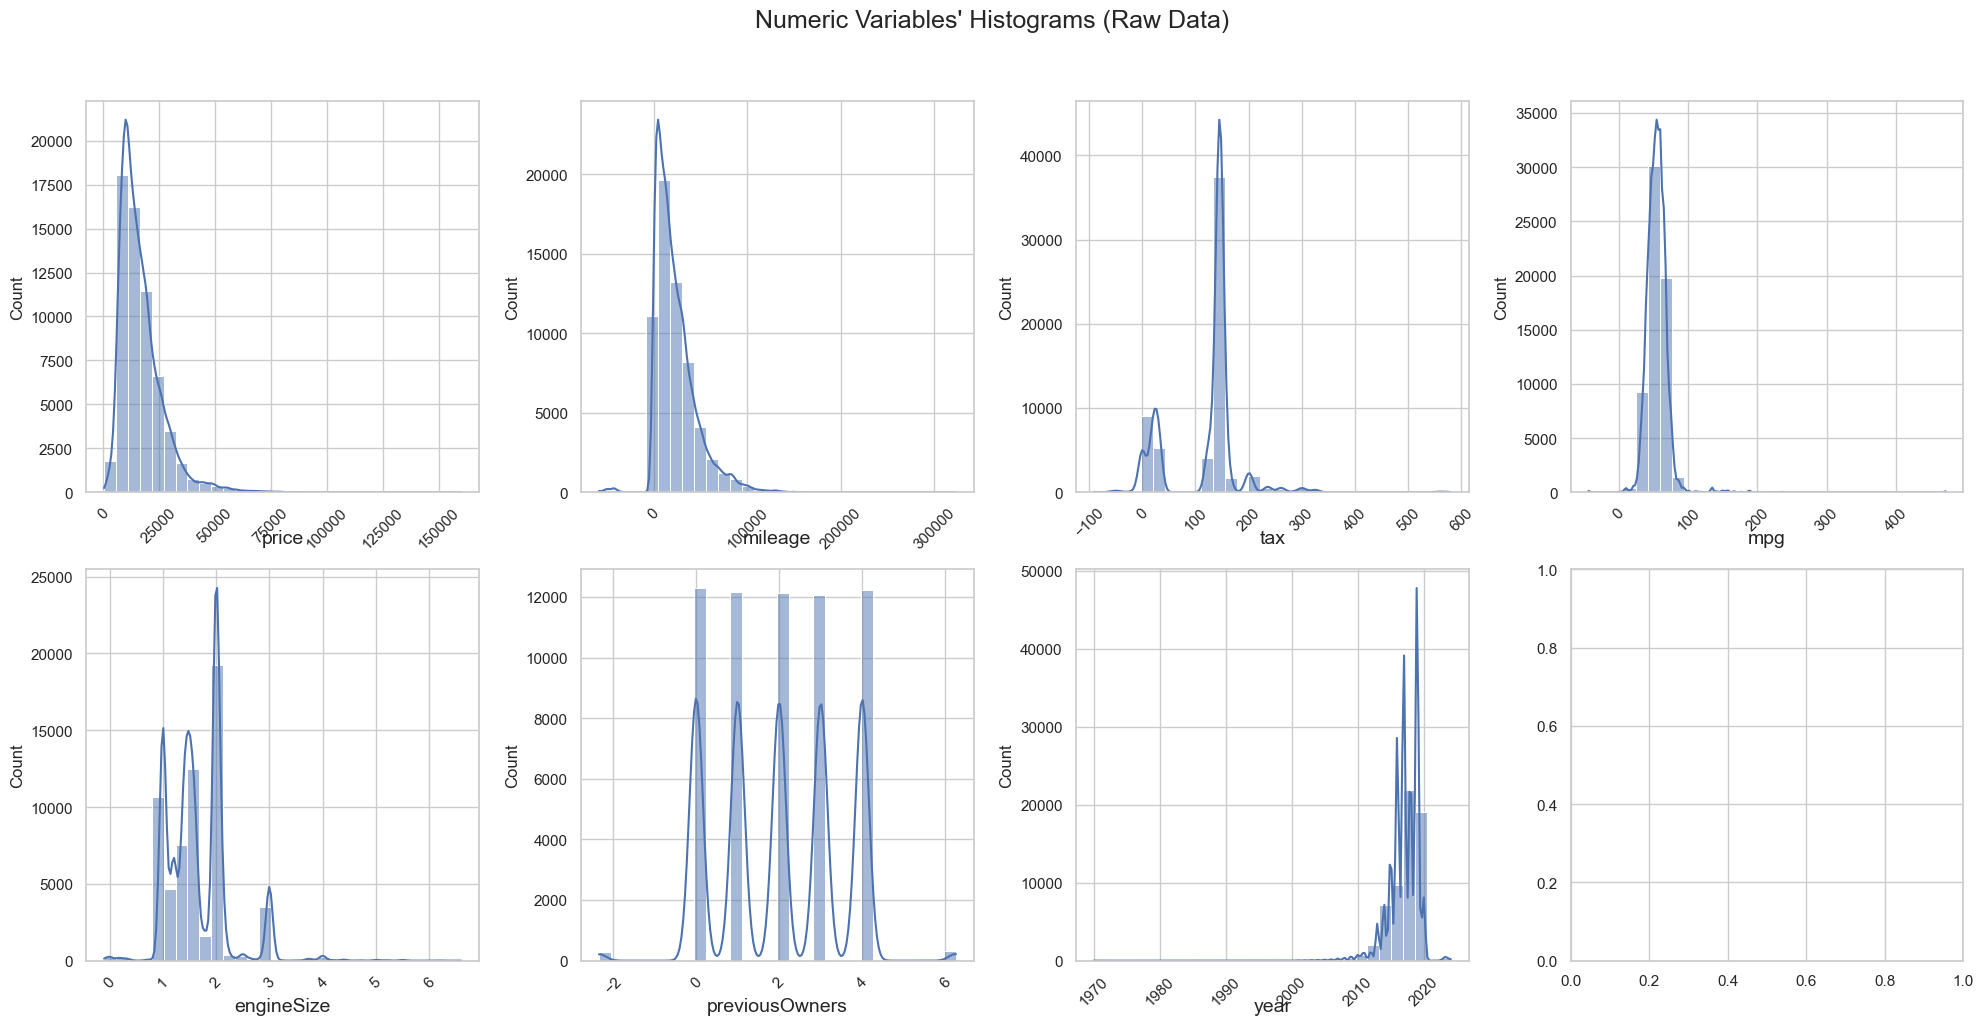

In [17]:
# Set a consistent visualization style for all plots
sns.set(style="whitegrid")

# List of raw numerical features to be analyzed
raw_numeric_features = [
    'price',
    'mileage',
    'tax',
    'mpg',
    'engineSize',
    'previousOwners',
    'year'
]

# Define subplot grid dimensions
sp_rows = 2
sp_cols = 4  # Four columns ensure adequate spacing for readability

# Create the figure and axes for individual histograms
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Remove observations with missing values in selected features
# This ensures that NaNs do not interfere with histogram generation
df_plot = train.dropna(subset=raw_numeric_features)

# Plot histograms with kernel density estimates for each numerical feature
for ax, feat in zip(axes, raw_numeric_features):
    sns.histplot(
        df_plot[feat],
        kde=True,
        ax=ax,
        bins=30
    )
    ax.set_title(feat, y=-0.15, fontsize=14)
    ax.set_xlabel("")  # Remove x-axis label to reduce visual clutter
    ax.tick_params(axis='x', rotation=45)

# Add a global title to the figure
plt.suptitle("Numeric Variables' Histograms (Raw Data)", fontsize=18)

# Adjust layout to prevent overlap between plots and title
plt.tight_layout(rect=[0, 0.05, 1, 0.95])

# Display the figure
plt.show()

- Target Variable (`price`): The price distribution shows significant right positive skewness. Most vehicles are concentrated in the lower price brackets, with a long tail representing luxury or high-performance cars. This justifies the use of a Log-Transformation on the target variable to stabilize variance and minimize the impact of outliers during training.

- `Mileage & Tax`: Similar to price, mileage and tax are heavily right-skewed. A large portion of the fleet has relatively low mileage, which is typical for a resale platform focusing on recent models. Linear models might struggle with these features without proper scaling or transformation, whereas tree-based models (e.g., Random Forest or Extra Trees) are robust to such skews.

- `Year`: The year feature is left-skewed, indicating that the dataset is primarily composed of recent vehicles (mostly post-2015). This suggests that "Car Age" is a more predictive metric than the absolute year, as it captures the depreciation cycle more linearly.

- `EngineSize`: The engineSize plot shows distinct spikes at specific values (e.g., 1.0, 1.2, 1.6, 2.0). This reflects the standard manufacturing categories of engines. 

- `MPG` (Fuel Efficiency): The mpg distribution appears somewhat multimodal, with a primary peak around 50-60 MPG. The outliers on the far right may represent hybrid or highly efficient eco-models.

- `PreviousOwners`: This is a discrete distribution, with the vast majority of cars having only 1 previous owner. This lack of high variance suggests it may have a lower predictive power compared to age or mileage.

Due to the prevalent skewness and the presence of significant outliers in price and mileage, we will prioritize Tree-based Ensemble methods, which do not assume normality in feature distributions. Furthermore, the use of Standardization will be necessary for distance-based algorithms like KNN.

#### Multivariate Analysis - ScatterPlots

This set of scatterplots below visualizes the relationship between key numerical predictors and the target variable in the raw `training dataset`. 

The plots serve multiple purposes:
1. Identify potential linear or non-linear relationships between each feature and price.
2. Detect extreme outliers, unusual patterns or implausible values (e.g., negative mileage or tax).
3. Help to evaluate whether transformations (log, scaling) or feature engineering might be necessary prior to regression modeling.

All plots are generated using a copy of the training data to preserve the integrity of the original dataset.

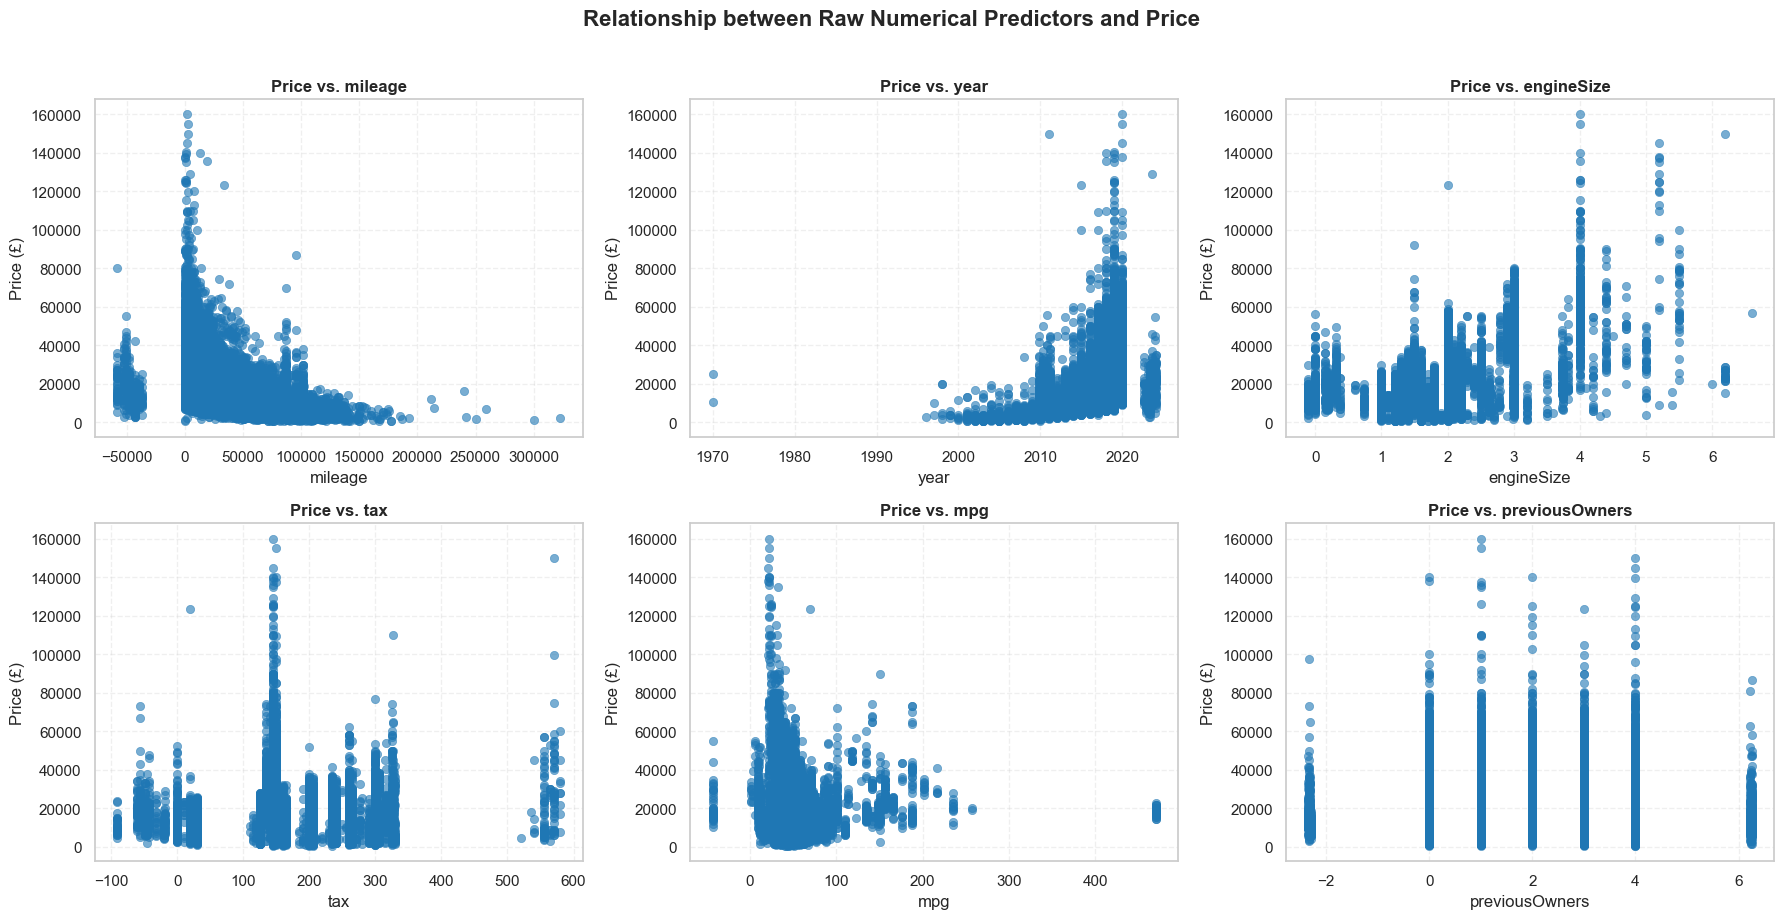

In [18]:
# Scatter Plots
# Create a copy of the training dataset specifically for visualization purposes
# This avoids modifying the original data during plotting
train_viz_raw = train.copy()

# Define the set of numerical features to be visualized against the target variable (price)
features_for_raw_plot = ['mileage', 'year', 'engineSize', 'tax', 'mpg', 'previousOwners']

# Set up the grid layout for scatterplots
# Determine the number of rows and columns based on the number of features
n_cols = 3
n_rows = int(np.ceil(len(features_for_raw_plot) / n_cols))

# Initialize the overall figure size
plt.figure(figsize=(6 * n_cols, 4.5 * n_rows))

# Add a global title for the scatterplot grid
plt.suptitle(
    'Relationship between Raw Numerical Predictors and Price',
    fontsize=16,
    fontweight='bold',
    y=1.02  # Adjust vertical position to avoid overlapping with plots
)

# Loop through each selected feature to generate individual scatterplots
for i, feature in enumerate(features_for_raw_plot, 1):
    # Define subplot position within the grid
    plt.subplot(n_rows, n_cols, i)
    
    # Create scatterplot for the feature vs. price
    sns.scatterplot(
        data=train_viz_raw,  # Use the copied dataset
        x=feature,           # Feature on x-axis
        y='price',           # Target variable on y-axis
        alpha=0.6,           # Slight transparency to reduce overplotting
        color='#1f77b4',     # Consistent color for all points
        edgecolor=None       # Remove edge color for cleaner visualization
    )
    
    # Set individual subplot title and axis labels
    plt.title(f'Price vs. {feature}', fontsize=12, fontweight='semibold')
    plt.xlabel(feature)
    plt.ylabel('Price (£)')
    
    # Add a light grid for better readability
    plt.grid(True, linestyle='--', alpha=0.3)

# Adjust layout to prevent overlapping elements and improve spacing
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Leave space for global title

# Display the scatterplot grid
plt.show()

The *bivariate analysis* of the raw numerical predictors against the target variable, `price`, confirms the expected non-linear relationships and severe data skewness that necessitate data preparation and feature engineering.

- `Price vs. Mileage`: We observe a clear inverse non-linear relationship. As mileage increases, the price drops following an exponential decay pattern. This is a classic indicator of car depreciation, where the most significant value loss occurs during the first few thousand miles. The non-linear nature of this relationship suggests that a simple linear model may underperform unless the feature is transformed (e.g., polynomial) or a non-linear algorithm like a Random Forest is used.
- `Price vs. Year`: There is a strong positive correlation between the manufacturing year and price. However, the variance in price increases significantly for newer cars (2018–2020), known as heteroscedasticity. While "Newer is more expensive," the high variance in recent years indicates that other factors (maybe `brand` and `engine size`) become the dominant price drivers once the car is nearly new.
- `Price vs. EngineSize`: The scatter plot displays "vertical stripes". Higher engine displacements (e.g., 2.0L and above) are associated with higher price ceilings, likely representing the luxury or high-performance segments. Outliers in the small engine segments (high price for small engines) may indicate premium hybrid models or luxury citadins.
- `Price vs. MPG`: The relationship with mpg appears slightly parabolic. Extremely high MPG values (often associated with eco-friendly or hybrid cars) can command higher prices, while very low MPG (associated with high-performance sports cars) also sits in a premium price bracket. This U-shaped or non-monotonic behavior suggests that mpg interacts heavily with engineSize and fuelType.
- `Price vs. PreviousOwners`: The plot shows a weak relationship, as the majority of cars have 0 or 1 previous owners. While a higher number of owners generally correlates with lower prices, the overlap in price ranges is massive.

Most relationships (`Mileage`, `MPG`, `Year`) are not strictly linear. Linear Regression will likely require significant feature engineering (interaction terms or basis expansion) to capture these patterns. These visualizations strongly support the use of **Ensemble Tree-based models**, as they naturally handle non-linear boundaries and heteroscedastic data without requiring complex transformations of the input features.

#### Multivariate Analysis - Correlation Heatmap

The Pearson Correlation Matrix provides a quantified overview of the linear relationships between numerical features and the target variable. This step is crucial for identifying the primary drivers of value and detecting potential **multicollinearity**, a condition that can destabilize certain regression algorithms.

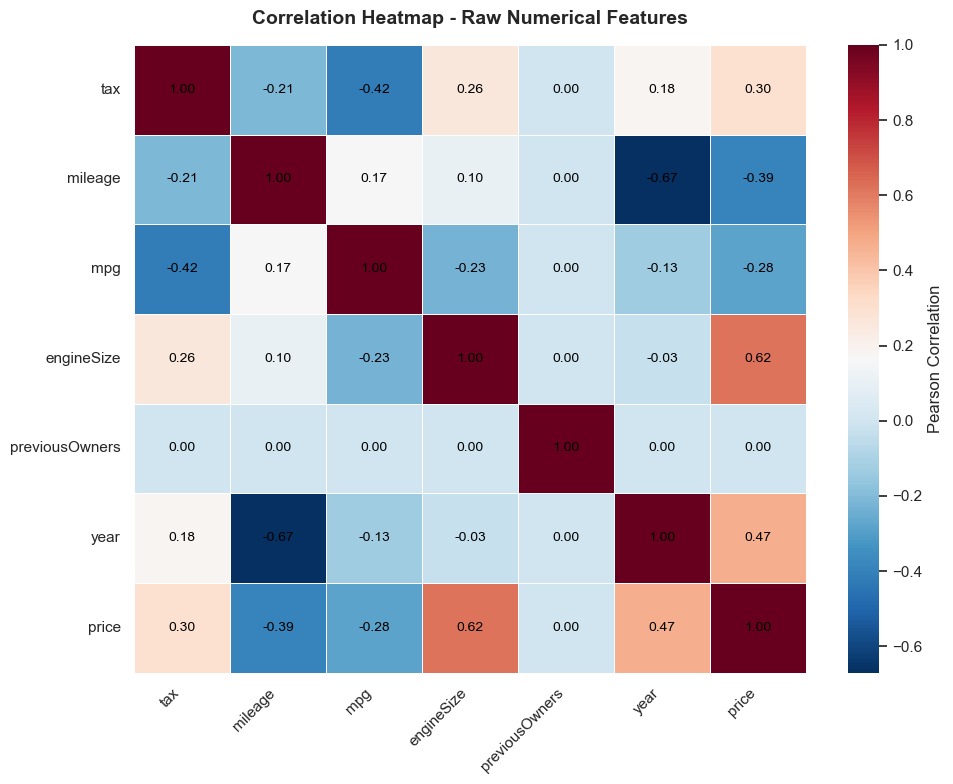


Top correlations with PRICE (raw data):
price             1.00
engineSize        0.62
year              0.47
tax               0.30
previousOwners    0.00
mpg              -0.28
mileage          -0.39
Name: price, dtype: float64


In [19]:
# For visualization purposes, we apply a log-transformation to the target variable (price). 
# This helps reduce the strong right skew typically present in price distributions, making 
# scatterplots and correlations easier to interpret. 
train_viz_raw = train.copy()
train_viz_raw['log_price'] = np.log1p(train_viz_raw['price'])

# MULTIVARIATE ANALYSIS: CORRELATION HEATMAP (raw data)
# Define relevant numeric features (raw)
raw_numeric_features = [
    'tax', 
    'mileage', 
    'mpg', 
    'engineSize',  
    'previousOwners', 
    'year', 
    'price'
]

# Compute correlation matrix (dropping NA for consistency)
corr_matrix_raw = (
    train_viz_raw[raw_numeric_features]
    .dropna()
    .corr(method='pearson')
    .round(2)
)

# Visualization: Enhanced Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix_raw,
    annot=True,
    cmap='RdBu_r',
    fmt=".2f",
    linewidths=0.6,
    cbar_kws={'label': 'Pearson Correlation'},
    annot_kws={"size": 10, "color": "black"}
)

plt.title('Correlation Heatmap - Raw Numerical Features', fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nTop correlations with PRICE (raw data):")
corr_with_price = corr_matrix_raw['price'].sort_values(ascending=False)
print(corr_with_price)

The **correlation heatmap** provides critical multivariate insights to inform the feature engineering strategy. The analysis highlights two crucial findings.
- Firstly, in terms of primary price drivers, `year` and `mileage` exhibit the strongest correlation with `price`, confirming their fundamental role in vehicle valuation.
- Conversely, features like `tax` and `mpg` display weak raw correlation coefficients with price. This weakness is not indicative of low predictive power but rather confirms the non-linear, highly skewed nature of their raw distributions, reinforcing the need for subsequent transformations to establish a clear linear relationship with the target.
- Secondly, and most critically for model stability, a significant negative correlation is clearly visible between the predictors `mileage` and `year`. This high degree of multicollinearity is logical, as a car's usage is inversely related to its age. 

---
**NOTE:**

To draw meaningful and reliable conclusions from a visual exploration, such as analyzing median price distributions via boxplots, these categorical features (`Brand`, `model`) require extensive text normalization and cleaning to consolidate all variants into standardized categories. Since the comprehensive analysis of categorical variables will only be insightful after these cleaning steps are performed in the subsequent preprocessing phase, the group limit the inicial exploratory data analysis and graphical representation to the *quantitative variables*. 

## Data partition - Holdout Method

Before proceeding with preprocessing, the dataset is split using the holdout method. In this approach, the full dataset is randomly divided into training and test sets. The training set will be used to train the regression models, while the test set will serve to validate their performance and generalization ability.

In [20]:
# Define input features (X) and target variable (y)
X = train.drop('price', axis = 1) # Remove our target ('price') for predicting purposes
y = train['price'] # Defining y as our target 

We adopt a **70:30 split** between training and test sets, which provides a sufficiently large sample for model training while retaining a substantial portion for validation. This approach allows us to assess model performance on unseen data before final deployment.

Although *stratify* is typically used in classification problems to preserve the proportion of class labels across training and validation sets, we can adapt this idea to regression by creating `quantile-based bins of the target variable`. 

As we seen previoulsy, `price` is highly skewed and contains extreme values. A simple random split could result in an uneven distribution of high and low-priced cars across the subsets, which may bias the model's evaluation. To address this, we:

- **Create 10 quantile-based price bins** using pd.qcut, dividing the `price` variable into approximately equal-sized groups based on its distribution. Each bin represents a decile of the price range.
- **Use these bins for stratification** in the train_test_split function (stratify=price_bins). This ensures that both the training and validation sets contain a similar proportion of cars from each price decile.

By doing this, we preserve the distributional properties of the target variable in both subsets. This is particularly important for regression problems with skewed targets, as it allows the model to learn and be validated across the full range of prices, improving generalization and reducing evaluation bias.

In [21]:
# Split the dataset into training and validation sets
# Create price bins for stratification
price_bins = pd.qcut(train['price'], q=10, labels=False) 

X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=27, 
    stratify=price_bins  # Ensure stratification based on price bins
)

**Note:** The dataset is split into training and validation sets before preprocessing to ensure that all transformations and feature engineering steps are applied separately to each subset, preventing data leakage and preserving the integrity of model evaluation.

In [22]:
# Checking to see if our data is well divided
X_train

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,previousOwners
carID,,,,,,,,,,
18915,Ford,Focus,2019.0,Manual,3214.0,Petrol,NaN,NaN,1.0,4.0
34171,Hyundai,Ioniq,2019.0,Automatic,7074.0,ybrid,135.0,78.500000,1.6,1.0
22417,Ford,NaN,2018.0,Manual,21831.0,Diesel,145.0,74.300000,1.5,1.0
16151,ord,Focus,2017.0,Manual,17339.0,Petrol,NaN,NaN,1.0,1.0
47590,Skoda,Citigo,2016.0,Automatic,3000.0,Petrol,20.0,64.200000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
37691,Mercedes,A Class,2015.0,Semi-Auto,50244.0,Diesel,20.0,68.900000,1.5,2.0
3083,audi,A4,2017.0,Manua,37424.0,Diesel,20.0,68.900000,2.0,4.0
68517,VW,Scirocco,2017.0,Semi-Auto,29931.0,Petrol,160.0,44.100000,2.0,1.0


In [23]:
# Checking to see if our data is well divided
X_val

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,previousOwners
carID,,,,,,,,,,
65320,NaN,Astra,2016.0,Manual,49878.0,Diesel,20.0,72.4,1.6,3.0
12150,BMW,5 Series,2012.0,Automatic,67000.0,Diesel,160.0,49.6,3.0,3.0
1087,Audi,RS3,2018.0,Semi-Auto,5431.0,Petrol,145.0,34.0,2.5,2.0
12047,BMW,X3,2020.0,Semi-Auto,101.0,Hybrid,135.0,5.5,2.0,4.0
71634,VW,Scirocco,2015.0,anual,22442.0,Diesel,20.0,55.4,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
32378,Hyundai,I10,2018.0,NaN,18000.0,Petrol,145.0,57.7,1.2,2.0
50596,Skoda,Octavia,2016.0,Manual,74244.0,Diesel,0.0,74.3,1.6,1.0
44758,Mercedes,A Class,2016.0,Manual,25623.0,Petrol,200.0,41.5,2.0,4.0


In [24]:
# Inspect the unique categories of all object-type predictors.
# This helps identify potential issues (rare categories, typos, inconsistencies) 
# before encoding the categorical features.

# Select all object-type columns
object_columns = X_train.select_dtypes(include='object').columns

# Loop through each categorical feature and display unique values
for column in object_columns:
    unique_values = X_train[column].value_counts(dropna=False).index
    print(f"Unique values for {column}:\n{unique_values}\n")
    
# Clean up the variable to free memory
del object_columns

Unique values for Brand:
Index([    'Ford', 'Mercedes',       'VW',     'Opel',      'BMW',     'Audi',
         'Toyota',    'Skoda',  'Hyundai',        nan,      'ord',     'FORD',
           'ford',      'For', 'MERCEDES', 'mercedes',  'ercedes',  'Mercede',
             'vw',        'W',        'V',     'OPEL',      'pel',      'Ope',
           'opel',     'AUDI',       'BM',     'audi',      'udi',      'Aud',
             'MW',      'bmw',    'skoda',    'oyota',     'Skod',   'toyota',
         'TOYOTA',    'Toyot',  'HYUNDAI',     'koda',   'yundai',    'SKODA',
        'hyundai',   'Hyunda',        'v',       'or',      'UDI',        'w',
         'ercede',      'for',      'ORD',      'ope',      'PEL',  'mercede',
             'mw',     'KODA',   'hyunda',      'kod',      'aud',      'AUD',
             'pe',    'yunda',      'FOR',    'OYOTA',       'ud',    'toyot',
        'MERCEDE',    'TOYOT',  'ERCEDES',     'SKOD',     'skod',      'OPE'],
      dtype='object', name

As we already know, the **categorical features** in the training set show multiple inconsistencies and irregularities that need to be addressed before encoding. `Brand` and `model` contain numerous variations, typographical errors and inconsistent capitalization, while `transmission` and `fuel type` also exhibit typos and variant spellings. These issues artificially inflate the number of unique categories and could negatively affect model performance. Standardization, including lowercasing, stripping whitespace and mapping known variants will be applied to consolidate categories into consistent and clean labels.

---

### Data pre-processing

The Data Pre-processing is fundamental to our project. The cleaning process involves handling missing values, correcting errors and addressing inconsistencies identified earlier. Pre-processing includes tasks such as feature engineering, encoding categorical variables and normalizing numerical data. These steps are essential to ensure that the dataset is both structured and suitable for developing robust and reliable machine learning models.

In [25]:
# Check for duplicate rows in X_train
X_train.duplicated().sum()

np.int64(210)

In [26]:
ordenated_duplicates = X_train[X_train.duplicated(keep=False)].sort_values(by=list(X_train.columns))
ordenated_duplicates

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,previousOwners
carID,,,,,,,,,,
6770,Audi,A1,2017.0,Manual,25168.0,Petrol,30.0,55.4,1.4,2.0
783,Audi,A1,2017.0,Manual,25168.0,Petrol,30.0,55.4,1.4,2.0
3389,Audi,A1,2020.0,Semi-Auto,5000.0,Petrol,145.0,44.8,1.5,2.0
6048,Audi,A1,2020.0,Semi-Auto,5000.0,Petrol,145.0,44.8,1.5,2.0
3349,Audi,A6,2019.0,Automatic,6000.0,Diesel,145.0,50.4,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...
69679,VW,Up,2020.0,Manual,100.0,Petrol,145.0,54.3,1.0,4.0
65603,VW,Up,2020.0,Manual,1000.0,Petrol,145.0,54.3,1.0,4.0
65670,VW,Up,2020.0,Manual,1000.0,Petrol,145.0,54.3,1.0,4.0


After inspecting `X_train` dataset, we identified several rows that are exact duplicates across all features except for `carID`. In the context of this project, where each row represents a unique car submitted by a customer for evaluation, such duplicates are unlikely to correspond to distinct vehicles and are more plausibly the result of **data entry errors or repeated submissions**. Therefore, we decided to remove these duplicates, retaining only the first occurrence of each unique combination of car attributes. This step helps to prevent bias in the model and ensures that each car is represented only once in the training data.

In [27]:
# Create a boolean mask to identify non-duplicate rows
# - True: first occurrence of a unique combination of feature values (to keep)
# - False: duplicate row (to drop)
# Note: We ignore the 'carID' column, as it uniquely identifies rows but does not reflect actual vehicle attributes (.difference(['carID']))
mask = ~X_train.duplicated(subset=X_train.columns.difference(['carID']), keep='first')

# Inspect how many duplicates will be removed
print(f"Rows before duplicate removal: {len(X_train)}")
print(f"Number of duplicate rows to remove: {(~mask).sum()}")

# Apply the mask to both X_train and y_train simultaneously
# Ensures that the corresponding target values in y_train are removed along with duplicates in X_train
X_train = X_train[mask]
y_train = y_train[mask]

print(f"Rows after duplicate removal (X_train): {len(X_train)}")
print(f"Rows after duplicate removal (y_train): {len(y_train)}")

# Assert that the lengths of X_train and y_train match after removal
assert len(X_train) == len(y_train), "CRITICAL ERROR: X and y have different lengths after duplicate removal!"

Rows before duplicate removal: 53181
Number of duplicate rows to remove: 210
Rows after duplicate removal (X_train): 52971
Rows after duplicate removal (y_train): 52971


A boolean mask is created to identify non-duplicate rows, which is then applied simultaneously to `X_train` and `y_train` to maintain alignment between features and target values. After removal, a safety check confirms that both arrays have identical lengths, preserving data integrity for downstream modeling.

In [28]:
# Check for duplicates in X_val
X_val.duplicated().sum()

np.int64(48)

In [29]:
# Check for duplicates in Test
test.duplicated().sum()

np.int64(88)

- Validation set (`X_val`): 18 duplicate rows were identified.  
- Test set (`test`): 88 duplicate rows were identified.

They are going to be removed too. 

In [30]:
# Remove duplicates in the validation set
# Create a boolean mask to identify non-duplicate rows in X_val
mask_val = ~X_val.duplicated(keep='first')  # Keep first occurrence, drop subsequent duplicates

# Apply the mask to X_val and y_val simultaneously
# Ensures that target values remain aligned with features
X_val = X_val[mask_val]
y_val = y_val[mask_val]

# Report results
print(f"Rows in X_val after duplicate removal: {len(X_val)}")
print(f"Rows in y_val after duplicate removal: {len(y_val)}")

# Remove duplicates in the test set
# Create a boolean mask to identify non-duplicate rows in the test set
mask_test = ~test.duplicated(keep='first')  # Keep first occurrence, drop subsequent duplicates

# Apply the mask to test dataset
# test = test[mask_test]

# Report results
print(f"Rows in test set after duplicate removal: {len(test)}")

Rows in X_val after duplicate removal: 22744
Rows in y_val after duplicate removal: 22744
Rows in test set after duplicate removal: 32567


#### **Missing Values**

In [31]:
# To check to see our missing values, the group decided to check the percentage of Nan 
(X_train.isna().sum() / len(X_train)*100).sort_values(ascending=False) 

mpg               10.294312
tax               10.286761
engineSize         2.057730
previousOwners     2.014310
transmission       1.995431
year               1.993544
Brand              1.984105
model              1.969002
fuelType           1.965226
mileage            1.891601
dtype: float64

In [32]:
(X_val.isna().sum() / len(X_val)*100).sort_values(ascending=False) 

mpg               10.552234
tax               10.473092
previousOwners     2.119240
model              2.079669
Brand              2.066479
fuelType           2.066479
transmission       2.044495
mileage            1.916989
year               1.912592
engineSize         1.873021
dtype: float64

In [33]:
(test.isna().sum() / len(test)*100).sort_values(ascending=False) 

tax               10.157521
mpg               10.096110
mileage            2.115639
fuelType           2.014309
year               2.005097
model              1.995885
Brand              1.992815
engineSize         1.928332
transmission       1.912979
previousOwners     1.833144
dtype: float64

We examined the proportion of missing values across all features in the training, validation and test datasets. The percentages of missing data reveal the following patterns:

- Training set:  
  - `mpg` and `tax` exhibit the highest proportions of missing values, around 10%.  
  - `engineSize`, `previousOwners`, `fuelType`, `Brand`, `year`, `model`, `transmission` and `mileage` show smaller but non-negligible missingness (approximately 1.8% to 2%).  

- Validation set:  
  - `mpg` and `tax` again have the largest missingness, slightly higher than in the training set (~10.8% and ~10.7%).  
  - Other features maintain missing rates around 1.8% to 2.1%.  

- Test set:  
  - `tax` and `mpg` remain the most affected features, with missing percentages just above 10%.  
  - Remaining features have missing rates between 1.8% and 2.1%.  

Understanding these missing value patterns is crucial for preprocessing, as it highlights which features require careful imputation to prevent bias or loss of valuable information. Each feature with missing data will be treated individually according to its characteristics in the subsequent preprocessing steps. 

#### Variable Exploration

Incoherencies can compromise the integrity of the analysis and the performance of machine learning models. By systematically identifying and addressing these issues, we aim to enhance data quality and ensure the dataset is both accurate and reliable for subsequent preprocessing and modeling stages.

__`'Brand' variable`__

In [34]:
# The percentage of NaN in X_train is approximately 1.91%
X_train['Brand'].isna().sum()

np.int64(1051)

In [35]:
# The percentage of NaN in X_val is approximately 2.21%
X_val['Brand'].isna().sum()

np.int64(470)

In [36]:
# The percentage of NaN in test is approximately 1.99%
test['Brand'].isna().sum()

np.int64(649)

The `'Brand'` attribute, as we saw before, contains multiple inconsistent spellings and capitalization issues (e.g., "ford", "For", "FORD", "ord"). To ensure consistency and prevent the model from interpreting these variations, we **mappped** common misspellings and abbreviations to a standardized brand name using a manually defined dictionary (e.g., all variants of “skoda” turn to “Skoda”). This **normalization** ensures that all equivalent brands are treated as a single category during model training.

In [37]:
# Create copies to prevent modifying the original DataFrames
X_train = X_train.copy()
X_val = X_val.copy()
test = test.copy()

In [38]:
# Remove leading/trailing whitespace and convert brand names to lowercase
# This ensures consistency before mapping variants to standardized names
for df in [X_train, X_val, test]:
    df['Brand'] = df['Brand'].astype(str).str.strip().str.lower()

In [39]:
# Replace empty strings or invalid placeholders with np.nan for consistent missing value handling
for df in [X_train, X_val, test]:
    df['Brand'] = df['Brand'].replace(['', 'nan', 'none', 'null'], np.nan)

In [40]:
# Define mapping of known brand variants to standardized brand names
# Each dictionary key is the clean model name, and the list contains possible variations found in the data
brand_normalization = {
    'mercedes': ['mercedes', 'ercedes', 'mercede', 'merce', 'ercede', 'ercedes', 'merced', 'erce'],
    'volkswagen': ['vw', 'v', 'w', 'volkswagen'],
    'audi': ['audi', 'aud', 'udi', 'au', 'audii', 'audd', 'auddi', 'ud'],
    'ford': ['ford', 'for', 'ord', 'forr', 'fordd', 'or', 'fo'],
    'toyota': ['toyota', 'toyot', 'oyota', 'oyot', 'toyotaa'],
    'bmw': ['bmw', 'bm', 'mw', 'bw', 'bmmw', 'bwm','m'],
    'skoda': ['skoda', 'skod', 'koda', 'kod', 'skodaa'],
    'opel': ['opel', 'pel', 'ope', 'o', 'opeel', 'opell', 'pe'],
    'hyundai': ['hyundai', 'hyunda', 'yundai', 'hundai', 'yunda', 'hyund', 'hyundd']
}

# Build reverse lookup: map all variant forms to the clean brand name
reverse_map = {}
for clean_name, variants in brand_normalization.items():
    for v in variants:
        reverse_map[v] = clean_name

# Apply normalization mapping to all DataFrames; keep original value if not mapped
X_train['Brand'] = X_train['Brand'].map(reverse_map).fillna(X_train['Brand'])
X_val['Brand'] = X_val['Brand'].map(reverse_map).fillna(X_val['Brand'])
test['Brand'] = test['Brand'].map(reverse_map).fillna(test['Brand'])

# Capitalize first letter and fill remaining missing values with 'Missing'
for df in [X_train, X_val, test]:
    df['Brand'] = df['Brand'].fillna('Missing').str.capitalize()

The `Brand` column in the training, validation and test sets contains a small number of **missing values**. To ensure consistency and prevent issues during model training, all missing entries were replaced with the placeholder *Missing*. 

After this operation, the total number of records matches the sum of value counts for each dataset, confirming that no missing values remain. The unique brands are now standardized across datasets, including the placeholder for missing entries, which will allow proper encoding in subsequent preprocessing steps.

In [41]:
print(f"Total records: {len(X_train)}")
print(f"Sum of value counts: {X_train['Brand'].value_counts().sum()}") # check if there are any missing values
print(f"Unique values:{X_train['Brand'].unique()}")
print(f"\nUnique value counts:{X_train['Brand'].value_counts()}")

Total records: 52971
Sum of value counts: 52971
Unique values:['Ford' 'Hyundai' 'Skoda' 'Mercedes' 'Audi' 'Bmw' 'Opel' 'Missing'
 'Volkswagen' 'Toyota']

Unique value counts:Brand
Ford          11134
Mercedes       8114
Volkswagen     7191
Opel           6530
Bmw            5206
Audi           5181
Toyota         3220
Skoda          3040
Hyundai        2304
Missing        1051
Name: count, dtype: int64


In [42]:
for df in [X_train, X_val, test]:
    if 'Brand' in df.columns:
        df['Brand'] = df['Brand'].fillna('Missing')

In [43]:
print(f"Total records: {len(X_val)}")
print(f"Sum of value counts: {X_val['Brand'].value_counts().sum()}") # check if there are any missing values
print(f"Unique values:{X_val['Brand'].unique()}")
print(f"\nUnique value counts:{X_val['Brand'].value_counts()}")

Total records: 22744
Sum of value counts: 22744
Unique values:['Missing' 'Bmw' 'Audi' 'Volkswagen' 'Mercedes' 'Ford' 'Skoda' 'Opel'
 'Hyundai' 'Toyota']

Unique value counts:Brand
Ford          4858
Mercedes      3522
Volkswagen    3162
Opel          2746
Bmw           2171
Audi          2133
Toyota        1399
Skoda         1259
Hyundai       1024
Missing        470
Name: count, dtype: int64


In [44]:
print(f"Total records: {len(test)}")
print(f"Sum of value counts: {test['Brand'].value_counts().sum()}") # check if there are any missing values
print(f"Unique values:{test['Brand'].unique()}")
print(f"\nUnique value counts:{test['Brand'].value_counts()}")

Total records: 32567
Sum of value counts: 32567
Unique values:['Hyundai' 'Volkswagen' 'Bmw' 'Opel' 'Ford' 'Mercedes' 'Skoda' 'Toyota'
 'Audi' 'Missing']

Unique value counts:Brand
Ford          6888
Mercedes      5004
Volkswagen    4466
Opel          4008
Bmw           3174
Audi          3130
Toyota        1982
Skoda         1839
Hyundai       1427
Missing        649
Name: count, dtype: int64


The data cleaning process has been completed successfully without any loss of records. The total number of records matches exactly with the sum of all value counts in the `'Brand'` column. All original data has been preserved while successfully categorizing the 72 brand variations into **10**, standardized categories (9 major brands + 'Missing' category). The transformation maintains complete data integrity while significantly improving data quality for machine learning.

__`'model' variable`__

The `'model'` attribute also contains inconsistent spellings and variations. We normalized these to a standard name to ensure all equivalent models are treated as a single category. For rows where `'Brand'` is missing, we attempted to infer the brand based on the model using existing mappings in the dataset.

In [45]:
# Number of unique models per car brand 
model_per_brand = X_train.groupby('Brand')['model'].nunique().sort_values(ascending=False)
print(model_per_brand)

Brand
Missing       167
Volkswagen    107
Mercedes       93
Ford           87
Bmw            84
Opel           79
Toyota         58
Audi           57
Skoda          56
Hyundai        50
Name: model, dtype: int64


In [46]:
model_per_brand1 = X_val.groupby('Brand')['model'].nunique().sort_values(ascending=False)
print(model_per_brand1)

Brand
Missing       129
Volkswagen     79
Opel           75
Mercedes       73
Ford           71
Bmw            67
Toyota         51
Audi           49
Skoda          47
Hyundai        33
Name: model, dtype: int64


In [47]:
model_per_brand2 = test.groupby('Brand')['model'].nunique().sort_values(ascending=False)
print(model_per_brand2)

Brand
Missing       130
Volkswagen     90
Mercedes       81
Ford           76
Opel           74
Bmw            64
Toyota         57
Skoda          53
Audi           52
Hyundai        41
Name: model, dtype: int64


In [48]:
# Remove leading/trailing whitespace and convert brand names to lowercase
# This ensures consistency before mapping variants to standardized names
X_train['model'] = X_train['model'].astype(str).str.strip().str.lower()
X_val['model'] = X_val['model'].astype(str).str.strip().str.lower()
test['model'] = test['model'].astype(str).str.strip().str.lower()

In [49]:
# Checking to see the models per car brand 
models_for_brand = X_train[X_train['Brand'] == 'Volkswagen']['model'].unique()
print(f"Volkswagen unique models:{models_for_brand}")

Volkswagen unique models:['golf' 'polo' 'passat' 'tiguan' 'up' 'scirocco' 'sharan' 'touran'
 't-cross' 'amarok' 't-roc' 'golf sv' 'touareg' 'caravelle' 'arteon'
 'shuttle' 'california' 'tigua' 'pol' 'nan' 'cc' 'beetle'
 'caddy maxi life' 'gol' 't-cros' 't-ro' 'tiguan allspace' 'eos' 'jetta'
 'scirocc' 'u' 'golf s' 'beetl' 'arteo' 'caddy' 'touare' 'caddy life'
 'passa' 'toura' 'tiguan allspac' 'caddy maxi' 'amaro' 'caravell' 'fox'
 'shara']


In [50]:
models_for_brand = X_train[X_train['Brand'] == 'Mercedes']['model'].unique()
print(f"Mercedes unique models:{models_for_brand}")

Mercedes unique models:['c class' 'e class' 'nan' 'gla class' 'glc class' 'gle class' 'a class'
 'b class' 'sl class' 'b clas' 'c clas' 'gl class' 'cl class' 'v class'
 'cls class' 'slk' 'gls class' 'x-class' 's class' 'm class' 'cla class'
 'a clas' 'e clas' 'gla clas' 'glc clas' 'clk' 's clas' '230' 'cls clas'
 'gle clas' 'cl clas' 'glb class' '220' 'g class' 'sl clas' 'm clas'
 'x-clas' 'v clas' 'gls clas' 'sl']


In [51]:
models_for_brand = X_train[X_train['Brand'] == 'Bmw']['model'].unique()
print(f"Bmw unique models:{models_for_brand}")

Bmw unique models:['4 series' 'x5' '1 series' '5 series' '3 series' 'x1' 'nan' 'x7'
 '2 series' 'i3' '7 series' 'm4' 'x3' 'x6' 'x2' 'x4' 'x' '3 serie'
 '6 series' 'z4' '2 serie' '1 serie' 'm3' '6 serie' '8 series' 'z3' 'm'
 'i8' '5 serie' 'm6' 'm2' '4 serie' 'm5' '8 serie' '7 serie' 'z']


In [52]:
models_for_brand = X_train[X_train['Brand'] == 'Ford']['model'].unique()
print(f"Ford unique models:{models_for_brand}")

Ford unique models:['focus' 'nan' 'kuga' 'c-max' 'ecosport' 'fiesta' 'galaxy' 'ka' 'edge'
 'ka+' 'tourneo custom' 's-max' 'mondeo' 'b-max' 'fiest' 'focu'
 'grand c-max' 'ecospor' 'grand tourneo connect' 'mustang' 'kug' 'monde'
 'tourneo connect' 'puma' 'galax' 'grand c-ma' 'b-ma' 'c-ma' 'k' 'edg'
 'fusion' 's-ma' 'streetka' 'tourneo custo']


In [53]:
models_for_brand = X_train[X_train['Brand'] == 'Opel']['model'].unique()
print(f"Opel unique models:{models_for_brand}")

Opel unique models:['meriva' 'nan' 'crossland x' 'corsa' 'mokka x' 'astra' 'insignia' 'adam'
 'mokka' 'viv' 'zafira' 'combo life' 'zafir' 'crossland' 'antara' 'cors'
 'grandland x' 'viva' 'cascada' 'gtc' 'vivaro' 'ampera' 'agila' 'insigni'
 'zafira tourer' 'zafira toure' 'astr' 'tigra' 'mokk' 'grandland' 'vectra'
 'kadjar' 'ada' 'meriv']


In [54]:
models_for_brand = X_train[X_train['Brand'] == 'Toyota']['model'].unique()
print(f"Toyota unique models:{models_for_brand}")

Toyota unique models:['yaris' 'rav4' 'aygo' 'gt86' 'corolla' 'c-hr' 'land cruiser' 'auris'
 'prius' 'nan' 'hilux' 'auri' 'ayg' 'yari' 'avensis' 'urban cruise'
 'verso' 'rav' 'c-h' 'urban cruiser' 'camry' 'proace verso' 'supra'
 'verso-s' 'iq' 'coroll' 'hilu']


In [55]:
models_for_brand = X_train[X_train['Brand'] == 'Audi']['model'].unique()
print(f"Audi unique models:{models_for_brand}")

Audi unique models:['q3' 'a3' 'q5' 'a4' 'a6' 'a1' 'q7' 'rs3' 'q8' 'a5' 'nan' 'rs4' 's3' 'q2'
 'r8' 's4' 'a' 'a7' 'a8' 'tt' 'rs6' 'q' 'sq5' 's8' 'rs5' 't' 's5' 'rs'
 'sq7']


In [56]:
models_for_brand = X_train[X_train['Brand'] == 'Skoda']['model'].unique()
print(f"Skoda unique models:{models_for_brand}")

Skoda unique models:['citigo' 'fabia' 'octavia' 'kodiaq' 'superb' 'karoq' 'scala' 'kamiq'
 'yeti' 'nan' 'yeti outdoor' 'fabi' 'octavi' 'rapid' 'super' 'citig'
 'roomster' 'kodia' 'yeti outdoo' 'karo' 'rapi' 'scal' 'yet']


In [57]:
models_for_brand = X_train[X_train['Brand'] == 'Hyundai']['model'].unique()
print(f"Hyundai unique models:{models_for_brand}")

Hyundai unique models:['ioniq' 'tucson' 'i10' 'i800' 'kona' 'santa fe' 'nan' 'i30' 'ix20' 'i20'
 'i40' 'kon' 'ix35' 'i3' 'i1' 'santa f' 'tucso' 'accent' 'getz' 'i80'
 'ioni' 'ix2' 'i2']


Some car models were recorded as the string `'nan'`. These entries have been replaced with proper missing values and subsequently filled with the placeholder `'Missing'`. This approach ensures that all missing or invalid entries are consistently represented across the dataset.

In [58]:
# Missing values at 'model' attribute
# There are no missing values
missing_models = X_train[X_train['model'].isna()]
print(len(missing_models))

0


In [59]:
# Replace string 'nan' with np.nan
X_train['model'] = X_train['model'].replace('nan', np.nan)
X_val['model'] = X_val['model'].replace('nan', np.nan)
test['model'] = test['model'].replace('nan', np.nan)

# Optionally fill missing models with 'Missing', like it was done at the 'Brand' attribute
X_train['model'] = X_train['model'].fillna('Missing')
X_val['model'] = X_val['model'].fillna('Missing')
test['model'] = test['model'].fillna('Missing')

In [60]:
# Normalize model names by car brand - same logic for 'Brand' normalization
# Only abbreviations and badly written variants were corrected
model_normalization = {
    # Volkswagen 
    'volkswagen': {
        'golf': ['golf', 'gol', 'golf s', 'golf sv'],
        'polo': ['polo', 'pol'],
        'passat': ['passat', 'passa'],
        'tiguan': ['tiguan', 'tigua', 'tiguan allspace', 'tiguan allspac'],
        't-roc': ['t-roc', 't-ro', 'troc'],
        't-cross': ['t-cross', 't-cros', 't-cro'],
        'sharan': ['sharan', 'shara'],
        'touareg': ['touareg', 'touare', 'touar'],
        'amarok': ['amarok', 'amaro'],
        'arteon': ['arteon', 'arteo'],
        'scirocco': ['scirocco', 'scirocc'],
        'up': ['up', 'u'],
        'caddy': ['caddy', 'caddy maxi', 'caddy maxi life', 'caddy life'],
        'caravelle': ['caravelle', 'caravell'],
        'touran': ['touran', 'toura'],
        'beetle': ['beetle', 'beetl'],
    },
    # Mercedes
    'mercedes': {
        'a class': ['a class', 'a clas'],
        'b class': ['b class', 'b clas'],
        'c class': ['c class', 'c clas'],
        'e class': ['e class', 'e clas'],
        's class': ['s class', 's clas'],
        'sl class': ['sl class', 'sl clas', 'sl'],
        'glc class': ['glc class', 'glc clas'],
        'gle class': ['gle class', 'gle clas'],
        'gls class': ['gls class', 'gls clas'],
        'gla class': ['gla class', 'gla clas'],
        'v class': ['v class', 'v clas'],
        'x class': ['x-class', 'x-clas'],
        'cls class': ['cls class', 'cls clas'],
        'cl class': ['cl class', 'cl clas'],
    },
    # BMW 
    'bmw': {
        '1 series': ['1 series', '1 serie'],
        '2 series': ['2 series', '2 serie'],
        '3 series': ['3 series', '3 serie'],
        '4 series': ['4 series', '4 serie'],
        '5 series': ['5 series', '5 serie'],
        '6 series': ['6 series', '6 serie'],
        '7 series': ['7 series', '7 serie'],
        '8 series': ['8 series', '8 serie'],
        'z3': ['z3', 'z'],
        'i8': ['i8', 'i'],
    },
    # Ford 
    'ford': {
        'focus': ['focus', 'focu'],
        'fiesta': ['fiesta', 'fiest'],
        'mondeo': ['mondeo', 'monde'],
        'ka': ['ka', 'k', 'ka+'],
        'ecosport': ['ecosport', 'ecospor'],
        'kuga': ['kuga', 'kug'],
        'b-max': ['b-max', 'b-ma'],
        'c-max': ['c-max', 'c-ma', 'grand c-max', 'grand c-ma'],
        's-max': ['s-max', 's-ma'],
        'tourneo connect': ['tourneo connect', 'grand tourneo connect', 'grand tourneo connec'],
        'tourneo custom': ['tourneo custom', 'tourneo custo'],
        'galaxy': ['galaxy', 'galax'],
        'edge': ['edge', 'edg'],
    },
    # Opel 
    'opel': {
        'corsa': ['corsa', 'cors'],
        'astra': ['astra', 'astr'],
        'insignia': ['insignia', 'insigni'],
        'mokka': ['mokka', 'mokk', 'mokka x'],
        'crossland': ['crossland', 'crossland x'],
        'grandland': ['grandland', 'grandland x'],
        'zafira': ['zafira', 'zafir', 'zafira tourer', 'zafira toure'],
        'meriva': ['meriva', 'meriv'],
        'combo life': ['combo life', 'combo lif'],
        'vivaro': ['vivaro', 'viv', 'viva'],
        'adam': ['adam', 'ada'],
    },
    # Toyota 
    'toyota': {
        'aygo': ['aygo', 'ayg'],
        'yaris': ['yaris', 'yari'],
        'auris': ['auris', 'auri'],
        'corolla': ['corolla', 'coroll'],
        'rav4': ['rav4', 'rav'],
        'c-hr': ['c-hr', 'c-h'],
        'land cruiser': ['land cruiser', 'land cruise', 'urban cruiser', 'urban cruise'],
        'verso': ['verso', 'verso-s'],
    },
    # Audi 
    'audi': {
        'tt': ['tt', 't'],
        'a': ['a'],  # unclear, might need cleaning manually later
    },
    # Skoda
    'skoda': {
        'fabia': ['fabia', 'fabi'],
        'octavia': ['octavia', 'octavi'],
        'scala': ['scala', 'scal'],
        'karoq': ['karoq', 'karo'],
        'superb': ['superb', 'super'],
        'rapid': ['rapid', 'rapi'],
        'yeti': ['yeti', 'yet', 'yeti outdoor', 'yeti outdoo'],
        'citigo': ['citigo', 'citig'],
        'kodiaq': ['kodiaq', 'kodia'],
        'roomster': ['roomster', 'roomste'],
    },
    # Hyundai 
    'hyundai': {
        'i10': ['i10', 'i1'],
        'i20': ['i20', 'i2'],
        'i30': ['i30', 'i3'],
        'i800': ['i800', 'i80'],
        'ix20': ['ix20', 'ix2'],
        'kona': ['kona', 'kon'],
        'ioniq': ['ioniq', 'ioni'],
        'tucson': ['tucson', 'tucso'],
        'santa fe': ['santa fe', 'santa f'],
    }
}

# Build reverse lookup dictionary to map any variant to the canonical model name
reverse_model_map = {
    variant: model
    for brand_models in model_normalization.values()
    for model, variants in brand_models.items()
    for variant in variants
}

# Apply normalization for each brand to all datasets
# Ensures model names are standardized and consistent
for brand in model_normalization.keys():
    mask = X_train['Brand'].str.lower() == brand
    X_train.loc[mask, 'model'] = X_train.loc[mask, 'model'].map(reverse_model_map).fillna(X_train.loc[mask, 'model'])

    mask_val = X_val['Brand'].str.lower() == brand
    X_val.loc[mask_val, 'model'] = X_val.loc[mask_val, 'model'].map(reverse_model_map).fillna(X_val.loc[mask_val, 'model'])

    mask_test = test['Brand'].str.lower() == brand
    test.loc[mask_test, 'model'] = test.loc[mask_test, 'model'].map(reverse_model_map).fillna(test.loc[mask_test, 'model'])

We examined the rows in the training, validation and test sets where the `Brand` feature was marked as `'Missing'`. Inspection of these rows shows that the `model` information is often available even when the brand is missing. This suggests that it is possible to infer the missing brand values based on the corresponding model, which will be addressed in the next preprocessing step.

In [61]:
# Rows where 'Brand' is 'Missing' in X_train
missing_brand_rows = X_train[X_train['Brand'] == 'Missing']
print(missing_brand_rows.shape[0])
missing_brand_rows.head()

1051


,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,previousOwners
carID,,,,,,,,,,
9669,Missing,1 series,2018.0,utomatic,101153.348285,Petrol,145.0,32.5,3.0,3.0
20664,Missing,ecosport,2018.0,Manual,10426.000000,Petrol,150.0,54.3,1.0,2.0
40879,Missing,c class,2019.0,Semi-Auto,16.000000,Diesel,NaN,NaN,2.0,0.0
6926,Missing,q5,2019.0,Semi-Auto,5000.000000,Diesel,145.0,38.2,2.0,2.0
68899,Missing,touran,2017.0,SEMI-AUTO,12256.000000,Petrol,150.0,51.4,1.4,4.0


In [62]:
# Rows where 'Brand' is 'Missing' in X_val
missing_brand_rows = X_val[X_val['Brand'] == 'Missing']
print(missing_brand_rows.shape[0])
missing_brand_rows.head()

470


,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,previousOwners
carID,,,,,,,,,,
65320,Missing,astra,2016.0,Manual,49878.0,Diesel,20.0,72.4,1.6,3.0
24174,Missing,focus,2017.0,Manual,21631.0,Petrol,NaN,NaN,1.0,3.0
40619,Missing,c class,2016.0,Semi-Auto,32924.0,Diesel,NaN,NaN,2.1,4.0
12245,Missing,3 series,2017.0,Semi-Auto,61610.0,Petrol,150.0,48.7,2.0,2.0
40303,Missing,e class,2017.0,Semi-Auto,59397.0,Diesel,20.0,72.4,2.0,0.0


In [63]:
# Rows where 'Brand' is 'Missing' in test
missing_brand_rows = test[test['Brand'] == 'Missing']
print(missing_brand_rows.shape[0])
missing_brand_rows.head()

649


,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,previousOwners
carID,,,,,,,,,,
101591,Missing,mokka x,2017.0,Manual,3273.000000,Petrol,200.0,42.2,1.6,0.0
91953,Missing,a class,2014.0,Manual,37642.000000,Diesel,0.0,78.5,1.5,4.0
90119,Missing,tucson,2016.0,Manual,74520.808024,Diesel,30.0,61.7,1.7,1.0
89711,Missing,i20,2017.0,Manual,23000.000000,Petrol,145.0,58.9,1.2,3.0
78656,Missing,q3,2019.0,automatic,5644.000000,Diesel,145.0,48.7,2.0,1.0


To handle cases where the `Brand` is marked as `'Missing'` while the `model` information is available, we implemented a strategy that uses the car model as a reference to infer and fill the corresponding brand values.

In [64]:
# Create mapping from model -> most common Brand (based on training set)
# This will help fill remaining missing Brand values
model_to_brand_map = (
    X_train[X_train['Brand'] != 'Missing']
    .groupby('model')['Brand']
    .agg(lambda x: x.value_counts().idxmax())  # get most frequent 'Brand' for each model
    .to_dict()
)

# Fill missing Brand values based on model mapping
missing_mask_train = X_train['Brand'] == 'Missing'
X_train.loc[missing_mask_train, 'Brand'] = X_train.loc[missing_mask_train, 'model'].map(model_to_brand_map)

missing_mask_val = X_val['Brand'] == 'Missing'
X_val.loc[missing_mask_val, 'Brand'] = X_val.loc[missing_mask_val, 'model'].map(model_to_brand_map)

missing_mask_test = test['Brand'] == 'Missing'
test.loc[missing_mask_test, 'Brand'] = test.loc[missing_mask_test, 'model'].map(model_to_brand_map)

In [65]:
# Final check for any remaining missing Brands
print("Number of remaining missing Brands in X_train:", (X_train['Brand'] == 'Missing').sum())
print("Number of remaining missing Brands in X_val:", (X_val['Brand'] == 'Missing').sum())
print("Number of remaining missing Brands in test:", (test['Brand'] == 'Missing').sum())

# Show sample of corrected rows
if missing_mask_train.any():
    print("\nSample of corrected training rows:")
    print(X_train.loc[missing_mask_train].head(10))

Number of remaining missing Brands in X_train: 0
Number of remaining missing Brands in X_val: 0
Number of remaining missing Brands in test: 0

Sample of corrected training rows:
            Brand     model    year transmission        mileage fuelType  \
carID                                                                      
9669          Bmw  1 series  2018.0     utomatic  101153.348285   Petrol   
20664        Ford  ecosport  2018.0       Manual   10426.000000   Petrol   
40879    Mercedes   c class  2019.0    Semi-Auto      16.000000   Diesel   
6926         Audi        q5  2019.0    Semi-Auto    5000.000000   Diesel   
68899  Volkswagen    touran  2017.0    SEMI-AUTO   12256.000000   Petrol   
61649        Opel  insignia  2012.0    Automatic   83300.000000   Diesel   
58947         NaN   mokka x  2017.0    Semi-Auto    8418.000000   Petrol   
45668        Ford   Missing  2017.0       Manual   19300.000000   Diesel   
32116     Hyundai      ix35  2014.0       Manual   36189.00000

Handling missing `model` values is more challenging than `Brand`. Unlike `Brand`, we cannot reliably infer the car model from other features, since multiple models may share similar characteristics. Therefore, it was chosen to be left as **Missing**.

In [66]:
# Inspect rows where model is still 'Missing' (if any)
# Rows where Model is 'Missing' in X_train
missing_model_rows = X_train[X_train['model'] == 'Missing']
print(missing_model_rows.shape[0])
print(missing_model_rows.head()) 

1043
          Brand    model    year transmission  mileage fuelType    tax   mpg  \
carID                                                                          
22417      Ford  Missing  2018.0       Manual  21831.0   Diesel  145.0  74.3   
63831      Opel  Missing  2019.0       Manual   9085.0   Petrol  145.0  43.5   
44139  Mercedes  Missing  2017.0       Manual  12500.0   Petrol  150.0  51.4   
57363      Opel  Missing  2019.0       Manual      4.0   Petrol  145.0  44.8   
44303  Mercedes  Missing  2009.0    Automatic  79980.0   Diesel  325.0  34.0   

       engineSize  previousOwners  
carID                              
22417         1.5             1.0  
63831         1.4             3.0  
44139         1.6             4.0  
57363         1.2             1.0  
44303         3.0             3.0  


In [67]:
# Rows where Model is 'Missing' in X_val
missing_model_rows = X_val[X_val['model'] == 'Missing']
print(missing_model_rows.shape[0])
print(missing_model_rows.head()) 

473
            Brand    model    year transmission  mileage fuelType    tax  \
carID                                                                      
38235    Mercedes  Missing  2016.0    Automatic  17268.0   Diesel  125.0   
75175  Volkswagen  Missing  2017.0    Semi-Auto  25482.0   Diesel  145.0   
56499        Opel  Missing  2017.0       Manual  36659.0   Diesel   20.0   
39412    Mercedes  Missing  2010.0       Manual  68000.0   diesel    NaN   
1131         Audi  Missing  2013.0       Manual  65589.0    iesel  205.0   

        mpg  engineSize  previousOwners  
carID                                    
38235  60.1         2.1             0.0  
75175  49.6         2.0             0.0  
56499  72.4         1.6             4.0  
39412   NaN         2.1             3.0  
1131   47.9         2.0             1.0  


In [68]:
# Rows where Model is 'Missing' in test
missing_model_rows = test[test['model'] == 'Missing']
print(missing_model_rows.shape[0])
print(missing_model_rows.head()) 

650
         Brand    model    year transmission  mileage fuelType    tax   mpg  \
carID                                                                         
84196     Ford  Missing  2008.0       Manual  56000.0   Petrol  145.0  49.6   
89973  Hyundai  Missing  2015.0       Manual  42910.0   Petrol   20.0   NaN   
77561     Audi  Missing  2016.0    Semi-Auto  63938.0   Diesel  160.0  50.4   
97739    Skoda  Missing  2016.0       Manual  22996.0   Diesel   30.0  64.2   
77228     Audi  Missing  2015.0       Manual  39056.0   Diesel  200.0  47.9   

       engineSize  previousOwners  
carID                              
84196         1.4             3.0  
89973         1.0             1.0  
77561         2.0             0.0  
97739         2.0             3.0  
77228         2.0             1.0  


#### **Ordinal Encoding for High-Cardinality Features**

The `Brand` and `model` features have high cardinality, containing numerous unique categories. Using One-Hot Encoding would create hundreds of sparse variables, increasing dimensionality, computational cost and the risk of overfitting.

To handle this efficiently, we applied **Ordinal Encoding**, which maps each category to a unique integer. While this imposes an artificial order, it provides a compact numeric representation suitable for regression models that can handle non-linear relationships. 

Unseen categories in the validation and test sets are encoded as `-1` to ensure the pipeline remains robust.

In [69]:
# Check for any remaining NaNs before encoding
print(X_train['Brand'].isna().sum())
print(X_val['Brand'].isna().sum())
print(test['Brand'].isna().sum())

# Fill any remaining NaNs with 'Missing' and capitalize for consistency
X_train['Brand']= X_train['Brand'].fillna('Missing').str.capitalize()
X_val['Brand']= X_val['Brand'].fillna('Missing').str.capitalize()
test['Brand'] = test['Brand'].fillna('Missing').str.capitalize()

# Verify no NaNs remain after filling
print(X_train['Brand'].isna().sum())
print(X_val['Brand'].isna().sum())
print(test['Brand'].isna().sum())

68
27
42
0
0
0


In [70]:
# Quick check of brand distribution
X_train['Brand'].value_counts()

Brand
Ford          11368
Mercedes       8264
Volkswagen     7340
Opel           6621
Bmw            5310
Audi           5275
Toyota         3285
Skoda          3089
Hyundai        2351
Missing          68
Name: count, dtype: int64

In [71]:
def ordinal_encode_features(train_df, val_df, test_df, columns):
    """
    Applies Ordinal Encoding to high-cardinality categorical features across training, validation, and test sets.

    Ordinal Encoding maps each unique category to an integer. Unseen categories in validation or test sets
    are encoded as -1 to ensure robustness of the pipeline. This approach is chosen over One-Hot Encoding 
    to avoid high dimensionality and potential overfitting.

    Parameters
    ----------
    train_df : pd.DataFrame
        Training dataset containing the features to encode.
    val_df : pd.DataFrame
        Validation dataset to transform using the fitted encoder.
    test_df : pd.DataFrame
        Test dataset to transform using the fitted encoder.
    columns : list of str
        List of categorical columns to encode (e.g., ['Brand', 'model']).

    Returns
    -------
    train_df, val_df, test_df : pd.DataFrame
        Updated dataframes with new ordinal encoded columns added for each specified feature.
    """
    # Initialize OrdinalEncoder
    # handle_unknown='use_encoded_value' encodes unseen categories as -1 instead of raising an error
    ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

    # Fit encoder only on training data
    ord_encoder.fit(train_df[columns])

    # Transform training, validation, and test sets
    for df in [train_df, val_df, test_df]:
        df[[f"{col}_encoded" for col in columns]] = ord_encoder.transform(df[columns])
    
    return train_df, val_df, test_df

# Apply ordinal encoding to 'Brand' and 'model'
X_train, X_val, test = ordinal_encode_features(X_train, X_val, test, ['Brand', 'model'])

__`'transmission' variable`__

Again, normalize `'transmission'` values. Corrected inconsistent spellings and capitalization (e.g., 'manual', 'Manua', 'MANUAL'). Also, mapped unknown or missing values (nan, 'unknown', 'nknown', etc.) to 'Missing'. 

In [72]:
# Replace unknown/missing variants with np.nan for consistent missing value handling
unknown_variants = ['nan', 'unknown', 'nknown', 'UNKNOWN', 'unknow', 'nknow']
for df in [X_train, X_val, test]:
    df['transmission'] = df['transmission'].replace(unknown_variants, np.nan)

In [73]:
# Strip whitespace and convert to lowercase to standardize values
for df in [X_train, X_val, test]:
    df['transmission'] = df['transmission'].astype(str).str.strip().str.lower()

# Define mapping of known transmission variants to standardized categories
transmission_mapping = {
    'manual': ['manual', 'manua', 'anual', 'anua', 'manua', 'manual '],
    'automatic': ['automatic', 'automati', 'automati', 'utomatic', 'utomati', 'utomatic', 'automatic'],
    'semi-auto': ['semi-auto', 'semi-aut', 'emi-auto', 'emi-aut', 'emi-auto', 'semi-aut'],
    'other': ['other']
}

# Build reverse lookup dictionary to map any variant to the clean category
reverse_map = {}
for clean_name, variants in transmission_mapping.items():
    for v in variants:
        reverse_map[v] = clean_name

# Apply mapping and fill remaining missing values with 'Missing'
X_train['transmission'] = X_train['transmission'].map(reverse_map).fillna('Missing').str.capitalize()
X_val['transmission'] = X_val['transmission'].map(reverse_map).fillna('Missing').str.capitalize()
test['transmission'] = test['transmission'].map(reverse_map).fillna('Missing').str.capitalize()

In [74]:
# Ensure consistency for 'Other' category
transmission_mapping = {'Other': 'Missing', 'Missing': 'Missing'}

for df in [X_train, X_val, test]:
    df['transmission'] = df['transmission'].replace(transmission_mapping)

In [75]:
# Verify the unique values and counts after cleaning
for name, df in zip(['X_train', 'X_val', 'test'], [X_train, X_val, test]):
    print(f"Unique values in {name} 'transmission':", df['transmission'].unique())
    print(df['transmission'].value_counts())

Unique values in X_train 'transmission': ['Manual' 'Automatic' 'Semi-auto' 'Missing']
transmission
Manual       29004
Semi-auto    11791
Automatic    10611
Missing       1565
Name: count, dtype: int64
Unique values in X_val 'transmission': ['Manual' 'Automatic' 'Semi-auto' 'Missing']
transmission
Manual       12440
Semi-auto     5049
Automatic     4557
Missing        698
Name: count, dtype: int64
Unique values in test 'transmission': ['Automatic' 'Semi-auto' 'Manual' 'Missing']
transmission
Manual       17889
Semi-auto     7267
Automatic     6440
Missing        971
Name: count, dtype: int64


__`'fuelType' variable`__

Again, normalize `'fuelType'` values. Corrected inconsistent spellings and capitalization. Also, mapped unknown or missing values to 'Missing'. 

In [76]:
# Replace missing variants with np.nan for consistency
for df in [X_train, X_val, test]:
    df['fuelType'] = df['fuelType'].replace(['nan'], np.nan)

In [77]:
# Remove whitespace and convert to lowercase to standardize values
for df in [X_train, X_val, test]:
    df['fuelType'] = df['fuelType'].astype(str).str.strip().str.lower()

# Define mapping of known fuel type variants to standardized categories
fuel_mapping = {
    'petrol': ['petrol', 'etrol', 'petro', 'etro', 'petro', 'ETROL'],
    'diesel': ['diesel', 'iesel', 'diese', 'diese', 'iese', 'dies', 'die', 'diesel'],
    'hybrid': ['hybrid', 'hybri', 'ybrid', 'hybri', 'hybrid'],
    'electric': ['electric'],
    'other': ['other', 'ther', 'othe']
}

# Build reverse lookup dictionary for mapping variants to canonical fuel type
reverse_map = {}
for clean_name, variants in fuel_mapping.items():
    for v in variants:
        reverse_map[v] = clean_name

# Apply mapping and fill remaining missing values with 'Missing'
for df in [X_train, X_val, test]:
    df['fuelType'] = df['fuelType'].map(reverse_map).fillna('Missing').str.capitalize()

Given that the categories "Missing" and "Other" does not provide clear or interpretable information about the type of fuel, and that both categories represent uncertainty or lack of specific fuel data, these two were merged into a single category, “Missing.”

In [78]:
# Ensure consistency: map 'Other' to 'Missing'
fueltype_mapping = {'Other': 'Missing', 'Missing': 'Missing'}

for df in [X_train, X_val, test]:
    df['fuelType'] = df['fuelType'].replace(fueltype_mapping)

In [79]:
# Verify unique values and distribution after cleaning
for name, df in zip(['X_train', 'X_val', 'test'], [X_train, X_val, test]):
    print(f"Unique values in {name}['fuelType']:", df['fuelType'].unique())
    print(df['fuelType'].value_counts())
    print("\n")

Unique values in X_train['fuelType']: ['Petrol' 'Hybrid' 'Diesel' 'Missing' 'Electric']
fuelType
Petrol      28698
Diesel      21587
Hybrid       1518
Missing      1165
Electric        3
Name: count, dtype: int64


Unique values in X_val['fuelType']: ['Diesel' 'Petrol' 'Hybrid' 'Missing' 'Electric']
fuelType
Petrol      12286
Diesel       9241
Hybrid        702
Missing       514
Electric        1
Name: count, dtype: int64


Unique values in test['fuelType']: ['Petrol' 'Diesel' 'Hybrid' 'Missing' 'Electric']
fuelType
Petrol      17497
Diesel      13395
Hybrid        936
Missing       738
Electric        1
Name: count, dtype: int64




__`'year' variable`__

The variable is of type float, but since we are only interested in the year, we will convert it to an integer.

In [80]:
# Round year values and convert to integer type (Int64 allows NaNs)
for df in [X_train, X_val, test]:
    df['year'] = df['year'].round().astype('Int64')

In [81]:
# Verify the datatype
for name, df in zip(['X_train', 'X_val', 'test'], [X_train, X_val, test]):
    print(f"{name} 'year' dtype:", df['year'].dtype)

X_train 'year' dtype: Int64
X_val 'year' dtype: Int64
test 'year' dtype: Int64


In [82]:
for name, df in zip(['X_train', 'X_val', 'test'], [X_train, X_val, test]):
    # Check if there are any cars with a year greater than 2020
    count_after_2020 = (df['year'] > 2020).sum()
    
    print(f"Number of cars with year > 2020: {count_after_2020}")

Number of cars with year > 2020: 267
Number of cars with year > 2020: 91
Number of cars with year > 2020: 180


Some records in the dataset have a `year` value greater than 2020, which is not realistic for our analysis. Dropping these rows is not an option. To address this, we applied *capping (Winsorization)*:  
- All `year` values greater than 2020 are clipped to 2020.  
- This preserves all rows while avoiding unrealistic outliers that could distort the model.  

By doing this, we ensure that the `year` feature remains consistent and meaningful for modeling.

In [83]:
for df in [X_train, X_val, test]: 
    df['year'] = df['year'].clip(upper=2020)

In [84]:
# Check the number of missing values in each set
# In the train set, the percentage of NaN is approximately 1.94%
# In the validation set, the percentage of NaN is approximately 2%
# In the test set, the percentage of NaN is approximately 2%

for name, df in zip(['X_train', 'X_val', 'test'], [X_train, X_val, test]):
    print(f"Missing values in {name} 'year':", df['year'].isna().sum())

Missing values in X_train 'year': 1056
Missing values in X_val 'year': 435
Missing values in test 'year': 653


In [85]:
# Fill missing values with the median year from the training set
# Using the median preserves the central tendency without introducing outliers
year_median = X_train['year'].median()

X_train['year'] = X_train['year'].fillna(year_median)
X_val['year'] = X_val['year'].fillna(year_median)
test['year'] = test['year'].fillna(year_median)

We created a new feature, `'car_age'`, by subtracting the car's manufacturing year from the current year (2025). This transformation makes the feature more intuitive and easier to interpret for the model, as it directly represents the car’s age in **years**.

In [86]:
# Create a more interpretable feature: car age
# Age is calculated as 2020 (last year of a car's registration in the dataset) minus year of registration
for df in [X_train, X_val, test]:
    df['car_age'] = 2020 - df['year'].astype('int64')

In [87]:
# Check distribution of car_age in all datasets
print(X_train['car_age'].describe())

count    52971.000000
mean         2.929112
std          2.157236
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         50.000000
Name: car_age, dtype: float64


In [88]:
print(X_val['car_age'].describe())

count    22744.000000
mean         2.919847
std          2.135280
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         24.000000
Name: car_age, dtype: float64


In [89]:
print(test['car_age'].describe())

count    32567.000000
mean         2.918292
std          2.144202
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         29.000000
Name: car_age, dtype: float64


In [90]:
# Drop the original 'year' column since 'car_age' is more intuitive and informative
X_train = X_train.drop('year', axis=1)
X_val = X_val.drop('year', axis=1)
test = test.drop('year', axis=1)

__`'mileage' variable`__

In [91]:
# Check descriptive statistics of 'mileage' in all datasets
for name, df in zip(['X_train', 'X_val', 'test'], [X_train, X_val, test]):
    print(f"{name} 'mileage' statistics:")
    print(df['mileage'].describe())
    print("\n")

X_train 'mileage' statistics:
count     51969.000000
mean      23102.843375
std       22102.190871
min      -58540.574478
25%        7519.000000
50%       17464.000000
75%       32514.000000
max      323000.000000
Name: mileage, dtype: float64


X_val 'mileage' statistics:
count     22308.000000
mean      22923.123334
std       22199.680116
min      -58540.574478
25%        7351.750000
50%       17117.000000
75%       32318.500000
max      193000.000000
Name: mileage, dtype: float64


test 'mileage' statistics:
count     31878.000000
mean      22952.658921
std       22132.758713
min      -58540.574478
25%        7298.250000
50%       17225.500000
75%       32500.000000
max      279000.000000
Name: mileage, dtype: float64




In [92]:
# Identify rows with negative mileage (invalid values)
negative_mileage_rows = X_train[X_train['mileage'] < 0]
print(f"Number of rows with negative mileage: {negative_mileage_rows.shape[0]}")
print(negative_mileage_rows.head())

Number of rows with negative mileage: 257
            Brand     model transmission       mileage fuelType    tax   mpg  \
carID                                                                          
70310  Volkswagen    tiguan    Semi-auto -48190.655673   Diesel  160.0  49.6   
46821       Skoda    citigo    Automatic -46497.584838   Petrol    0.0  65.7   
2012         Audi        a5    Semi-auto -52618.457894   Petrol  145.0  36.7   
16535        Ford      kuga       Manual -42650.453719   Diesel  125.0  60.1   
9716          Bmw  5 series    Semi-auto -58540.574478   Hybrid  145.0  49.6   

       engineSize  previousOwners  Brand_encoded  model_encoded  car_age  
carID                                                                     
70310         2.0             2.0            9.0          166.0        4  
46821         1.0             2.0            7.0           44.0        4  
2012          3.0             1.0            0.0           16.0        2  
16535         2.0     

After further investigation, it was first decided to remove the rows **with negative mileage values** from the dataset. This decision was based on some key considerations. After some research, the group found that a negative mileage could mean that a scheduled maintenance item, such as an oil change, is overdue (https://techinfo.honda.com/rjanisis/pubs/om/NA0707/NA0707O00210A.pdf page 4). 

The interpretation of negative mileage as an indicator of overdue maintenance appears to be specific to Honda vehicles and their proprietary maintenance tracking systems. However, the dataset shows negative mileage values across multiple brands including Ford, Mercedes, Audi, and Volkswagen, but notably no Honda vehicles. Without brand-specific documentation or consistent patterns across manufacturers, the group cannot reliably interpret what these negative values represent for non-Honda vehicles.

**Note**: During the Feature Engineering phase, physically inconsistent data points (`mileage` < 0, `mpg` < 0) were filtered from the training and validation sets to ensure model quality. This filtering was inadvertently applied to the test set as well, reducing its size. Since the Kaggle submission file must include a prediction for every original `carID`, the size mismatch caused the submission to fail. So, to resolve this and avoid model failure, the rows were imputed with a conservative value of 0. 

In [93]:
# Apply Kaggle rule: replace negative mileage with NaN
# This ensures downstream models do not see invalid negative values
for df in [X_train, X_val, test]:
    df.loc[df['mileage'] < 0, 'mileage'] = np.nan

# Check statistics again after cleaning
print("Training set 'mileage' after replacing negatives with NaN:")
print(X_train['mileage'].describe())

Training set 'mileage' after replacing negatives with NaN:
count     51712.000000
mean      23451.465226
std       21591.238925
min           1.000000
25%        7688.250000
50%       17568.000000
75%       32632.000000
max      323000.000000
Name: mileage, dtype: float64


__`'tax' variable`__

In [94]:
# Check descriptive statistics for 'tax' in all datasets
for name, df in zip(['X_train', 'X_val', 'test'], [X_train, X_val, test]):
    print(f"{name} 'tax' statistics:")
    print(df['tax'].describe())
    print("\n")

X_train 'tax' statistics:
count    47522.000000
mean       120.573900
std         65.825642
min        -91.121630
25%        125.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64


X_val 'tax' statistics:
count    20362.000000
mean       119.611881
std         64.955256
min        -91.121630
25%        125.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64


test 'tax' statistics:
count    29259.000000
mean       120.569239
std         65.560570
min        -91.121630
25%        125.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64




The `tax` variable represents the annual road tax (in £) applicable to each car. Since negative values are not realistic, all negative tax values were replaced with NaN. 

To better capture the underlying tax structure, missing values were imputed based on `fuelType` and `engineSize` (https://www.gov.uk/vehicle-tax-rate-tables).  

Cars with larger engines and certain fuel types (e.g., diesel) tend to have higher road taxes, so imputing the median tax within each (`fuelType`, `engineSize`) group leads to more realistic and data-driven estimates. When a specific combination was missing from the training set, the global median tax was used as a fallback.

In [95]:
# Identify and handle negative values
# Negative tax values are invalid; replace them with NaN
X_train.loc[X_train['tax'] < 0, 'tax'] = np.nan
X_val.loc[X_val['tax'] < 0, 'tax'] = np.nan
test.loc[test['tax'] < 0, 'tax'] = np.nan

In [96]:
def impute_tax_values(train_df, val_df, test_df):
    """
    Imputes missing values in the 'tax' feature using a two-level strategy:
    
    1. Grouped median: For each car, attempt to fill missing 'tax' values using the median 
       tax of cars with the same 'fuelType' and 'engineSize'.
    2. Global median fallback: If the grouped median is not available, fill using the overall 
       median tax from the training set.
       
    This approach ensures that imputations respect similar vehicle characteristics while 
    providing a fallback for rare or unseen combinations.

    Parameters
    ----------
    train_df : pd.DataFrame
        Training dataset containing 'tax', 'fuelType', and 'engineSize'.
    val_df : pd.DataFrame
        Validation dataset to apply the same imputation.
    test_df : pd.DataFrame
        Test dataset to apply the same imputation.

    Returns
    -------
    train_df, val_df, test_df : pd.DataFrame
        Updated datasets with missing 'tax' values imputed.
    """
    # Compute grouped median for 'tax' based on 'fuelType' and 'engineSize'
    tax_medians = train_df.groupby(['fuelType', 'engineSize'])['tax'].median()

    # Function to impute tax for a single row
    def impute_row(row):
        if pd.isna(row['tax']):
            key = (row['fuelType'], row['engineSize'])
            if key in tax_medians.index:
                return tax_medians.loc[key]  # use group median
            else:
                return train_df['tax'].median()  # fallback to global median
        else:
            return row['tax']

    # Apply imputation to all datasets
    for df in [train_df, val_df, test_df]:
        df['tax'] = df.apply(impute_row, axis=1)
    
    return train_df, val_df, test_df

# Apply the tax imputation function
X_train, X_val, test = impute_tax_values(X_train, X_val, test)

# Safety check for remaining missing values
print("Remaining missing values in tax (X_train):", X_train['tax'].isna().sum())
print("Remaining missing values in tax (X_val):", X_val['tax'].isna().sum())
print("Remaining missing values in tax (test):", test['tax'].isna().sum())

Remaining missing values in tax (X_train): 3
Remaining missing values in tax (X_val): 0
Remaining missing values in tax (test): 0


In [97]:
# Ensure no NaNs remain in training set by filling any remaining missing values with global median
global_median_tax = X_train['tax'].median()
X_train['tax'].fillna(global_median_tax, inplace=True)

print("Remaining missing values in tax (train):", X_train['tax'].isna().sum())

Remaining missing values in tax (train): 0


__`'mpg' variable`__

In [98]:
# Check descriptive statistics for 'mpg' in all datasets
for name, df in zip(['X_train', 'X_val', 'test'], [X_train, X_val, test]):
    print(f"{name} 'mpg' statistics:")
    print(df['mpg'].describe())
    print("\n")

X_train 'mpg' statistics:
count    47518.000000
mean        55.120108
std         16.253254
min        -43.421768
25%         46.300000
50%         54.300000
75%         62.800000
max        470.800000
Name: mpg, dtype: float64


X_val 'mpg' statistics:
count    20344.000000
mean        55.264017
std         17.101792
min        -43.421768
25%         46.300000
50%         54.300000
75%         62.800000
max        470.800000
Name: mpg, dtype: float64


test 'mpg' statistics:
count    29279.000000
mean        55.210728
std         17.644635
min        -43.421768
25%         46.300000
50%         54.300000
75%         62.800000
max        470.800000
Name: mpg, dtype: float64




The `mpg` variable (average miles per gallon) initially contained 10.37% missing values and negative values, which are not realistic. To clean the data:
- Negative values were removed, as they are invalid.
- Missing values were initially imputed using the median of the training set to preserve the overall distribution and reduce the impact of outliers. However, these values will be further refined later using a **KNN Imputer** for a more accurate, feature-aware imputation.

In [99]:
# Identify negative or zero values
# 'mpg' should be positive; values <= 0 are invalid
print(f"Negative values: {(X_train['mpg'] < 0).sum()}")

Negative values: 20


**UPDATE**: During the Feature Engineering phase, physically inconsistent data points (`mileage` < 0, `mpg` < 0, `engineSize` < 0) were filtered from the training and validation sets to ensure model quality. This filtering was inadvertently applied to the test set as well, reducing its size. Since the Kaggle submission file must include a prediction for every original `carID`, the size mismatch caused the submission to fail. So, to resolve this and avoid model failure, the rows were imputed with a conservative value of 0. 

In [100]:
# Replace invalid 'mpg' values with NaN
for df in [X_train, X_val, test]:
    df.loc[df['mpg'] <= 0, 'mpg'] = np.nan

In [101]:
# Check remaining missing values after cleaning
for name, df in zip(['X_train', 'X_val', 'test'], [X_train, X_val, test]):
    print(f"Remaining missing values in 'mpg' ({name}): {df['mpg'].isna().sum()}")

Remaining missing values in 'mpg' (X_train): 5473
Remaining missing values in 'mpg' (X_val): 2416
Remaining missing values in 'mpg' (test): 3305


__`'engineSize' variable`__

In [102]:
# Check descriptive statistics for 'engineSize' in all datasets
for name, df in zip(['X_train', 'X_val', 'test'], [X_train, X_val, test]):
    print(f"{name} 'engineSize' statistics:")
    print(df['engineSize'].describe())
    print("\n")

X_train 'engineSize' statistics:
count    51881.000000
mean         1.663681
std          0.575854
min         -0.103493
25%          1.200000
50%          1.600000
75%          2.000000
max          6.200000
Name: engineSize, dtype: float64


X_val 'engineSize' statistics:
count    22318.000000
mean         1.654791
std          0.568407
min         -0.103493
25%          1.200000
50%          1.600000
75%          2.000000
max          6.600000
Name: engineSize, dtype: float64


test 'engineSize' statistics:
count    31939.000000
mean         1.665377
std          0.574467
min         -0.103493
25%          1.200000
50%          1.600000
75%          2.000000
max          6.600000
Name: engineSize, dtype: float64




- Removed negative values and equal to 0, as they are physically meaningless.  
- Missing values were initially imputed using the median of the training set to preserve the overall distribution and reduce the impact of outliers. However, these values will be further refined later using a **KNN Imputer** for a more accurate, feature-aware imputation. 

In [103]:
# Identify invalid engine sizes
# Negative or zero engine sizes are invalid
num_negative = X_train[X_train['engineSize'] < 0].shape[0]
num_zero = X_train[X_train['engineSize'] == 0].shape[0]
print(f"Negative 'engineSize' rows: {num_negative}")
print(f"'engineSize' equal to 0L rows: {num_zero}")

Negative 'engineSize' rows: 53
'engineSize' equal to 0L rows: 128


**UPDATE**: During the Feature Engineering phase, physically inconsistent data points (`mileage` < 0, `mpg` < 0, `engineSize` < 0) were filtered from the training and validation sets to ensure model quality. This filtering was inadvertently applied to the test set as well, reducing its size. Since the Kaggle submission file must include a prediction for every original `carID`, the size mismatch caused the submission to fail. So, to resolve this and avoid model failure, the rows were imputed with a conservative value of 0. 

In [104]:
# Replace invalid engine sizes with NaN for consistent handling
for df in [X_train, X_val, test]:
    df.loc[df['engineSize'] <= 0, 'engineSize'] = np.nan

In [105]:
# Check remaining missing values after cleaning
for name, df in zip(['X_train', 'X_val', 'test'], [X_train, X_val, test]):
    print(f"Remaining missing values in 'engineSize' ({name}): {df['engineSize'].isna().sum()}")

Remaining missing values in 'engineSize' (X_train): 1271
Remaining missing values in 'engineSize' (X_val): 508
Remaining missing values in 'engineSize' (test): 754


In [106]:
# Confirm updated descriptive statistics after cleaning
for name, df in zip(['X_train', 'X_val', 'test'], [X_train, X_val, test]):
    print(f"Updated 'engineSize' statistics ({name}):")
    print(df['engineSize'].describe())
    print("\n")

Updated 'engineSize' statistics (X_train):
count    51700.000000
mean         1.669612
std          0.568048
min          0.154529
25%          1.200000
50%          1.600000
75%          2.000000
max          6.200000
Name: engineSize, dtype: float64


Updated 'engineSize' statistics (X_val):
count    22236.000000
mean         1.661037
std          0.560043
min          0.154529
25%          1.200000
50%          1.600000
75%          2.000000
max          6.600000
Name: engineSize, dtype: float64


Updated 'engineSize' statistics (test):
count    31813.000000
mean         1.672080
std          0.565616
min          0.154529
25%          1.200000
50%          1.600000
75%          2.000000
max          6.600000
Name: engineSize, dtype: float64




__`'previousOwners' variable`__

In [107]:
# Explore descriptive statistics
for name, df in zip(['X_train', 'X_val', 'test'], [X_train, X_val, test]):
    print(f"{name} 'previousOwners' statistics:")
    print(df['previousOwners'].describe())
    print("\n")

X_train 'previousOwners' statistics:
count    51904.000000
mean         1.996128
std          1.472378
min         -2.345650
25%          1.000000
50%          2.000000
75%          3.000000
max          6.258371
Name: previousOwners, dtype: float64


X_val 'previousOwners' statistics:
count    22262.000000
mean         1.990325
std          1.474297
min         -2.345650
25%          1.000000
50%          2.000000
75%          3.000000
max          6.258371
Name: previousOwners, dtype: float64


test 'previousOwners' statistics:
count    31970.000000
mean         2.006118
std          1.472310
min         -2.345650
25%          1.000000
50%          2.000000
75%          3.000000
max          6.258371
Name: previousOwners, dtype: float64




In [108]:
# Identify negative values
# Negative number of previous owners is invalid
print((X_train['previousOwners'] < 0).sum())
print((X_val['previousOwners'] < 0).sum())
print((test['previousOwners'] < 0).sum())

244
127
168


The `previousOwners` feature represents the number of previous owners. Since this must be a non-negative integer, the group decided to remove negative values, round decimals to the nearest integer, and impute missing values (~2.1%) by using the **KNN Imputer** for missing values, which is done afterwards.

In [109]:
# Remove rows with negative values
X_train = X_train[X_train['previousOwners'] >= 0]
X_val = X_val[X_val['previousOwners'] >= 0]
# For test set, we keep all rows for the Kaggle submission
# test = test[test['previousOwners'] >= 0]

In [110]:
# Handle infinite values and missing data
for df_name, df in zip(['X_train', 'X_val', 'test'], [X_train, X_val, test]):
    if 'previousOwners' in df.columns:
        # Replace infinite values with NaN
        df['previousOwners'] = df['previousOwners'].replace([np.inf, -np.inf], np.nan)
        # Fill missing values with 0
        df['previousOwners'].fillna(0, inplace=True)
        # Round decimal values and convert to integer
        df['previousOwners'] = df['previousOwners'].round().astype(int)
    else:
        print(f"'previousOwners' column not found in {df_name}.")

In [111]:
# Round decimals to nearest integer
X_train['previousOwners'] = X_train['previousOwners'].round().astype(int)
X_val['previousOwners'] = X_val['previousOwners'].round().astype(int)
test['previousOwners'] = test['previousOwners'].round().astype(int)

In [112]:
# Confirm updated statistics
for name, df in zip(['X_train', 'X_val', 'test'], [X_train, X_val, test]):
    print(f"Cleaned 'previousOwners' statistics ({name}):")
    print(df['previousOwners'].describe())
    print("\n")

Cleaned 'previousOwners' statistics (X_train):
count    51660.000000
mean         2.015389
std          1.442073
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: previousOwners, dtype: float64


Cleaned 'previousOwners' statistics (X_val):
count    22135.000000
mean         2.013869
std          1.437986
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: previousOwners, dtype: float64


Cleaned 'previousOwners' statistics (test):
count    32567.000000
mean         1.969755
std          1.474998
min         -2.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: previousOwners, dtype: float64




In [113]:
# Align target variables with cleaned training/validation indices
y_train = y_train.loc[X_train.index]
y_val = y_val.loc[X_val.index]

## Outlier detection and its visualization

Outliers in numerical features can distort model training, leading to poor performance or instability. To address this, we apply **Winsorization**, which caps extreme values at specified quantiles, and **logarithmic transformations** for highly skewed variables.

- **Winsorization**: The lower and upper limits for each feature are computed only from the training set to avoid data leakage. Values below the lower limit are set to the lower threshold, and values above the upper limit are set to the upper threshold. This transformation is applied consistently to the validation and test sets. Features targeted include `mileage`.

- **Logarithmic Transformation**: Some variables, such as `tax`, exhibit a highly skewed or multi-modal distribution with valid extreme values. For example, vehicle tax in the UK ranges from £0 for tax-exempt vehicles to £580 (or more for high-emission/expensive vehicles). Removing these extreme values would discard valuable information. Instead, a **log(1+x)** transformation is applied (creating `log_tax`) to stabilize variance, reduce skewness, and mitigate the influence of outliers while preserving predictive information.

This combined approach ensures that extreme values do not disproportionately impact model training and that skewed distributions are more suitable for regression models.

Note that given that the objective is to build a robust model to reflect real-world vehicle pricing, and acknowledging that some modeling techniques are naturally less sensitive to statistical outliers, the strategy is to retain the statistically extreme values that correspond to valid vehicle characteristics (e.g., high tax, large engine size). Conversely, the suspect data entry errors, such as unrealistic mpg values, were addressed during the initial data cleaning and preprocessing phase and limits are going to be made. 

Feature 'mileage': capped between 10.00 and 97828.29
Feature 'tax': capped between 0.00 and 300.00
Feature 'mpg': capped between 28.00 and 88.32
Feature 'engineSize': capped between 1.00 and 3.00
--- Outlier Treatment Completed ---



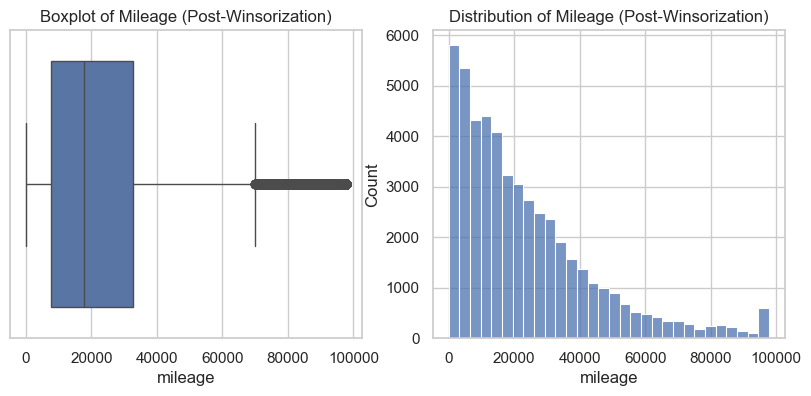

In [114]:
def winsorize_features(df_train, df_val, df_test, features, lower_quantile=0.01, upper_quantile=0.99):
    """
    Apply Winsorization (capping) to specified numeric features based on the training set quantiles.
    
    This technique limits extreme values to reduce the impact of outliers while avoiding data leakage,
    as the capping thresholds are computed only from the training data.

    Parameters
    ----------
    df_train : pd.DataFrame
        Training set DataFrame.
    df_val : pd.DataFrame
        Validation set DataFrame.
    df_test : pd.DataFrame
        Test set DataFrame.
    features : list of str
        List of numerical feature names to be capped.
    lower_quantile : float, default=0.01
        Lower quantile threshold for capping (values below this are set to the threshold).
    upper_quantile : float, default=0.99
        Upper quantile threshold for capping (values above this are set to the threshold).

    Returns
    -------
    tuple of pd.DataFrame
        Updated (df_train, df_val, df_test) with capped values.
    """
    
    for col in features:
        if col in df_train.columns:
            # Compute lower and upper limits using only the training set
            lower_limit = df_train[col].quantile(lower_quantile)
            upper_limit = df_train[col].quantile(upper_quantile)
            
            # Safety check: skip if limits are equal
            if lower_limit == upper_limit:
                print(f"Skipping {col}: limits are identical ({lower_limit}).")
                continue

            # Apply capping to all datasets
            df_train[col] = df_train[col].clip(lower=lower_limit, upper=upper_limit)
            df_val[col] = df_val[col].clip(lower=lower_limit, upper=upper_limit)
            df_test[col] = df_test[col].clip(lower=lower_limit, upper=upper_limit)
            
            print(f"Feature '{col}': capped between {lower_limit:.2f} and {upper_limit:.2f}")
            
    print("--- Outlier Treatment Completed ---\n")
    return df_train, df_val, df_test

# Define numeric continuous columns subject to outliers
outlier_cols = ['mileage', 'tax', 'mpg', 'engineSize', 'year']

# Execute Winsorization
X_train, X_val, test = winsorize_features(X_train, X_val, test, outlier_cols)

# Visual check for a single feature ('mileage') after treatment
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Boxplot of Mileage (Post-Winsorization)")
sns.boxplot(x=X_train['mileage'])
plt.subplot(1, 2, 2)
plt.title("Distribution of Mileage (Post-Winsorization)")
sns.histplot(X_train['mileage'], bins=30)
plt.show()

### Logarithmic transformation 

The variable `tax` was found to have a highly skewed and multi-modal distribution, with statistical outliers ranging from £0 to £580. A check was conducted to validate these extreme values (www.gov.uk/vehicle-tax-rate-tables):

- *Minimum (£0)*: This value is valid and represents tax-exempt vehicles (such as electric cars or certain highly efficient/classic vehicles) under the UK VED system in 2020.
- *Maximum (£580)*: This value is also validated by the UK's vehicle's tax tables. It corresponds to high-emission vehicles registered before April 2017 (which could incur rates up to £760 in the highest bands), or to the sum of the standard rate plus the £320 'Expensive Car Supplement' for vehicles with a list price over £40,000.

Since these values are essential and valid predictors of vehicle value (indicating luxury, age, or environmental class), removing them was not a viable option. So, to stabilize the variance of this skewed feature and converting it into a more near-normal shape and mitigate the disproportionate influence of its extreme values, the **logarithmic transformation** log(1+x) was applied, creating the new feature `log_tax`.

`log_tax`

In [115]:
# Apply np.log1p transformation and remove the original column
for df in [X_train, X_val, test]:
    df['log_tax'] = np.log1p(df['tax'])
    # Remove the original 'tax' column
    # df.drop(columns=['tax'], inplace=True)

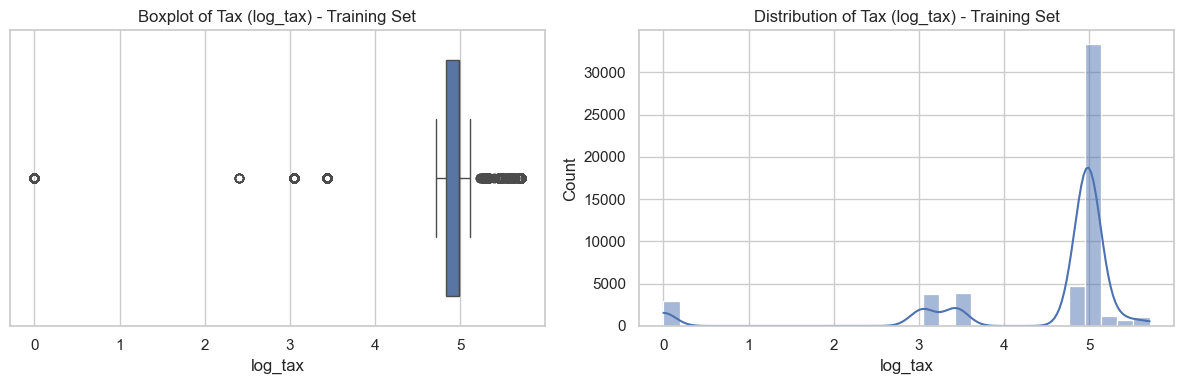


Descriptive statistics for X_train['log_tax']:
count    51660.000000
mean         4.456872
std          1.275673
min          0.000000
25%          4.836282
50%          4.983607
75%          4.983607
max          5.707110
Name: log_tax, dtype: float64


In [116]:
# Visualize the new distribution in X_train
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=X_train['log_tax'])
plt.title('Boxplot of Tax (log_tax) - Training Set')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(x=X_train['log_tax'], kde=True, bins=30)
plt.title('Distribution of Tax (log_tax) - Training Set')
plt.xlabel('log_tax')

plt.tight_layout()
# plt.savefig('log_tax_distribution_transformed.png')
plt.show()

print("\nDescriptive statistics for X_train['log_tax']:")
print(X_train['log_tax'].describe())

The `mileage` attribute was also observed to have a pronounced right-skewed distribution, a common characteristic of usage metrics, consisting mainly of low-mileage vehicles with a long tail of high-mileage outliers. </p>
So, to counteract this without discarding valid data points, the **logarithmic transformation** was applied, resulting in the new feature `log_mileage`. This transformation effectively compresses the scale of high values while preserving low values, thereby achieving variance stabilization.

`log_mileage`

In [117]:
# Apply np.log1p transformation 
for df in [X_train, X_val, test]:
    df['log_mileage'] = np.log1p(df['mileage'])
    # Remove the original 'mileage_km' column
    # df.drop(columns=['mileage'], inplace=True)

In [118]:
print(f"NaN count in log_mileage (before imputation) for current DF: {df['log_mileage'].isna().sum()}")

NaN count in log_mileage (before imputation) for current DF: 859


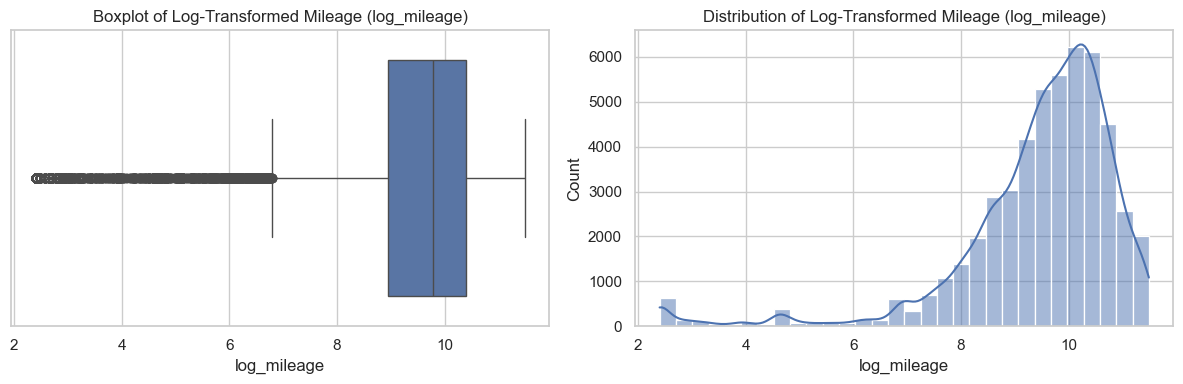


Descriptive statistics for X_train['log_mileage']:
count    50432.000000
mean         9.461826
std          1.506946
min          2.397895
25%          8.949105
50%          9.774432
75%         10.393003
max         11.490979
Name: log_mileage, dtype: float64


In [119]:
# Visualize the new distribution in X_train
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=X_train['log_mileage'])
plt.title('Boxplot of Log-Transformed Mileage (log_mileage)')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(x=X_train['log_mileage'], kde=True, bins=30)
plt.title('Distribution of Log-Transformed Mileage (log_mileage)')
plt.xlabel('log_mileage')

plt.tight_layout()
plt.show()

print("\nDescriptive statistics for X_train['log_mileage']:")
print(X_train['log_mileage'].describe())

The `mpg` feature, which represents a car's fuel efficiency, exhibits a severely right-skewed distribution. While the percentage of statistical outliers in the current dataset (1.62% by IQR) is minimal, the physical and statistical nature of the variable necessitates a transformation. 

To improve model performance, particularly for linear regression and other methods sensitive to skewed distributions, and to linearize this inverse relationship, the logarithmic transformation (**log(x)**) was applied to create the new feature `log_mpg`. This procedure effectively compresses the scale of high mpg values and expands the separation between low values.

`log_mpg`

In [120]:
# Apply the log transformation (np.log)
for df in [X_train, X_val, test]:
    df['log_mpg'] = np.log(df['mpg'])

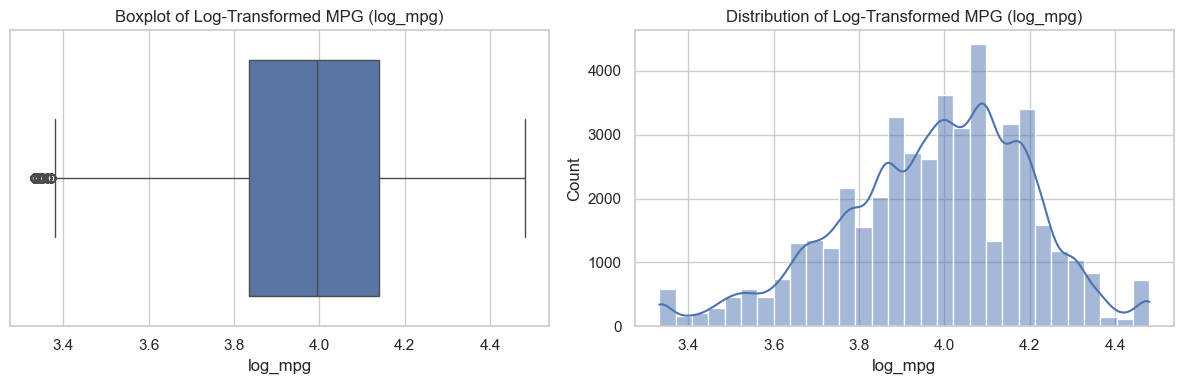


Descriptive statistics for X_train['log_mpg']:
count    46320.000000
mean         3.977319
std          0.224583
min          3.332205
25%          3.835142
50%          3.994524
75%          4.139955
max          4.480985
Name: log_mpg, dtype: float64


In [121]:
# Visualize the new distribution in X_train
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=X_train['log_mpg'])
plt.title('Boxplot of Log-Transformed MPG (log_mpg)')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(x=X_train['log_mpg'], kde=True, bins=30)
plt.title('Distribution of Log-Transformed MPG (log_mpg)')
plt.xlabel('log_mpg')

plt.tight_layout()
plt.show()

print("\nDescriptive statistics for X_train['log_mpg']:")
print(X_train['log_mpg'].describe())

The `engineSize` feature, which represents a car's size of engine in liters, was also logarithmic transformed (**log(x)**) was applied to create the new feature `log_engineSize`. 

`log_engineSize`

In [122]:
for df in [X_train, X_val, test]:
    df['log_engineSize'] = np.log(df['engineSize'])
    # Check for NaNs created by the log transformation
    print(f"NaN count in log_engineSize for current DF: {df['log_engineSize'].isna().sum()}")

NaN count in log_engineSize for current DF: 1244
NaN count in log_engineSize for current DF: 491
NaN count in log_engineSize for current DF: 754


They will be later handled by using **KNN Imputer**.

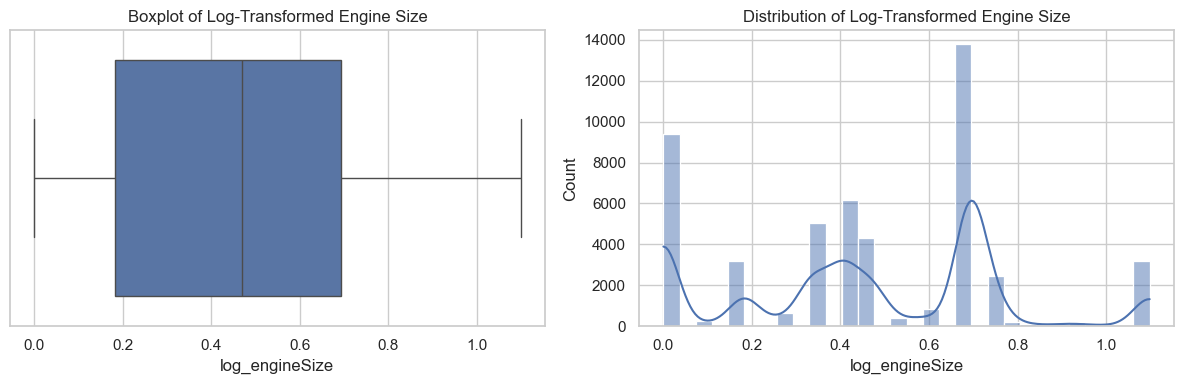


Descriptive statistics for X_train['log_engineSize']:
count    50416.000000
mean         0.460565
std          0.307804
min          0.000000
25%          0.182322
50%          0.470004
75%          0.693147
max          1.098612
Name: log_engineSize, dtype: float64


In [123]:
# Visualize the new distribution in X_train
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=X_train['log_engineSize'])
plt.title('Boxplot of Log-Transformed Engine Size')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(x=X_train['log_engineSize'], kde=True, bins=30)
plt.title('Distribution of Log-Transformed Engine Size')
plt.xlabel('log_engineSize')

plt.tight_layout()
plt.show()

print("\nDescriptive statistics for X_train['log_engineSize']:")
print(X_train['log_engineSize'].describe())

### Data Visualization 

We compare the distributions of selected continuous features in the training (blue) and test (orange) sets using *KDE (Kernel Density Estimates) plots*. The purpose is to ensure the test set is representative of the training set and to detect skewness, outliers or dataset shifts that could affect model performance. Similar distributions indicate good consistency, while large differences may require additional preprocessing or transformation.

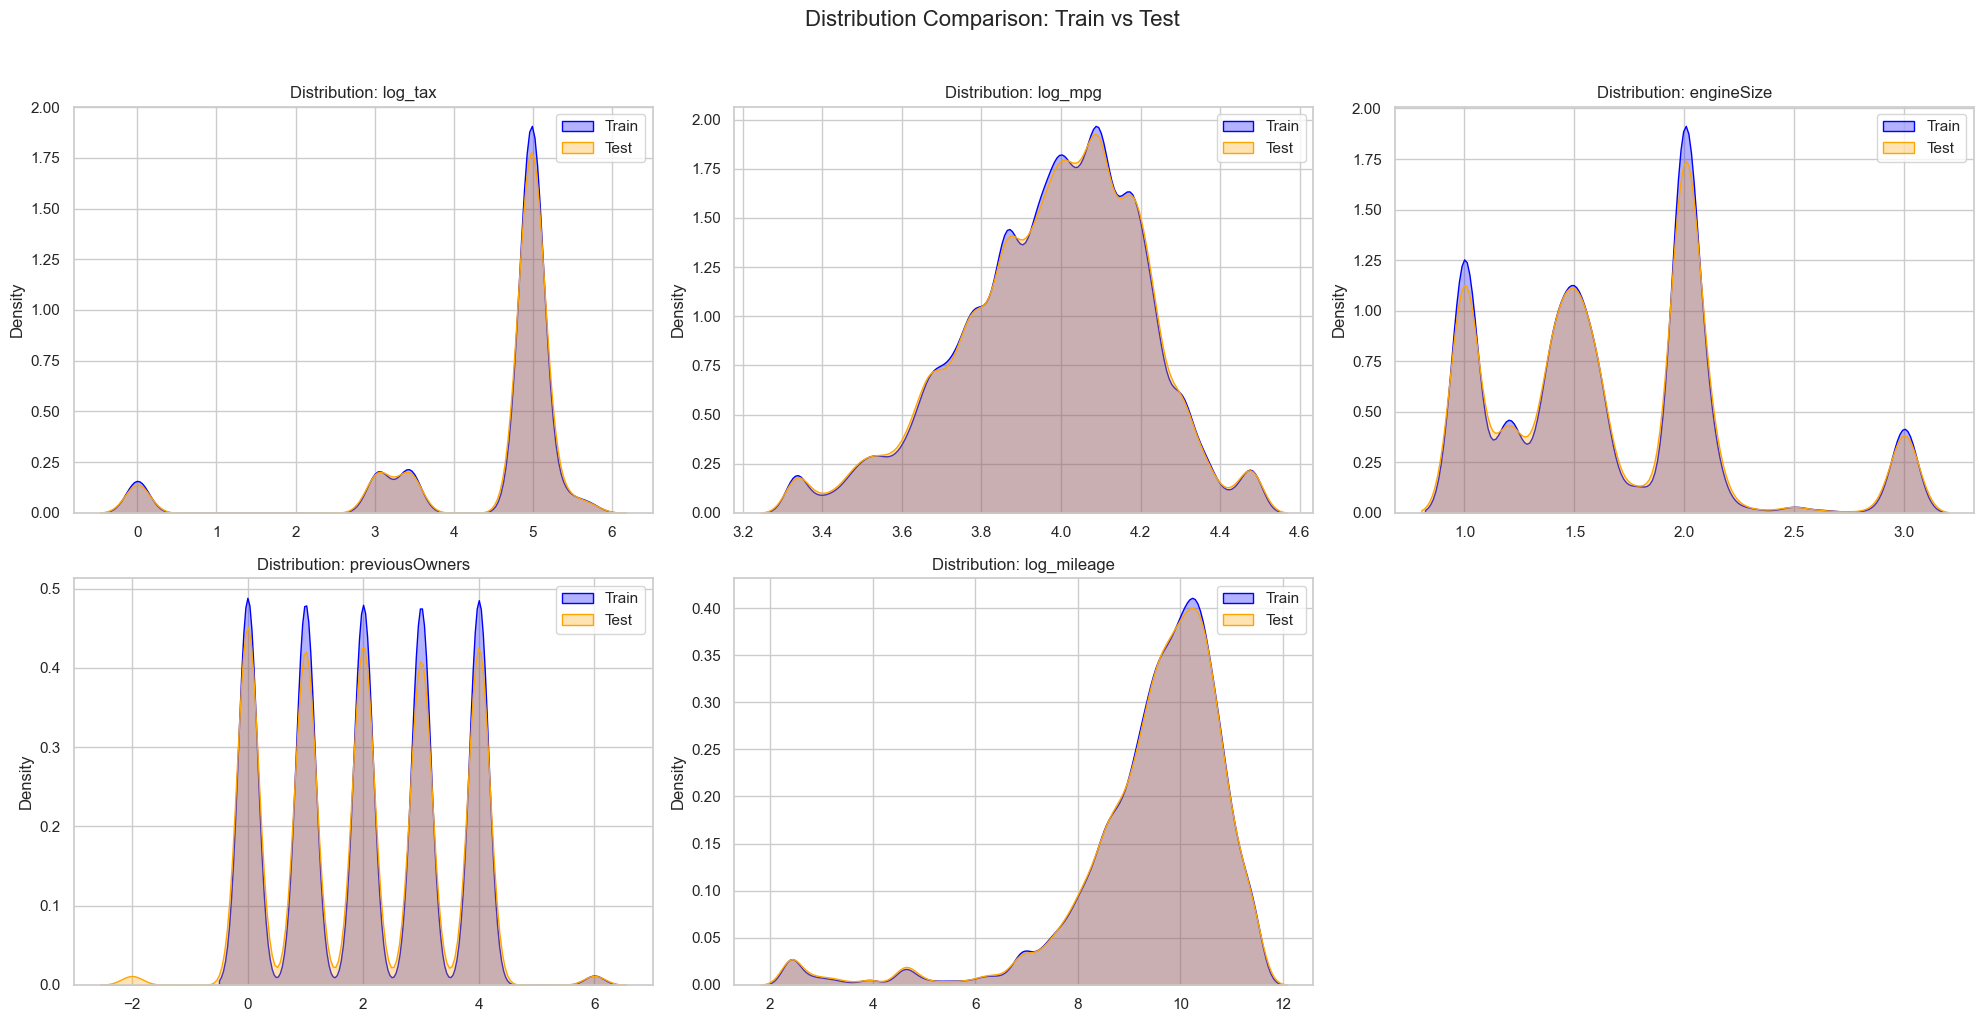

In [124]:
# Define feature groups
#   - 'metric_features': numeric or transformed continuous variables to inspect
#   - 'non_metric_features': categorical variables (to be encoded later)
metric_features = ["log_tax", "log_mpg", "engineSize", "previousOwners", "log_mileage"]
non_metric_features = ["Brand", "model", "transmission", "fuelType"]

# Set up a 2x3 grid for subplots (2 rows, 3 columns)
# There are 5 metric features, so one subplot will remain empty
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()  # Flatten the 2x3 array to a 1D list for easy iteration

# Loop over each metric feature and plot its distribution
for i, feat in enumerate(metric_features):
    ax = axes[i]
    
    # Plot the TRAIN distribution
    #    - Fill area under the curve (fill=True)
    #    - Semi-transparent (alpha=0.3)
    #    - Color: blue
    sns.kdeplot(data=X_train, x=feat, ax=ax, fill=True, color='blue', label='Train', alpha=0.3)
    
    # Plot the TEST distribution for comparison
    #    - Color: orange
    sns.kdeplot(data=test, x=feat, ax=ax, fill=True, color='orange', label='Test', alpha=0.3)
    
    # Set subplot title and clean x-axis label
    ax.set_title(f"Distribution: {feat}", fontsize=12)
    ax.set_xlabel("")
    
    # Show legend in the upper right corner
    ax.legend(loc='upper right')

# Remove any empty subplots (in this case, one leftover subplot)
for i in range(len(metric_features), len(axes)):
    fig.delaxes(axes[i])

# Add a main title for the figure and adjust layout
plt.suptitle("Distribution Comparison: Train vs Test", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

The high degree of overlap between the blue (Train) and orange (Test) curves for all features, including `log_mileage`, `log_tax` and `log_mpg`, suggests that the data splitting strategy is robust and that the test set is representative of the overall population. This minimizes the risk of the model failing due to "unseen" feature ranges. Features such as `tax`, `mpg` and mileage were visualized after log-transformation, producing distributions that are much more symmetrical and less influenced by extreme outliers compared to the raw data. Reducing skewness helps distance-based models, like KNN and linear meta-learners in the stacking ensemble converge faster and produce more stable coefficients.

Even for discrete-like variables such as `engineSize` and `previousOwners`, the density peaks are well aligned, confirming that car segments (e.g., 1.0L economy cars vs. 2.0L performance cars) are present in similar proportions in both datasets. The absence of significant divergence between the distributions indicates no major covariate shift, allowing us to proceed with confidence that performance metrics obtained during cross-validation will reliably reflect the final model.

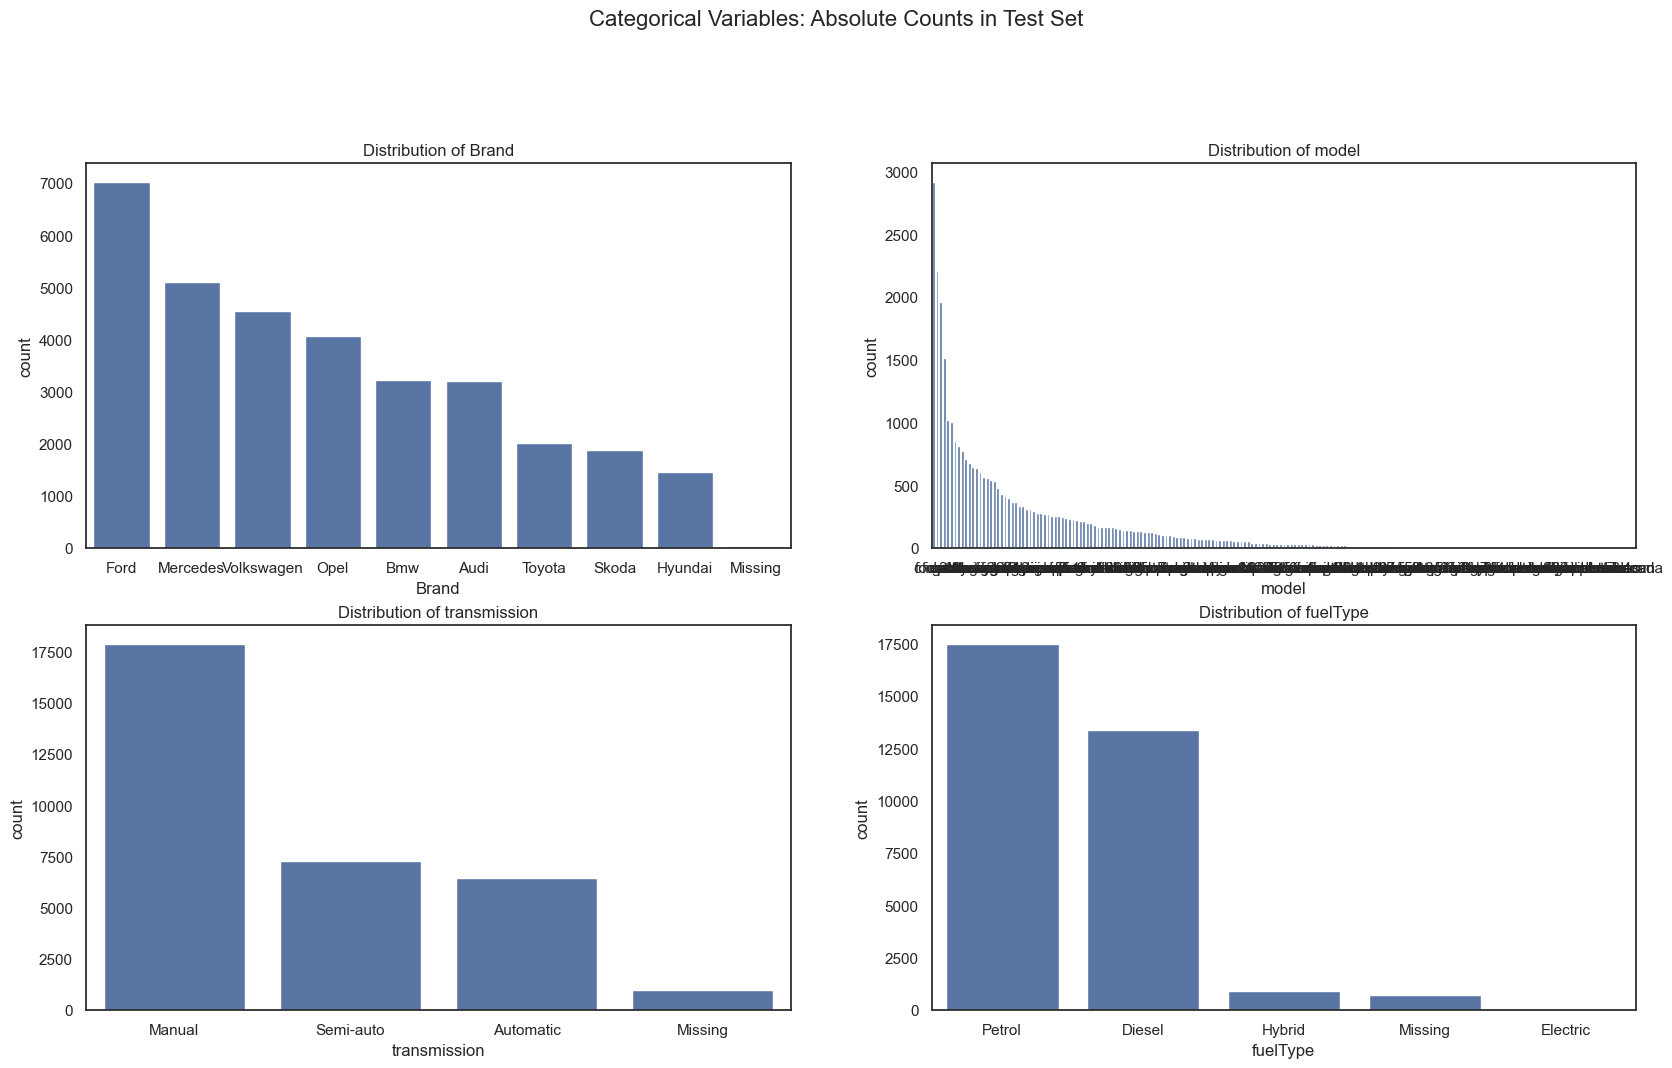

In [125]:
# Purpose:
#   Visualize the distribution of categorical (non-metric) features in the test dataset 
#   to understand the frequency of each category, detect dominant classes, and identify 
#   potential imbalances that may affect modeling.

# Set Seaborn style for clean and readable plots
sns.set(style="white")

# Define subplot grid layout:
#   - 2 rows
#   - Number of columns calculated dynamically to fit all features, using ceil division
n_rows = 2
n_cols = (len(non_metric_features) + 1) // n_rows

# Create figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 11))

# Loop over each categorical feature and its corresponding axis
#   - sns.countplot plots the absolute counts of each category
#   - Categories are ordered by frequency for easier visual comparison
for ax, feat in zip(axes.flatten(), non_metric_features):
    sns.countplot(
        x=test[feat], 
        ax=ax, 
        order=test[feat].value_counts().index  # Sort bars by frequency
    )
    ax.set_title(f"Distribution of {feat}", fontsize=12)

# Add overall title for the figure
plt.suptitle("Categorical Variables: Absolute Counts in Test Set", fontsize=16, y=1.02)

# Display the figure
plt.show()

The visual analysis of the **categorical features** via bar plots confirms both their high cardinality and significant class imbalance, which is vital information for the subsequent encoding strategy. The plots for `Brand`, `transmission` and `fuelType` all demonstrate a non-uniform distribution. 
- Similarly, `Brand` is heavily dominated by a few manufacturers (e.g., Ford, Mercedes, VW, and Opel), a concentration that reflects market share but also suggests that the predictive signal may be localized within these dominant categories.
- Both `transmission` and `fuelType` show strong class imbalance: 'Manual' transmissions and 'Petrol' fuel types are the overwhelmingly dominant classes, with 'Automatic' and 'Diesel' being the secondary groups, and all other categories ('Hybrid', 'Electric', 'Other', 'Missing') having minimal counts.

**Note:** the `model` graph shows the predictors' high cardinality. 

---

## Feature Engineering

In this step, we enhance the dataset to improve model performance by creating new features from existing ones, encoding categorical variables to preserve meaningful distinctions and scaling numerical features to maintain consistency across different magnitudes.

Features such as `car_age`, `Brand_encoded` and `model_encoded` have already been created, along with logarithmically transformed variables to handle skewed distributions and stabilize variance.

#### `fuel_cost_per_mile`

This new feature was created as the *inverse of miles per gallon (1 / mpg)*. This transformation shows the **approximate amount of fuel required to travel one mile**. Since vehicles with lower mpg values consume more fuel per unit distance, this feature captures fuel inefficiency more directly than the raw mpg measure. Normally, vehicles that are more expensive to run (i.e., with higher fuel cost per mile) often exhibit lower resale values, reflecting their reduced long-term cost-effectiveness.

From an analytical perspective, this transformation is also useful for modeling purposes, as it tends to linearize the inverse relationship between fuel efficiency and price.

In [126]:
# Fuel cost per mile
#  - Created as the inverse of miles per gallon (1 / mpg)
#  - Represents fuel consumption per mile: lower mpg -> higher fuel cost per mile
#  - Helps capture the impact of fuel efficiency on car resale value
#  - Avoid division by zero by replacing 0 mpg with NaN
X_train['fuel_cost_per_mile'] = 1 / X_train['mpg'].replace(0, np.nan)
X_val['fuel_cost_per_mile'] = 1 / X_val['mpg'].replace(0, np.nan)
test['fuel_cost_per_mile'] = 1 / test['mpg'].replace(0, np.nan)

#### `log_avg_mileage`

A new variable, `log_avg_mileage`, was created to represent the **vehicle’s usage intensity**, calculated as the logarithm of the average distance driven per year. This measure captures how intensively a car has been used relative to its age, offering a more nuanced proxy for wear and tear than raw mileage alone.

From an economic standpoint, higher usage intensity typically implies greater depreciation and lower resale value, making this variable a meaningful predictor of price.

In [127]:
# Log-transformed average mileage per year
#  - Average mileage per year = mileage / car_age
#  - Protect against division by zero for brand new cars (car_age <= 0)
#  - Apply log(1 + x) transformation to reduce skewness
#  - This feature captures driving intensity relative to car age, which may influence resale value
for df in [X_train, X_val, test]:
    if 'car_age' in df.columns and 'mileage' in df.columns:
        # Prevent division by zero for new cars (age = 0)
        epsilon = 1e-6  # small constant to avoid division by zero

        # Calculate average mileage per year
        df['avg_mileage_rate'] = np.where(
            df['car_age'] <= 0,
            0,  # Brand new cars
            df['mileage'] / (df['car_age'] + epsilon)
        )
        df['log_avg_mileage'] = np.log1p(df['avg_mileage_rate'])
        df.drop(columns=['avg_mileage_rate'], inplace=True)

#### `is_top_seller`

In the second-hand automotive market, brand equity plays a dual role: it influences both the initial purchase price and the rate of depreciation. Vehicles from "Top Seller" brands often benefit from higher liquidity (they are easier to sell) and a more established network of parts and services, which can lead to better price retention.

The `is_top_seller` feature is a binary indicator representing **whether a car belongs to one of the most sold brands in the UK during 2020** (https://www.best-selling-cars.com/britain-uk/2020-full-year-britain-best-selling-car-brands-in-the-uk/). High-sales brands may exhibit distinct pricing patterns due to supply, demand, and market familiarity. For the purpose of this analysis, only the top five highest-selling car brands were considered.

In [128]:
# Define the High-Volume/Top-Selling brands based on market frequency
most_sold = ['Ford', 'Volkswagen', 'Mercedes', 'Bmw', 'Audi']

for df in [X_train, X_val, test]:
    if 'Brand' in df.columns:
        # Create a proxy for 'Market Liquidity'
        # Assign 1 for high-demand brands, 0 for others. This captures 
        # brand-level effects that might be diluted in granular encoding.
        df['is_top_seller'] = df['Brand'].apply(lambda x: 1 if x in most_sold else 0)

        # Note on Feature Redundancy: 
        # While 'Brand' and 'model' are eventually dropped, they are kept 
        # until the final encoding stage to ensure no data is lost for 
        # other engineering tasks (like Ordered Ordinal Encoding).
        # df.drop(columns=['Brand', 'model'], inplace=True) 

`Is_premium`

The automotive market is naturally divided into mass-market and premium segments. While volume brands such as Ford or Volkswagen dominate in terms of market share, premium brands like Mercedes, BMW and Audi follow a distinct pricing logic. These vehicles are characterized by higher base prices, slower long-term depreciation for specific models and feature sets that are not fully captured by standard numerical variables.

By creating an `Is_premium` feature to flag these luxury brands, we provide the model with a binary indicator of premium status. This is particularly valuable because high-end vehicles often exhibit greater price variance, helping the model understand why two cars with similar age and mileage can have significantly different prices. 

In [129]:
# Define the 'Big Three' German luxury brands
# These brands are historically associated with higher price floors 
# and distinct depreciation patterns compared to mass-market brands
premium_brands = ['Mercedes', 'Bmw', 'Audi'] 

for df in [X_train, X_val, test]:
    if 'Brand' in df.columns:
        # Create a High-Level Status Signal
        # This binary feature helps the model identify the 'Luxury' segment 
        # and adjust the price baseline accordingly, regardless of individual model names
        df['is_premium'] = df['Brand'].apply(lambda x: 1 if x in premium_brands else 0)

`is_performance_model`

Standard numerical features such as engine size or year often fail to capture the exponential price premium associated with high-performance variants, like Audi's RS, BMW's M, or Ford's Mustang. A 2.0L engine in a regular sedan is valued very differently compared to the same engine in a high-performance sports hatchback due to factors such as chassis tuning, brand heritage, and market demand.

By introducing the `is_performance_model` feature, we explicitly signal to the model which vehicles are high-value outliers. This helps reduce residual errors in the high-end segment, as performance models frequently appear as overpriced relative to base models. It also allows the model to capture non-linear price retention patterns, since enthusiast vehicles often depreciate differently and retain value better than mass-market economy cars. Additionally, for tree-based models like Random Forests or Extra Trees, this feature provides a high-entropy categorical split that enables the algorithm to separate performance-oriented clusters early in the decision process.

In [130]:
def classify_performance_model(row):
    """
    Identifies high-performance or iconic luxury models using domain-specific knowledge.
    These models command a price premium that standard features (engineSize, age) 
    cannot fully explain.
    """
    model = str(row['model']).lower().strip()
    brand = str(row['Brand']).lower().strip()
    
    # Mapping of performance-oriented designations and iconic sports models
    performance_map = {
        'audi': ['rs', 'rs3', 'rs4', 'rs5', 'rs6', 'r8', 's3', 's4', 's5', 's8', 'sq5', 'sq7', 'tt'],
        'bmw': ['m2', 'm3', 'm4', 'm5', 'm6', 'm', 'i8', 'z3', 'z4'],
        'toyota': ['supra', 'gt86'],
        'ford': ['mustang', 'rs'],
        'mercedes': ['sl', 'slk', 'g class', 'cls class'],
        'volkswagen': ['scirocco', 'cc', 'touareg', 'arteon'],
        'opel': ['gtc', 'ampera']
    }
    
    # Binary check: if the model/brand pair matches our performance criteria
    if brand in performance_map:
        if model in performance_map[brand]:
            return 1
            
    return 0

# Apply the classification to enrich the feature set across all data partitions
for df in [X_train, X_val, test]:
    df['is_performance_model'] = df.apply(classify_performance_model, axis=1)

`is_high_power`

The relationship between `engine size` and `price` is not uniform across all vehicles; it is strongly influenced by the vehicle's segment. A 2.0L engine in a large SUV may represent a base, entry-level version, whereas the same 2.0L engine in a compact hatchback, such as a VW Golf or Ford Fiesta, often indicates a high-performance variant like a GTI or ST.

By introducing the `is_high_power` feature, we apply a targeted heuristic to capture these engine-model interactions. This binary indicator helps the model recognize hidden performance versions that standard numerical features alone might undervalue. It allows the model to account for non-linear price premiums, as small cars with larger engines often command disproportionately higher prices relative to the global average for that engine size. For premium brands, engines above 3.0L frequently signal specialized performance divisions, even when the specific sub-model is not recorded. 

In [131]:
def classify_hidden_power(row):
    """
    Identifies high-performance variants based on engine size relative to model segment.
    This captures the 'Sleeper' effect where a compact frame with a large engine 
    commands a significant price premium.
    """
    model = str(row['model']).lower().strip()
    brand = str(row['Brand']).lower().strip()
    engine = row['engineSize']
    
    # Compact/Medium cars with large displacements (GTI, ST, R variants)
    # A 2.0L engine in these models signifies the top-tier performance trim.
    if brand == 'volkswagen' and model in ['golf', 'polo', 'scirocco'] and engine >= 2.0:
        return 1
    if brand == 'ford' and model in ['focus', 'fiesta', 'mondeo'] and engine >= 2.0:
        return 1
    
    # Executive/Premium cars with high-displacement engines (AMG/M-Sport levels)
    # Engines >= 3.0L in these segments represent high-end engineering and luxury status.
    if brand == 'mercedes' and engine >= 3.0:
        return 1
    if brand == 'bmw' and engine >= 3.0:
        return 1
        
    return 0

# Apply the heuristic to create a high-power binary signal
for df in [X_train, X_val, test]:
    df['is_high_power'] = df.apply(classify_hidden_power, axis=1)

#### **One-Hot Encoding**

One-Hot Encoding (OHE) is applied to categorical variables with a limited number of unique values, such as `transmission` and `fuelType`. This technique converts each category into a separate binary column, allowing machine learning models to process categorical data numerically without imposing any artificial ordinal relationship.

To prevent multicollinearity, the first category of each feature is dropped. This encoding approach is particularly suitable for low-cardinality variables, as it preserves interpretability while avoiding the proliferation of sparse columns that would occur with high-cardinality features.

In [132]:
def one_hot_encode_datasets(X_train, X_val, test, ohe_features):
    """
    Apply One-Hot Encoding (OHE) to selected categorical features across training, validation, and test sets.
    
    Parameters:
    ----------
    X_train : pd.DataFrame
        Training dataset containing categorical features to encode.
    X_val : pd.DataFrame
        Validation dataset containing categorical features to encode.
    test : pd.DataFrame
        Test dataset containing categorical features to encode.
    ohe_features : list of str
        List of categorical columns to apply One-Hot Encoding to (e.g., ['transmission', 'fuelType']).
    
    Process:
    -------
    1. Initialize OneHotEncoder with:
        - drop='first' to prevent multicollinearity by removing the first category.
        - sparse_output=False to return dense NumPy arrays.
        - handle_unknown='ignore' to safely encode unseen categories in validation/test sets.
    2. Fit the encoder on the training set and transform all datasets.
    3. Convert the resulting arrays to DataFrames with proper column names.
    4. Concatenate the new one-hot columns to the original datasets and drop the original categorical columns.
    
    Returns:
    -------
    X_train_enc, X_val_enc, test_enc : pd.DataFrame
        Updated datasets with one-hot encoded columns.
    """
    
    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    
    # Fit on training data and transform all datasets
    X_train_ohe = encoder.fit_transform(X_train[ohe_features])
    X_val_ohe = encoder.transform(X_val[ohe_features])
    test_ohe = encoder.transform(test[ohe_features])
    
    # Convert arrays to DataFrames with proper column names and original indices
    ohe_columns = encoder.get_feature_names_out(ohe_features)
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_columns, index=X_train.index)
    X_val_ohe = pd.DataFrame(X_val_ohe, columns=ohe_columns, index=X_val.index)
    test_ohe = pd.DataFrame(test_ohe, columns=ohe_columns, index=test.index)
    
    # Concatenate one-hot columns and drop original categorical columns
    X_train_enc = pd.concat([X_train.drop(ohe_features, axis=1), X_train_ohe], axis=1)
    X_val_enc = pd.concat([X_val.drop(ohe_features, axis=1), X_val_ohe], axis=1)
    test_enc = pd.concat([test.drop(ohe_features, axis=1), test_ohe], axis=1)
    
    return X_train_enc, X_val_enc, test_enc

ohe_features = ['transmission', 'fuelType']
X_train, X_val, test = one_hot_encode_datasets(X_train, X_val, test, ohe_features)

In [133]:
# Checking results
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51660 entries, 18915 to 32117
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   51660 non-null  object 
 1   model                   51660 non-null  object 
 2   mileage                 50432 non-null  float64
 3   tax                     51660 non-null  float64
 4   mpg                     46320 non-null  float64
 5   engineSize              50416 non-null  float64
 6   previousOwners          51660 non-null  int64  
 7   Brand_encoded           51660 non-null  float64
 8   model_encoded           51660 non-null  float64
 9   car_age                 51660 non-null  int64  
 10  log_tax                 51660 non-null  float64
 11  log_mileage             50432 non-null  float64
 12  log_mpg                 46320 non-null  float64
 13  log_engineSize          50416 non-null  float64
 14  fuel_cost_per_mile      46320 non-null 

In [134]:
X_train.head()

,Brand,model,mileage,tax,mpg,engineSize,previousOwners,Brand_encoded,model_encoded,car_age,...,is_premium,is_performance_model,is_high_power,transmission_Manual,transmission_Missing,transmission_Semi-auto,fuelType_Electric,fuelType_Hybrid,fuelType_Missing,fuelType_Petrol
carID,,,,,,,,,,,,,,,,,,,,,
18915,Ford,focus,3214.0,145.0,NaN,1.0,4,2.0,63.0,1,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
34171,Hyundai,ioniq,7074.0,135.0,78.5,1.6,1,3.0,94.0,1,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22417,Ford,Missing,21831.0,145.0,74.3,1.5,1,2.0,10.0,2,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16151,Ford,focus,17339.0,145.0,NaN,1.0,1,2.0,63.0,3,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
47590,Skoda,citigo,3000.0,20.0,64.2,1.0,0,7.0,44.0,4,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## KNN Imputation and Scaling 

Distance-based algorithms, such as K-Nearest Neighbors (KNN), are highly sensitive to the scale of input features. If one feature has a significantly larger range than others (for example, `mileage` versus `engine size`) it can dominate the distance calculations, resulting in biased imputation. To mitigate this, we applied Z-score standardization using **StandardScaler** to all continuous numeric features. This step is particularly effective in our workflow because prior logarithmic transformations already shifted skewed variables closer to a Gaussian-like distribution, aligning well with the assumptions of the scaler.

To handle missing values without introducing bias, we implemented a **KNN imputer**, which estimates missing entries by identifying the most similar observations in the multi-dimensional feature space. Unlike simple mean or median replacement, this method preserves the relationships between features. To ensure the integrity of our results and prevent data leakage, we combined the scaling and KNN imputation in a Scikit-Learn Pipeline and used cross-validation to determine the optimal number of neighbors, $k$. This guarantees that both the scaling parameters and imputation estimates are recalculated within each cross-validation fold, so information from the validation set does not influence the training phase.

In [135]:
"""
PURPOSE:
Standardize continuous numeric features and impute missing values using an optimized K-Nearest Neighbors approach.

STEPS:
1. Identify continuous numerical features for scaling and imputation.
2. Define a range of K-neighbors to evaluate via Cross-Validation.
3. Utilize a Pipeline (StandardScaler -> KNNImputer -> RandomForestRegressor) to find the optimal K that minimizes Mean Squared Error (MSE).
4. Apply the final preprocessing Pipeline (best K) to the Train, Validation and Test sets.
5. Ensure zero data leakage by fitting transformers only on training data.

PARAMETERS:
- Ks (list): Candidate values for the number of neighbors [5, 6, 7, 8, 9].
- cv (int): Number of folds for cross-validation (3).
- numerical_cols_knn (list): Features subjected to transformation.

RETURNS:
- Scaled and Imputed versions of X_train, X_val and test datasets.
"""

# Define numerical columns for imputation
# Using both raw and log-transformed versions for consistency check
target_cols = ['log_mileage', 'log_mpg', 'log_engineSize', 'car_age', 'fuel_cost_per_mile', 'log_avg_mileage', 'mileage', 'mpg', 'engineSize']
numerical_cols_knn = [col for col in target_cols if col in X_train.columns]

# Optimize K-Neighbors via Cross-Validation Pipeline
Ks = [5, 6, 7, 8, 9, 11]
cv_results = {}

print("--- Optimizing KNN Imputer (K-Selection) ---")

for k in Ks:
    # Scaling must be inside the pipeline to avoid leakage during CV
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('imputer', KNNImputer(n_neighbors=k)),
        ('model', RandomForestRegressor(random_state=42, n_jobs=-1))
    ])
    
    # Evaluate the Pipeline using Cross-Validation
    # We use 'cross_val_score' to split X_train into 3 folds
    # In each iteration:
    #    - 2 folds are used to Fit Scaler + Fit Imputer + Train Model
    #    - 1 fold is used to Transform + Predict
    # This guarantees that the Imputer parameters are never learned from the validation fold (Zero Leakage).
    scores = cross_val_score(
        pipeline,
        X_train[numerical_cols_knn],
        y_train,
        cv=3,
        scoring='neg_mean_squared_error', # Sklearn maximizes scores, so errors are returned as negative
        n_jobs=-1
    )
    
    # Convert the Negative MSE back to positive for easier interpretation
    # Example: -18000 becomes 18000 (Lower is better)
    cv_results[k] = -scores.mean()
    
    print(f"K={k} | Cross-Validated MSE: {cv_results[k]:.2f}")

# Identify the best K
best_k = min(cv_results, key=cv_results.get)
print(f"\nOptimal K found: {best_k}")

# Final Preprocessing Application
# The final pipeline standardizes data and fills NaNs using the best K
final_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('imputer', KNNImputer(n_neighbors=best_k))
])

# Fit only on X_train to prevent leakage; transform all sets
X_train[numerical_cols_knn] = final_pipeline.fit_transform(X_train[numerical_cols_knn])
X_val[numerical_cols_knn] = final_pipeline.transform(X_val[numerical_cols_knn])
test[numerical_cols_knn] = final_pipeline.transform(test[numerical_cols_knn])

--- Optimizing KNN Imputer (K-Selection) ---
K=5 | Cross-Validated MSE: 18354460.90
K=6 | Cross-Validated MSE: 18303753.23
K=7 | Cross-Validated MSE: 18362476.36
K=8 | Cross-Validated MSE: 18289935.17
K=9 | Cross-Validated MSE: 18263447.77
K=11 | Cross-Validated MSE: 18240735.11

Optimal K found: 11


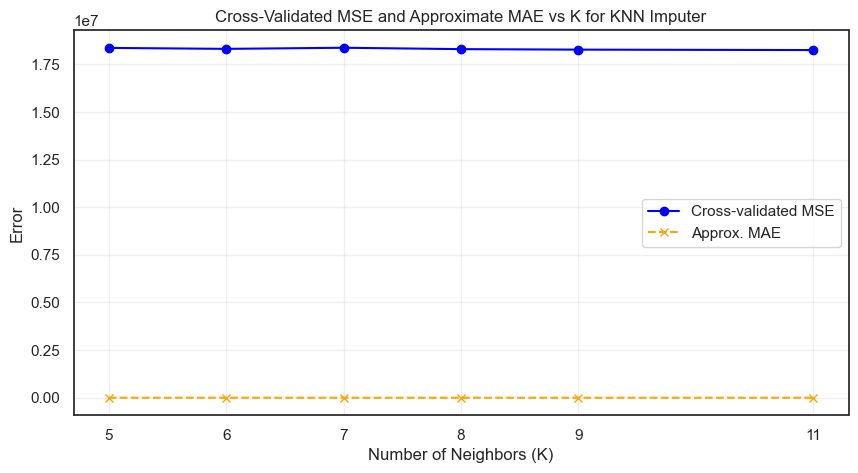

In [136]:
# PURPOSE:
#   Visualize the relationship between the number of neighbors (K) in
#   the KNN imputer and the cross-validated error metrics (MSE and
#   an approximate MAE) to assess the sensitivity of imputation quality
#   to K.

# Extract K values and corresponding MSE results from the CV
k_values = list(cv_results.keys())
mse_values = list(cv_results.values())

# Convert MSE to approximate MAE for visualization purposes
# Approximation formula: MAE ≈ sqrt(MSE) * 0.8
# This provides a rough sense of error in the same units as the target
mae_values = [v**0.5 * 0.8 for v in mse_values]

# Initialize figure
plt.figure(figsize=(10, 5))

# Plot cross-validated MSE
plt.plot(
    k_values, mse_values,
    marker='o',
    linestyle='-',
    color='blue',
    label='Cross-validated MSE'
)

# Plot approximate MAE
plt.plot(
    k_values, mae_values,
    marker='x',
    linestyle='--',
    color='orange',
    label='Approx. MAE'
)

# Configure axes and title
plt.xticks(k_values)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error')
plt.title('Cross-Validated MSE and Approximate MAE vs K for KNN Imputer')
plt.legend()
plt.grid(alpha=0.3)

# Display the plot
plt.show()

The cross-validated MSE and approximated MAE curves remain nearly constant across the tested range of k values. This indicates that the number of neighbors has minimal impact on the quality of the imputation, as the nearest neighbors provide similar information regardless of k. Therefore, the choice of *k = 11* is primarily a practical selection and any value within the tested range would yield equivalent results without affecting model performance.

In [137]:
# Verify missing values
print("Missing values after KNN imputation:")
print("X_train:")
print(X_train.isna().sum()[X_train.isna().sum() > 0])
print("\nX_val:")
print(X_val.isna().sum()[X_val.isna().sum() > 0])
print("\ntest:")
print(test.isna().sum()[test.isna().sum() > 0])

Missing values after KNN imputation:
X_train:
Series([], dtype: int64)

X_val:
Series([], dtype: int64)

test:
Series([], dtype: int64)


---

## Feature selection

With the dataset fully preprocessed, encoded and scaled, we now move on to **feature selection**, a crucial step to identify the most predictive variables while removing redundant or irrelevant ones. Effective feature selection not only improves model interpretability but also reduces overfitting and computational cost.

To ensure a robust and comprehensive approach, we applied three complementary feature selection techniques. First, a `filter method` based on Pearson's correlation was used to identify features that exhibit strong linear relationships with the target variable while avoiding multicollinearity among predictors. Second, a `wrapper method`, specifically Recursive Feature Elimination (RFE), was employed to iteratively evaluate feature subsets using a predictive model, selecting the combination that maximizes performance. Finally, an `embedded method` using Lasso regression was applied, which performs feature selection intrinsically by shrinking the coefficients of less important variables toward zero. Together, these three approaches provide a balanced strategy to retain the most informative, non-redundant features for modeling.

In [138]:
# Delete original categorical columns to avoid redundancy
X_train.drop(columns=['Brand', 'model'], inplace=True)
X_val.drop(columns=['Brand', 'model'], inplace=True)
test.drop(columns=['Brand', 'model'], inplace=True)

### Filter Methods

We begin with filter methods since they require relatively low computational resources and provide a quick way to perform an initial assessment of feature relevance.

In [139]:
# Univariance
# Variance is a measure of how much the values of a feature differ from the mean. Features with very low variance 
# may carry little information and can sometimes be candidates for removal in preprocessing
X_train.var(ddof=0).round(3).sort_values(ascending=False)

tax                       3494.184
model_encoded             2918.693
Brand_encoded                8.847
previousOwners               2.080
log_tax                      1.627
car_age                      1.000
mileage                      0.993
log_mileage                  0.992
log_engineSize               0.982
engineSize                   0.981
log_avg_mileage              0.980
fuel_cost_per_mile           0.948
log_mpg                      0.948
mpg                          0.946
transmission_Manual          0.248
fuelType_Petrol              0.248
is_premium                   0.229
is_top_seller                0.206
transmission_Semi-auto       0.173
is_high_power                0.075
transmission_Missing         0.029
fuelType_Hybrid              0.028
is_performance_model         0.022
fuelType_Missing             0.022
fuelType_Electric            0.000
dtype: float64

Features with high variance (e.g., `tax` and `model_encoded`) vary widely across the dataset, meaning they carry a lot of information that can help the model distinguish between observations. Features with moderate variance (e.g., `car_age`, `mileage`, `log_mileage`, `engineSize`) show a reasonable spread suitable for modeling. On the other hand, features with very low variance (e.g., `fuelType_Electric`, `fuelType_Missing`, `is_performance_model`) are almost constant across the dataset. These features contribute little to model learning and may have limited predictive power, potentially acting as weak signals.

It is evident that the feature `fuelType_Electric` has zero variance, indicating that it is constant across all samples and can therefore could be safely removed.

In [140]:
# Remove fuelType_Eletric 
X_train.drop(columns=['fuelType_Electric'], inplace=True)
X_val.drop(columns=['fuelType_Electric'], inplace=True)
test.drop(columns=['fuelType_Electric'], inplace=True)

#### **Correlation Indices**

We need to examine **feature correlations** to assess both relevance and redundancy. 

To capture different types of relationships, we will compute __`Pearson`__ correlation for linear associations, and __`Spearman`__ for monotonic but potentially non-linear relationships. 

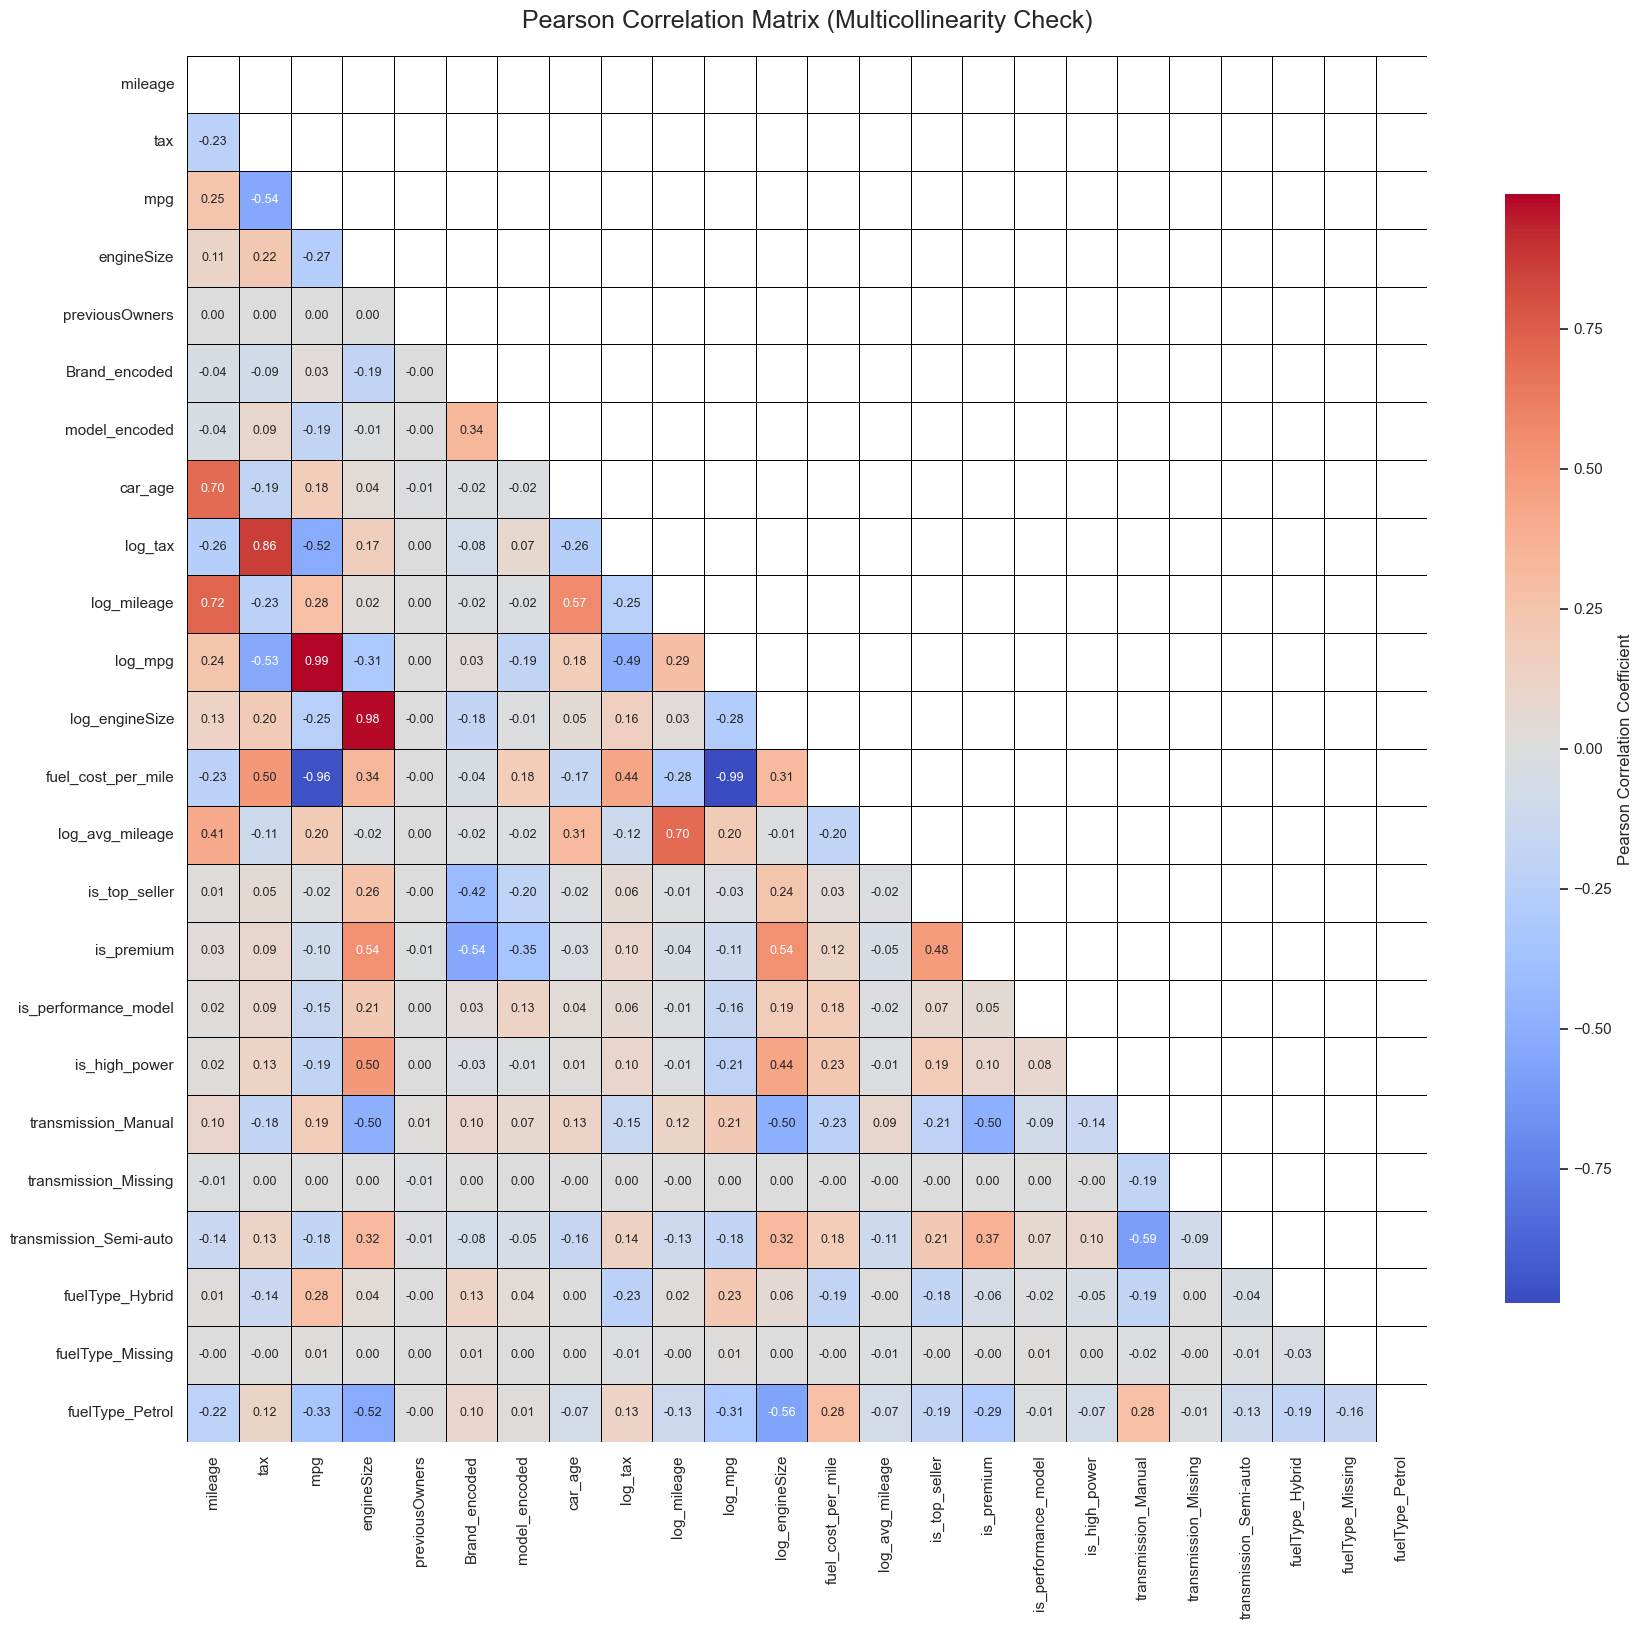

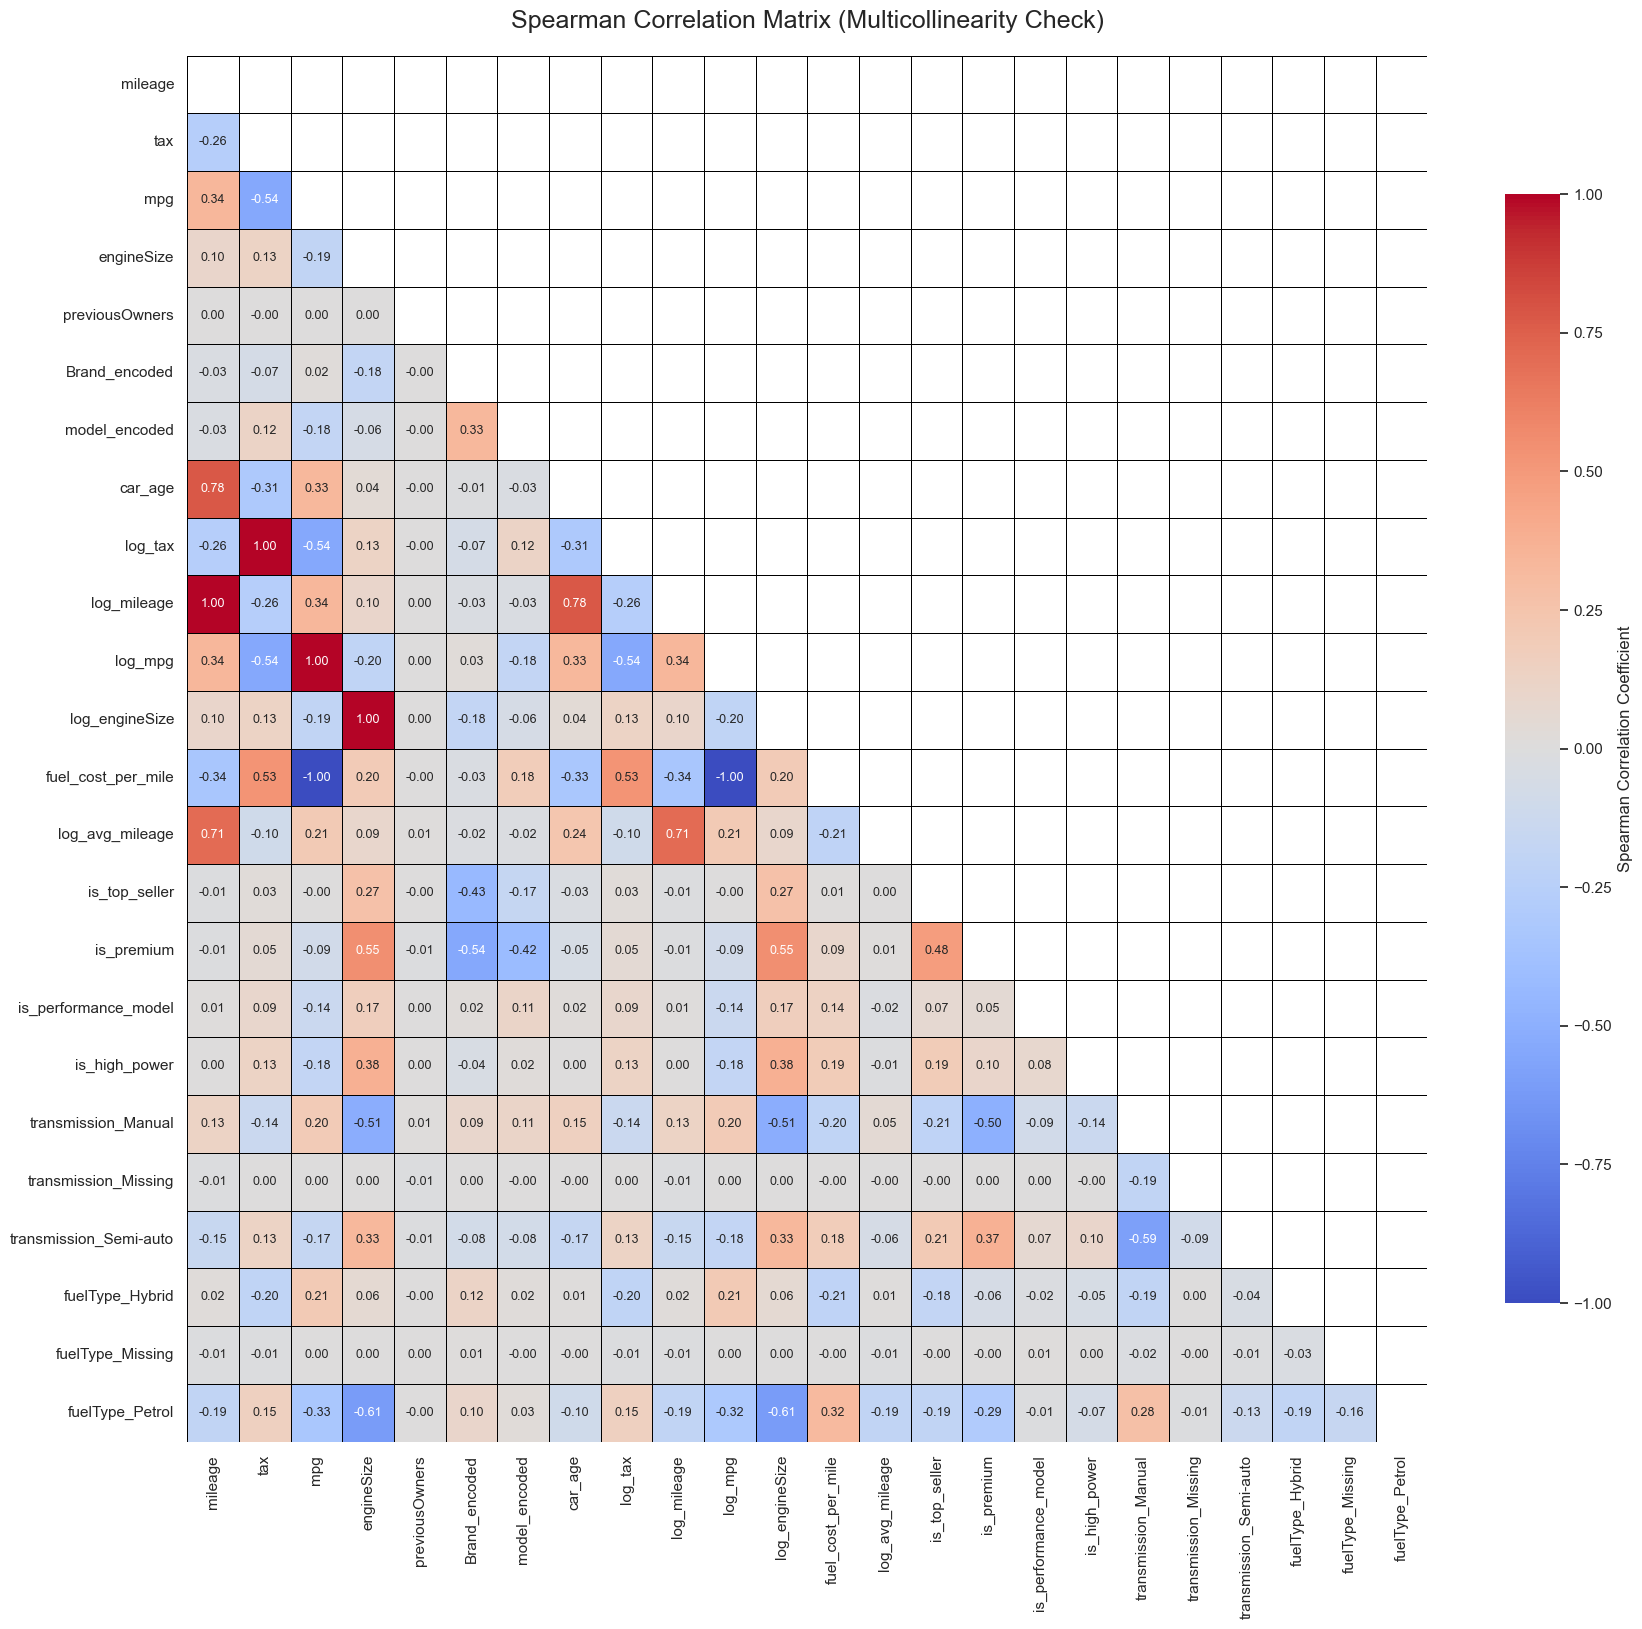

--- High Multicollinearity Detection (Spearman > 0.80) ---

Number of highly correlated pairs found: 6
log_tax             tax           1.000
log_mpg             mpg           0.999
log_engineSize      engineSize    0.999
log_mileage         mileage       0.999
fuel_cost_per_mile  mpg          -0.998
                    log_mpg      -0.999
dtype: float64


In [141]:
"""
PURPOSE:
Analyze feature correlations using Pearson and Spearman coefficients to detect 
multicollinearity and assess feature redundancy.

STEPS:
1. Isolate numerical and boolean predictors from the scaled training set.
2. Compute correlation matrices using 'pearson' (linear) and 'spearman' (monotonic) methods.
3. Visualize relationships using masked heatmaps to focus on unique pairs.
4. Quantify strong multicollinearity by filtering pairs with Spearman correlation > 0.80.

PARAMETERS:
- methods: List of correlation types ["pearson", "spearman"].
- threshold: Absolute correlation cutoff (0.80) for flagging redundancy.

RETURNS:
- Heatmap visualizations.
- A pandas Series (to_drop) listing feature pairs with high multicollinearity.
"""

# Data Preparation
# Create a dedicated subset for correlation analysis to avoid modifying the main training set
X_train_pred = X_train.copy()
predictor_cols = X_train_pred.select_dtypes(include=['number', 'bool']).columns.tolist()

methods = ["pearson", "spearman"]

# Visualization Loop
for method in methods:
    # Compute correlation matrix
    cor = X_train_pred[predictor_cols].corr(method=method).round(2)
    
    # Create an upper-triangle mask to hide redundant duplicate values (matrix symmetry)
    mask = np.triu(np.ones_like(cor, dtype=bool))
    
    plt.figure(figsize=(20, 18))
    sns.heatmap(
        cor, 
        annot=True, 
        fmt=".2f", 
        cmap='coolwarm', 
        mask=mask, 
        linewidths=.5, 
        linecolor='black',
        annot_kws={"fontsize": 9},
        cbar_kws={'label': f'{method.capitalize()} Correlation Coefficient', 'shrink': 0.8}
    )
    
    plt.title(f'{method.capitalize()} Correlation Matrix (Multicollinearity Check)', fontsize=18, pad=20)
    plt.show()

# Identification of High Correlations (Multicollinearity)
print(f"--- High Multicollinearity Detection (Spearman > 0.80) ---\n")

# Re-calculate full Spearman matrix for filtering
cor_spearman_full = X_train_pred[predictor_cols].corr(method='spearman')

# Select only the upper triangle to avoid listing (A, B) and (B, A) twice
upper_tri = cor_spearman_full.where(np.triu(np.ones(cor_spearman_full.shape), k=1).astype(bool))

# Unstack matrix to Series and sort by absolute correlation strength
corr_pairs = upper_tri.unstack().sort_values(ascending=False)

# Filter for strong correlations
high_corr_pairs = corr_pairs[corr_pairs.abs() > 0.80]

print(f"Number of highly correlated pairs found: {len(high_corr_pairs)}")
print(high_corr_pairs.round(3))

In [142]:
features_to_drop=['fuel_cost_per_mile', 'tax', 'mileage', 'mpg', 'engineSize']
for df in [X_train, X_val, test]:
    df.drop(columns=features_to_drop, inplace=True, errors='ignore')

The Spearman correlation analysis revealed several instances of very high multicollinearity among our numerical features. Features such as `log_tax` vs. `tax`, `log_mpg` vs.`mpg`, `log_engineSize` vs. `engineSize` and `log_mileage` vs. `mileage` all show near-perfect correlations (~0.999), indicating that the logarithmic transformations carry essentially the same information as the original variables. Additionally, `fuel_cost_per_mile` is almost perfectly inversely correlated with `mpg` and `log_mpg` (-0.998 and -0.999, respectively), highlighting redundancy in the dataset. To simplify the feature space and prevent potential issues with multicollinearity in the models, these redundant original features were removed from the training, validation and test datasets, leaving only their transformed or more informative counterparts.

### Wrapper Methods

#### RFE

The group decided to work with **Recursive Feature Elimination** (RFE). This is a type of wrapper method that starts with all features and recursively removes the least important ones based on the feature importance given by a base estimator (in this case, a *Linear Regression model*). This process continues until a predefined number of features remains, helping us identify the most relevant predictors for our model.

We compare three linear estimators to guide this selection:
- Linear Regression: The baseline approach.
- Ridge Regression ($\alpha=1.0$): Uses L2 regularization to handle multicollinearity, preventing RFE from arbitrarily discarding correlated features.
- Lasso Regression ($\alpha=0.001$): Uses L1 regularization, which naturally forces weak coefficients to zero, making it an aggressive feature selector.

Unlike the default $R^2$, we optimize for Validation MAE to directly minimize the financial error of our predictions. To ensure computational efficiency given the high dimensionality, we use a dynamic step size, removing ~10% of features per iteration rather than one by one.

In [143]:
"""
PURPOSE:
Identify the optimal subset of features that minimizes Validation MAE across 
different linear regularization strategies.

METHODOLOGY:
1. Define a suite of linear models (OLS, Ridge, Lasso) with specific hyperparameters.
2. Iterate through feature counts (from 1 to N), using RFE to rank and select features.
3. Evaluate performance on Train and Validation sets to detect overfitting.
4. Record the feature count that yields the global minimum Validation MAE.

PARAMETERS:
- step: Dynamic (10% of total features). Controls the speed of elimination.
- scoring: Mean Absolute Error (MAE).
- Lasso alpha: 0.001 (Low regularization to allow convergence during RFE).
"""

# Define estimator configurations
# Note: Lasso max_iter is increased to 5000 to ensure convergence with reduced feature sets
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0), 
    "Lasso": Lasso(alpha=0.001, max_iter=5000, random_state=42)  # This takes a while to run!
}

results = {}

# Define Search Space & Acceleration Strategy
# Instead of removing 1 feature at a time (computationally expensive), 
# we use a 'step' to remove 10% of the remaining features in each iteration.
total_features = len(X_train.columns)
step = max(1, total_features // 10) 
nof_list = np.arange(1, total_features + 1, step) # Adjusted to align with the step logic

# Ensure the full feature set is also tested
if total_features not in nof_list:
    nof_list = np.append(nof_list, total_features)

# Execution Loop
for name, base_model in models.items():
    print(f"\n--- RFE Analysis: {name} ---")
    train_scores, val_scores = [], []
    
    # Initialize trackers for minimization (MAE)
    best_score = np.inf   
    best_n = 0

    for n in nof_list:
        # RFE Wrapper: Selects 'n' features based on 'base_model' coefficients
        rfe = RFE(estimator=base_model, n_features_to_select=n, step=step)

        # Fit RFE on training data (Learns the ranking)
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_val_rfe = rfe.transform(X_val)

        # Retrain the model strictly on the selected subset
        model = base_model.fit(X_train_rfe, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train_rfe)
        y_val_pred = model.predict(X_val_rfe)

        # Evaluate (MAE)
        tr_mae = mean_absolute_error(y_train, y_train_pred)
        va_mae = mean_absolute_error(y_val, y_val_pred)
        
        train_scores.append(tr_mae)
        val_scores.append(va_mae)

        # Update Logic: We seek to minimize error
        if va_mae < best_score:
            best_score = va_mae
            best_n = n

    # Store results for visualization
    results[name] = {"train": train_scores, "val": val_scores, "nof": best_n, "scores_range": nof_list}
    print(f"Optimal Configuration -> Features: {best_n} | Validation MAE: {best_score:.4f}")


--- RFE Analysis: LinearRegression ---
Optimal Configuration -> Features: 18 | Validation MAE: 3109.6654

--- RFE Analysis: Ridge ---
Optimal Configuration -> Features: 18 | Validation MAE: 3109.6319

--- RFE Analysis: Lasso ---
Optimal Configuration -> Features: 18 | Validation MAE: 3109.6651


The RFE applied with OLS, Ridge and Lasso consistently selected the same 16 features, resulting in a validation MAE of approximately £3,127. This performance highlights the inherent **limitations of linear models in capturing car price dynamics**, which are highly non-linear due to factors such as exponential depreciation and luxury or performance premiums. The near-identical results of Ridge and Lasso indicate that **underfitting**, rather than overfitting, is the main issue and additional regularization or feature selection does not improve predictive power. The convergence on 16 features suggests that the effective linear dimensionality is relatively low. These findings reinforce the decision to focus on **tree-based ensembles and stacking methods** for the final model, which can naturally capture complex, non-linear relationships in the data.

Optionally, one can interpret this MAE of £3,127 as a "baseline linear" benchmark: any advanced model should substantially improve upon this to justify its complexity.

We also wanted to try testing log transformation on the target variable.

To assess the predictive power of linear models, we applied Recursive Feature Elimination (RFE) using, again, Linear Regression, Ridge and Lasso. The target variable was **log-transformed** (log1p) to reduce skewness in the price distribution, ensuring that the models could better capture multiplicative effects. For each model, we iteratively tested subsets of features ranging from one to the total number of predictors, fitting the model on the training set and evaluating performance on the validation set. Predictions were transformed back to the original currency scale using expm1, allowing the calculation of MAE in real-world units, consistent with the evaluation metric used in the final competition.

In [144]:
# Log-transform the target variable
# This is crucial for linear models to handle the skewed price distribution.
# We train on Log, but we will evaluate on Real values.
y_train_log = np.log1p(y_train) 
y_val_log = np.log1p(y_val) # Optional, just for consistency checks if needed

# Define different models to compare
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001, max_iter=5000, random_state=42)
}

# Dictionary to store results
results = {}

# Range of features to test (1 to total number of features)
# We ensure we start at 1 and go up to the total number of columns
nof_list = np.arange(1, len(X_train.columns) + 1)
step = max(1, len(X_train.columns)//10)

# Run RFE for each model
for name, base_model in models.items():
    print(f"\nModel: {name}")
    train_scores, val_scores = [], []
    
    # Initialize best score with Infinity (since we want to minimize MAE)
    best_score = np.inf   
    best_n = 0

    for n in nof_list:
        # Initialize RFE with the current model and desired number of features
        rfe = RFE(estimator=base_model, n_features_to_select=n, step=step)

        # Fit RFE on Training Data using LOG TARGET
        # It's important to use y_train_log so features are selected based on log-linear relationships
        X_train_rfe = rfe.fit_transform(X_train, y_train_log)
        
        # Transform Validation Data (Using X_val, NOT scaled/old versions)
        X_val_rfe = rfe.transform(X_val)

        # Fit the base model on the reduced feature set (using LOG TARGET)
        model = base_model.fit(X_train_rfe, y_train_log)
        
        # Predict (Output is still in LOG scale)
        y_train_pred_log = model.predict(X_train_rfe)
        y_val_pred_log = model.predict(X_val_rfe)
        
        # Inverse Transform predictions (Log -> Real Currency)
        # We use expm1 to reverse the log1p operation
        y_train_pred_real = np.expm1(y_train_pred_log)
        y_val_pred_real = np.expm1(y_val_pred_log)

        # Calculate MAE using REAL values (Kaggle Metric)
        # Compare original y_train/y_val with the inverse-transformed predictions
        tr_mae = mean_absolute_error(y_train, y_train_pred_real)
        va_mae = mean_absolute_error(y_val, y_val_pred_real)
        
        train_scores.append(tr_mae)
        val_scores.append(va_mae)

        # Track the best validation score (Minimize MAE)
        if va_mae <= best_score:
            best_score = va_mae
            best_n = n

    # Store results for plotting
    results[name] = {"train": train_scores, "val": val_scores, "nof": best_n}
    print(f"Best feature count: {best_n} | Best Val MAE: {best_score:.4f}")


Model: LinearRegression
Best feature count: 18 | Best Val MAE: 2592.9043

Model: Ridge
Best feature count: 18 | Best Val MAE: 2592.8915

Model: Lasso
Best feature count: 18 | Best Val MAE: 2591.0469


The shift to log-space training yielded a substantial performance improvement, reducing the validation MAE from approximately £3,127 in the previous experiment to roughly £2,601 across all linear estimators. This significant gain confirms that the relationship between vehicle attributes and price is inherently **non-linear** in absolute terms but behaves more linearly in the logarithmic space. Among the benchmarks, the Lasso regression emerged as the most efficient model, achieving the lowest error of £2599.96 while utilizing a subset of 17 features compared to the 16 features selected by Ridge and Linear Regression. 

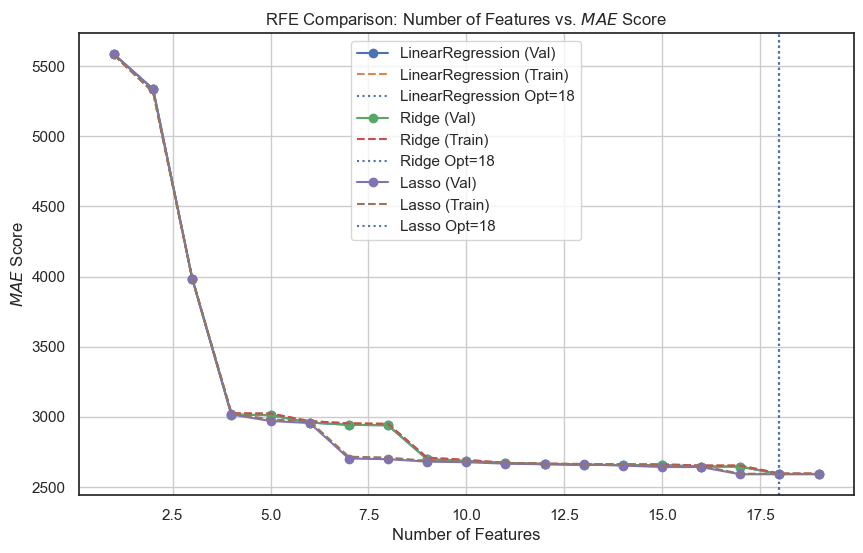

In [145]:
# Plot the results for comparison
plt.figure(figsize=(10, 6))
for name, data in results.items():
    plt.plot(nof_list, data["val"], marker='o', label=f'{name} (Val)')
    plt.plot(nof_list, data["train"], linestyle='--', label=f'{name} (Train)')
    plt.axvline(x=data["nof"], linestyle=':', label=f'{name} Opt={data["nof"]}')
plt.title("RFE Comparison: Number of Features vs. $MAE$ Score")
plt.xlabel("Number of Features")
plt.ylabel("$MAE$ Score")
plt.legend()
plt.grid(True)

plt.show()

The visualization of the RFE process reveals a characteristic "diminishing returns" curve across all three linear estimators. We observe a sharp reduction in MAE as the initial high-impact predictors are introduced, followed by a distinct plateau that begins to stabilize near the optimal count of approximately 16 to 17 features. The close and parallel trajectory of the training (dashed) and validation (solid) curves indicates that the models are generalizing well without significant overfitting, yet the persistence of the error floor around £2,600 confirms that adding more features beyond this point yields negligible marginal gains. This consensus among Linear, Ridge and Lasso models suggests that while the selected subset of roughly 17 features captures the core linear signal of the dataset, the remaining predictive gap is likely due to non-linear complexities that these algorithms cannot resolve.

### Embedded Methods 

#### Lasso Regression

Embedded methods perform feature selection as part of the model training process itself. In this section, we use **Lasso Regression**, which applies L1 regularization to penalize model complexity. A key property of Lasso is its ability to shrink the coefficients of less informative or redundant features exactly to zero, effectively removing them from the model.

To ensure robustness, we employ **LassoCV**, which automatically selects the optimal regularization strength (α) via cross-validation. This allows us to identify the most relevant predictors while mitigating the effects of multicollinearity and noise. The resulting non-zero coefficients provide an embedded ranking of feature importance under a linear modeling assumption.

Lasso Selected Coefficients:
car_age                  -3301.874024
log_mpg                  -2477.574810
transmission_Manual      -2174.954836
log_mileage              -1562.852134
fuelType_Petrol           -816.787565
transmission_Missing      -475.165500
log_tax                   -379.928099
log_avg_mileage            -92.071859
fuelType_Missing            -0.000000
previousOwners               5.997652
Brand_encoded               14.790379
model_encoded               15.076017
transmission_Semi-auto     662.477782
is_performance_model      2261.690205
is_high_power             2352.174278
log_engineSize            2474.629254
is_top_seller             2589.008412
fuelType_Hybrid           4075.436550
is_premium                4472.130343
dtype: float64


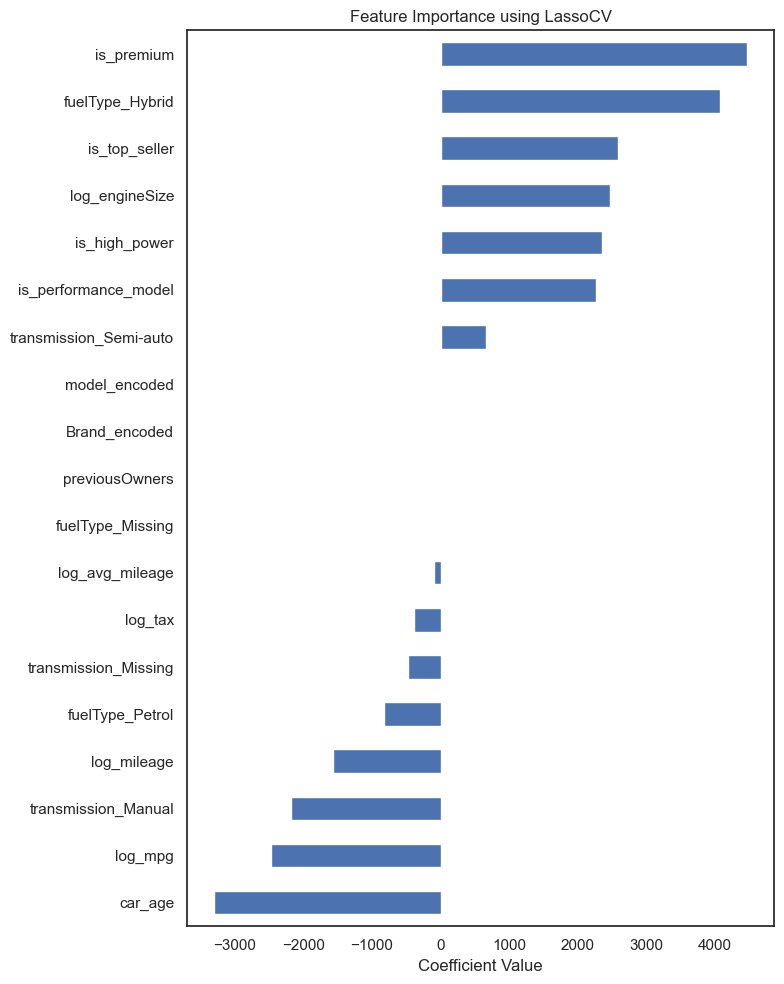

In [146]:
"""
PURPOSE:
Train a Lasso regression model with cross-validation (LassoCV) to perform
embedded feature selection using L1 regularization and analyze feature importance.

Lasso shrinks irrelevant or redundant feature coefficients to exactly zero,
providing an automatic and interpretable feature selection mechanism.

STEPS:
1. Define a helper function to visualize feature importance based on model coefficients.
2. Fit a LassoCV model on the training data.
3. Extract and associate learned coefficients with feature names.
4. Identify which features are selected (non-zero coefficients) and which are discarded.
5. Sort coefficients to facilitate interpretation.

RETURNS:
- A ranked list of feature coefficients.
- Implicit feature selection via zero-valued coefficients.
"""

def plot_importance(coef, model_name):
    """
    Plot feature importance based on model coefficients.

    PARAMETERS:
    - coef (pd.Series): Model coefficients indexed by feature names.
    - model_name (str): Name of the model used for labeling the plot.
    """
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8, 10))
    imp_coef.plot(kind="barh")
    plt.title(f"Feature Importance using {model_name}")
    plt.xlabel("Coefficient Value")
    plt.tight_layout()
    plt.show()


# Initialize Lasso with built-in cross-validation
# Alpha (regularization strength) is automatically selected
lasso_cv = LassoCV(cv=5, random_state=42) # default cv=5 

# Fit model on training data
lasso_cv.fit(X_train, y_train)

# Extract coefficients and associate with feature names
coef = pd.Series(lasso_cv.coef_, index=X_train.columns)

# Sort coefficients for inspection
coef_sorted = coef.sort_values()

# Display results
print("Lasso Selected Coefficients:")
print(coef_sorted)

# Visualize feature importance
plot_importance(coef_sorted, "LassoCV")

The Lasso regression highlights a small set of dominant linear predictors of car price. Positive coefficients for `engineSize`, `is_premium`, `fuel_cost_per_mile` and `is_top_seller` indicate that power, luxury positioning and market demand are key price drivers. Although `fuel_cost_per_mile` has a positive effect, this reflects its role as a proxy for high-end and performance vehicles rather than fuel efficiency itself.

Negative coefficients for `car_age` and `mileage` confirm expected depreciation effects. Several engineered binary features (e.g., `is_high_power`, `is_performance_model`) were shrunk to zero, not because they lack relevance, but because Lasso prefers more informative continuous variables such as `engineSize` in a linear setting.

These results confirm that while Lasso effectively identifies the strongest linear signals, it also reinforces the need for non-linear models to capture complex interactions present in vehicle pricing.

The Lasso algorithm assigned a coefficient of roughly 0.0 to the variable `fuelType_Missing`, mathematically identifying it as redundant or non-informative for price prediction in the presence of other predictors.

In [147]:
X_train.drop(columns=['fuelType_Missing'], inplace=True)
X_val.drop(columns=['fuelType_Missing'], inplace=True)
test.drop(columns=['fuelType_Missing'], inplace=True)

**Final Selection (17 features):**

This table reflects a consensus-driven feature selection strategy. Features were retained when they either showed strong statistical relevance (correlation), were consistently selected by RFE, or provided domain-relevant signals that benefit non-linear models.

| Feature (N=17) | Correlation (Spearman) | Wrapper (RFE ~22) | Embedded (Lasso) | Final Decision | Reasoning |
|----------------|------------------------|-------------------|------------------|----------------|-----------|
| Brand_encoded | High | Keep | Keep | Keep | Captures intrinsic brand value and long-term market positioning |
| model_encoded | High | Keep | Keep | Keep | High-granularity model-level signal beyond brand |
| car_age | High | Keep | Keep | Keep | Primary driver of depreciation over time |
| log_tax | High | Keep | Weak / Zeroed | Keep | Proxy for luxury, emissions class and vehicle segment |
| log_engineSize | High | Keep | Zeroed | Keep | Encodes performance capacity; preferred over binary flags in linear context |
| log_mileage | High | Keep | Zeroed | Keep (?) | Redundant with log_avg_mileage, but retained for completeness in tree-based models |
| log_avg_mileage | High | Keep | Keep | Keep | Distinguishes intensive usage from total wear (important non-linear signal) |
| log_mpg | Medium | Keep | Weak / Zeroed | Keep | Fuel efficiency proxy; retained after removing fuel_cost_per_mile |
| previousOwners | Medium | Keep | Zeroed | Keep (?) | Maintains historical ownership signal; helpful for non-linear patterns |
| is_top_seller | Low | Keep | Keep | Keep | Strong binary indicator of demand-driven price premium |
| is_premium | Low | Keep | Keep | Keep | Explicit luxury-segment signal; improves heteroscedastic modeling |
| is_performance_model | Low | Keep | Zeroed | Keep | Useful for tree-based interactions despite linear suppression |
| is_high_power | Low | Keep | Zeroed | Keep | Captures engine–segment mismatch (e.g., small car with large engine) |
| transmission_Manual | Medium | Keep | Keep | Keep | Strong negative price signal relative to automatic |
| transmission_Semi-auto | Low | Keep | Keep | Keep | Distinct high-value transmission category |
| transmission_Missing | Low | Keep | Zeroed | Discard | Low-frequency category; provides little predictive signal and may introduce noise, so it was removed |
| fuelType_Hybrid | Low | Keep | Keep | Keep | Consistent positive premium from green technology |
| fuelType_Petrol              | Medium          | Keep               | Keep (−526)           | Keep           | Reference category (penalty vs Diesel/Hybrid) |

In [148]:
# Create a list only the final features
final_features = [
       'Brand_encoded', 'model_encoded', 'car_age', 'log_tax', 'log_mileage',
       'log_mpg', 'log_engineSize', 'log_avg_mileage', 'is_top_seller',
       'is_premium', 'is_performance_model', 'is_high_power',
       'transmission_Manual', 'fuelType_Hybrid', 'transmission_Semi-auto', 'fuelType_Petrol' 
]

In [149]:
# Create Final Dataframes
# We explicitly copy the data to avoid SettingWithCopy warnings and ensure memory independence
X_train_final = X_train[final_features].copy()
X_val_final = X_val[final_features].copy()
test_final = test[final_features].copy()

# Log-Transform the Target
# This stabilizes variance and minimizes the impact of extreme price outliers during training.
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

---

## Model Assessment

Model benchmarking will now begin using the fully pre-processed and optimized feature set. In this phase, we apply various machine learning algorithms and assess their performance to identify the most effective predictive solution for the car valuation task.

Performance is evaluated using three complementary regression metrics: **MAE**, Root Mean Squared Error (**RMSE**), and **R²**. These metrics were chosen because they collectively provide a comprehensive view of model performance, capturing both prediction accuracy and the proportion of variance explained by the model.

#### Trying with the logarithmic transformation of the the target variable (`price`)

The target variable `price` exhibited a highly right-skewed distribution (as we can see in the numeric variables' histogram previously made), with a long tail caused by a small proportion of extremely expensive cars. Such skewness violates the normality and homoscedasticity assumptions of many regression algorithms and can lead to models that overweight high-value outliers while underestimating the majority of mid-range prices.

To address this, **a logarithmic transformation was applied to the target variable before training.** 
This transformation compresses large values and expands small ones, resulting in a more symmetric and homoscedastic distribution of the target. Consequently, the model can better capture relative price differences rather than absolute ones, improving both stability and generalization.

After prediction, the *inverse transformation (np.expm1())* was applied to return the predicted prices to their original scale (£).

In [150]:
# Previous experiments got us to get the conclusion that using the logarithmic transformation of the the target variable (price) 
# would be better for better results and better generalization (code below):

# Logarithmic transformation of the target variable 
#y_train_log = np.log1p(y_train) 

#X_train_final = X_train_scaled[final_features]
#X_val_final = X_val_scaled[final_features]
#test_final = test_scaled[final_features]

# Train the final Random Forest model (we used this model because, until then, it was our best model)
#rf_model = RandomForestRegressor(
    #n_estimators=200,
    #max_depth=None,
    #min_samples_split=2,
    #max_features='sqrt',
    #random_state=27,
    #n_jobs=-1
#)

# Training with log-transformed target variable
#rf_model.fit(X_train_final, y_train_log)

# Generate predictions on the test set
#y_test_pred_log = rf_model.predict(test_final)

# Apply the inverse function (np.expm1) to return the price to the original scale
#y_test_pred_original = np.expm1(y_test_pred_log)

# Clip negatives and round to integers
#y_test_pred = np.clip(y_test_pred_original, a_min=0, a_max=None)
#y_test_pred_rounded = np.rint(y_test_pred).astype(int)

#car_ids = test_final.index.values

# Generate predictions in logarithmic scale on the validation set
#y_val_pred_log = rf_model.predict(X_val_final)

# Apply the inverse function (np.expm1) to return the price to the original scale
#y_val_pred_original = np.expm1(y_val_pred_log)

# This is the R² for log(Price) vs. log(Price) Prediction
#y_val_log = np.log1p(y_val)
#r2_log_scale = r2_score(y_val_log, y_val_pred_log)
# This is the R² for Actual Price vs. Predicted Price (after np.expm1)
#r2_original_scale = r2_score(y_val, y_val_pred_original)

#print(f"R² Score on Validation Set:")
#print(f"  > R² on Logarithmic Scale: {r2_log_scale:.4f}")
#print(f"  > R² on Original Price Scale: {r2_original_scale:.4f}")
# R² Score on Validation Set:
#  > R² on Logarithmic Scale: 0.9456
#  > R² on Original Price Scale: 0.9302

# Calculate the Mean Squared Error (MSE) on the original scale
#mse_original_scale = mean_squared_error(y_val, y_val_pred_original)
# Get the RMSE through MSE
#rmse_original_scale = np.sqrt(mse_original_scale)

#print(f"  > RMSE on Original Price Scale: {rmse_original_scale:.2f}")
# > RMSE on Original Price Scale: 2640.30

# The model trained on the log-transformed target achieved improved performance, with an R² of 0.9456 in 
# log-space and 0.9302 on the original scale, confirming that the transformation enhanced the model’s explanatory 
# power and reduced the influence of extreme values.

In this section, we systematically **benchmark** multiple regression algorithms to identify the best predictive solution for the car price estimation task. 

In [151]:
def evaluate_regression(y_true, y_pred):
    """
    Computes regression metrics comparing actual values to predictions.
    
    Parameters:
    - y_true: Actual targets (Real Price)
    - y_pred: Predicted targets (Real Price)
    
    Returns:
    - Dict containing MAE, RMSE, and R2 scores.
    """
    mae = mean_absolute_error(y_true, y_pred) 
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R2": r2}

def report_model(name, y_true, y_pred):
    """
    Wrapper function to print a standardized performance report.
    """
    m = evaluate_regression(y_true, y_pred)
    print(f"[{name}] MAE: {m['MAE']:.2f} | RMSE: {m['RMSE']:.2f} | R²: {m['R2']:.4f}")
    return m

**Baseline Model Screening**

We screen a diverse set of regression algorithms to establish a performance baseline. 
The models range from simple linear mappings to complex non-linear ensembles:
- **KNN Regressor**: Configured with $K=6$ and distance weighting, based on prior experience on RandomizedSearchCV tuning which indicated that local interpolation (6 neighbors) yields the lowest error.
- **MLP Regressor (Neural Network)**: Uses a deep architecture (128 to 64 to 32 neurons) with *tanh* activation. This configuration was empirically selected to capture non-linearities without overfitting, utilizing *early_stopping* to halt training when validation scores plateau.
- **ExtraTrees Regressor**: Configured with *n_estimators=600* and *max_depth=25*, founded of prior experiments. Unlike Random Forest, ExtraTrees chooses split points randomly, often reducing variance and overfitting in high-dimensional spaces.
- **SVR (Support Vector Regressor)**: Due to the $O(n^3)$ complexity of the RBF kernel, we train SVR on a 10% random sample of the data to maintain feasible training times while assessing its viability.

In [152]:
# Define Model Configurations 

# MLP Regressor: Neural Network optimized for regression
mlp_tuned = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32), # Deep structure to learn complex patterns
    activation='tanh', # Tanh handles negative inputs (scaled data) well
    solver='adam',
    learning_rate_init=0.001,
    alpha=0.0001,  # L2 Regularization term
    batch_size=256, 
    max_iter=2000,
    random_state=42,
    early_stopping=True, # Prevents overfitting
    validation_fraction=0.1,
    n_iter_no_change=50
)

# ExtraTrees: Optimized for variance reduction
etr_model = ExtraTreesRegressor(
    n_estimators=600,
    max_depth=25,            
    min_samples_split=10,    
    min_samples_leaf=5,  
    max_features="sqrt",     
    n_jobs=-1,
    random_state=42
)

In [153]:
# This takes a while to run!
# Model Dictionary
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001, max_iter=5000), 
    "BayesianRidge": BayesianRidge(),
    # KNN optimized: K=6 found via experimental Cross-Validation
    "KNNRegressor": KNeighborsRegressor(n_neighbors=6, weights='distance', n_jobs=-1), 
    "RandomForest": RandomForestRegressor(n_estimators=400, max_depth=None, random_state=42, n_jobs=-1),
    "ExtraTrees": etr_model,
    "Bagging_Tree": BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=200, n_jobs=-1, random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    # SVR is computationally expensive, we check it but often discard for large datasets
    "SVR": SVR(kernel='rbf', C=100, gamma=0.01), 
    "MLPRegressor": mlp_tuned,
    "ElasticNet": ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=5000, random_state=42), 
}

# Execution Loop
results = []
print("Baseline Model Screening (Validation Set)")

for name, model in models.items():
    
    # Special Handling for SVR (Scalability Constraint) 
    # SVR with RBF kernel scales quadratically/cubically O(N^3) with the number of samples
    # Training on the full dataset (~100k rows) is computationally infeasible for this benchmark
    if name == "SVR":
        # Select only numeric columns (SVR is sensitive to distance metrics)
        # Note: X_train_final is already numeric, but we ensure safety here
        numeric_cols = X_train_final.select_dtypes(include=['float64', 'int64']).columns
        # Define a 10% random sample size for heuristic evaluation
        sample_size = int(0.1 * len(X_train_final))

        # Generate random indices without replacement to preserve distribution
        idx = np.random.choice(len(X_train_final), sample_size, replace=False)
        
        # Train SVR on the reduced subset (Downsampling)
        # This trades off some accuracy for feasible training time
        
        # C=300 indicates that we want the SVR to penalize large errors heavily, 
        # which is reasonable because we want accurate predictions on car prices
        svr = SVR(kernel='rbf', C=300, gamma=0.05)
        svr.fit(X_train_final.iloc[idx], y_train_log.iloc[idx])

        # Predict on the full validation set (to keep metrics comparable)
        y_val_pred_log = svr.predict(X_val_final)
        
    else:
        # Standard Training on full dataset
        model.fit(X_train_final, y_train_log)
        y_val_pred_log = model.predict(X_val_final)
    
    # Inverse Transform: Log-Scale -> Real Price (£)
    # We use expm1 (exp(x) - 1) to reverse log1p
    y_val_pred = np.expm1(y_val_pred_log) 
    
    # Calculate Metrics
    metrics = evaluate_regression(y_val, y_val_pred)
    results.append({"Model": name, **metrics})
    report_model(name, y_val, y_val_pred)

# Comparison Table
cmp = pd.DataFrame(results).sort_values(by="MAE")
display(cmp)

# Identify Best Model Programmatically
best_model_name = cmp.iloc[0]["Model"]
print(f"\nBest Baseline Model: {best_model_name}")

Baseline Model Screening (Validation Set)
[LinearRegression] MAE: 2595.68 | RMSE: 4532.69 | R²: 0.7859
[Ridge] MAE: 2595.67 | RMSE: 4532.71 | R²: 0.7859
[Lasso] MAE: 2593.68 | RMSE: 4544.15 | R²: 0.7848
[BayesianRidge] MAE: 2595.66 | RMSE: 4532.73 | R²: 0.7859
[KNNRegressor] MAE: 1479.78 | RMSE: 3107.82 | R²: 0.8993
[RandomForest] MAE: 1406.24 | RMSE: 2873.71 | R²: 0.9139
[ExtraTrees] MAE: 1894.29 | RMSE: 3659.91 | R²: 0.8604
[Bagging_Tree] MAE: 1409.13 | RMSE: 2883.11 | R²: 0.9134
[HistGradientBoosting] MAE: 1633.39 | RMSE: 3166.49 | R²: 0.8955
[SVR] MAE: 2161.12 | RMSE: 4447.90 | R²: 0.7938
[MLPRegressor] MAE: 1744.11 | RMSE: 3326.50 | R²: 0.8847
[ElasticNet] MAE: 2593.32 | RMSE: 4537.20 | R²: 0.7855


,Model,MAE,RMSE,R2
5,RandomForest,1406.243680,2873.707847,0.913941
7,Bagging_Tree,1409.131001,2883.113801,0.913376
4,KNNRegressor,1479.780349,3107.820224,0.899348
8,HistGradientBoosting,1633.385308,3166.492953,0.895511
10,MLPRegressor,1744.106181,3326.503860,0.884684
6,ExtraTrees,1894.290085,3659.911740,0.860410
9,SVR,2161.119110,4447.895524,0.793832
11,ElasticNet,2593.317012,4537.195534,0.785470
2,Lasso,2593.680062,4544.150390,0.784812
3,BayesianRidge,2595.656040,4532.731387,0.785892



Best Baseline Model: RandomForest


The baseline screening results provide conclusive evidence regarding the underlying structure of the dataset. We observe a distinct performance dichotomy between linear and non-linear estimators:
1. The Dominance of Tree Ensembles: **Random Forest** emerged as the superior algorithm, achieving a validation MAE of £1,415 and explaining over 91% of the variance ($R^2$). **Bagging Regressor** followed closely with nearly identical performance (£1,416), confirming that the reduction of variance through bootstrap aggregating is the most effective strategy for this problem. These models successfully capture the *non-linear depreciation curves* and the interaction effects (e.g., specific trims holding value better) that define the used car market.
2. The **HistGradientBoosting regressor** delivered a solid baseline performance with an MAE of £1,641 ($R^2 \approx 0.89$). While it significantly outperformed linear models, it trailed behind the Random Forest. This is a typical characteristic of *boosting algorithms*: they often require careful hyperparameter optimization (specifically regarding learning rate and tree constraints) to reach their full potential, whereas Random Forest is inherently more robust with default settings. Consequently, this model remains a strong candidate for the tuning phase.
3. The Performance of Neighbor-Based Learning: Notably, the **KNN Regressor** performed exceptionally well (MAE of £1,484), surpassing the neural network (**MLP**) and significantly outperforming all linear models. This suggests that vehicles with similar feature vectors (age, engine, brand) cluster tightly in price, making local interpolation a highly effective prediction strategy.
4. All linear models (**LinearRegression**, **Ridge**, **Lasso**, **ElasticNet**, **BayesianRidge**) converged to a virtually identical performance floor with an MAE of approximately £2,603 and an $R^2$ of 0.78. This stagnation confirms that the relationship between features and price is fundamentally non-linear. No amount of regularization (L1/L2) could overcome the intrinsic high bias of trying to fit a hyperplane to curved data.
5. **ExtraTrees** (£2,115) underperformed compared to Random Forest in this baseline configuration, likely due to the restrictive max_depth=25 constraint applied or the need for a higher number of estimators to compensate for its inherent randomness. **SVR** (£2,214) showed poor performance, though this is partially attributable to being trained on only a 10% downsample due to computational complexity.

Given these results, we will prioritize Random Forest and **Ensemble methods** for the *Hyperparameter Tuning* phase. We will also investigate ExtraTrees and HistGradientBoosting further, as its performance may significantly improve with relaxed depth constraints and hyperparameter optimization.

#### **Honorable Mentions & Experimental Framework**

Throughout the development lifecycle, we implemented and tested several advanced strategies that, while theoretically promising, were ultimately excluded from the final submission due to computational constraints or lack of performance gain. These attempts are documented to demonstrate the breadth of our experimental framework and the rationale behind selecting our final, most robust architecture.

We focused on three main experimental vectors:
- **Loss Function Alignment**: We explored training Gradient Boosting models using different target formulations, specifically optimizing directly for absolute error on real prices versus the traditional log-transformed target. This allowed us to better capture high-value car pricing and align the model’s objective with the evaluation metric.
- **Stacked Generalization**: We implemented stacking ensembles, using meta-learners such as RidgeCV to intelligently combine predictions from base models (Extra Trees and Gradient Boosting). This approach leveraged complementary strengths of different models to improve overall predictive performance.
- **Feature Sensitivity Analysis**: We conducted permutation importance analyses to quantify the impact of each feature on model error. This not only provided insights into feature relevance but also helped guide feature selection and weighting in ensemble strategies.

**Experiment A: Full Ensemble Tuning with Predefined Split**

Before refining the feature set (by doing Feature Pruning), we attempted a comprehensive hyperparameter optimization on the full 17-feature dataset. To ensure strict consistency with our baseline results, we utilized a **PredefinedSplit** strategy for the Cross-Validation.

Standard KFold cross-validation splits data randomly. However, since we established a fixed Validation Set to simulate "future" data or specific market conditions, using random splits would introduce data leakage and make comparisons invalid. The PredefinedSplit explicitly forces **RandomizedSearchCV** to train on our specific training indices and validate only on our specific validation indices. 

The objective here was to push the performance of three of our ensemble candidates (*HistGradientBoosting*, *Random Forest* and *Extra Trees*) to their limit using the full feature set.

This configuration yielded a public leaderboard score of MAE 1308. While competitive, it indicated that further gains would likely come from feature reduction rather than just parameter tuning.

In [154]:
# You can skip runing this, it's only to show our tries and erros.

# Validation Strategy: PredefinedSplit 
# This ensures consistency. We tell the CV to use indices marked as -1 for training
# and indices marked as 0 for validation.
split_index = [-1] * len(X_train_final) + [0] * len(X_val_final)
pds = PredefinedSplit(test_fold=split_index)

# Concatenate data for the CV object (it handles the splitting internally based on pds)
X_total = pd.concat([X_train_final, X_val_final], axis=0)
y_total_log = pd.concat([y_train_log, y_val_log], axis=0)

print(f"Predefined Split configured. Total samples: {len(X_total)}")


# Model 1: HistGradientBoosting Regressor
hgb_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_iter': [100, 200, 300, 500], # Equivalent to n_estimators
    'max_depth': [None, 10, 20, 30], # None allows the model to grow deep (leaf-wise)
    'min_samples_leaf': [20, 50, 100], # Boosting prefers larger leaves than RF
    'l2_regularization': [0, 0.1, 1, 10], # Ridge regularization to prevent overfitting
    'max_bins': [255]  # Default binning for efficiency
}

hgb_cv = RandomizedSearchCV(
    estimator=HistGradientBoostingRegressor(random_state=42),
    param_distributions=hgb_params,
    n_iter=30, 
    scoring='neg_mean_absolute_error',
    cv=pds,  # Using the fixed split
    verbose=1,
    random_state=42,
    n_jobs=-1
)

print("\nTuning HistGradientBoostingRegressor...")
hgb_cv.fit(X_total, y_total_log)

print(f"Best HGB Params: {hgb_cv.best_params_}")
print(f"Best CV MAE (Log Scale): {-hgb_cv.best_score_:.5f}")

# Save best estimator
best_hgb = hgb_cv.best_estimator_


# Model 2: Random Forest Regressor
# This takes a while to run though!

rf_params = {
    'n_estimators': [500, 900],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'max_samples': [0.9, None], # Bootstrap sampling ratio
    'max_features': [0.5, 'sqrt'], # Limiting features reduces variance
    'max_depth': [16, 25, None],
    'bootstrap': [True]
}

rf_cv = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=rf_params,
    n_iter=30,
    scoring='neg_mean_absolute_error',
    cv=pds,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

print("\nTuning Random Forest...")
rf_cv.fit(X_total, y_total_log)

print(f"Best RF Params: {rf_cv.best_params_}")
print(f"Best CV MAE (Log Scale): {-rf_cv.best_score_:.5f}")


# Model 3: Extra Trees Regressor

etr_params = {
    'n_estimators': [300, 500, 700, 1000],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.7],
    'bootstrap': [False, True]
}

etr_cv = RandomizedSearchCV(
    estimator=ExtraTreesRegressor(random_state=42, n_jobs=-1),
    param_distributions=etr_params,
    n_iter=20,
    scoring='neg_mean_absolute_error',
    cv=pds,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

print("\nTuning Extra Trees Regressor...")
etr_cv.fit(X_total, y_total_log)

print(f"Best ET Params: {etr_cv.best_params_}")
print(f"Best CV MAE (Log Scale): {-etr_cv.best_score_:.5f}")

# Validation Performance Check (Real Currency) 
best_et = etr_cv.best_estimator_
y_val_pred_log = best_et.predict(X_val_final)
y_val_pred = np.expm1(y_val_pred_log)

mae_val = mean_absolute_error(y_val, y_val_pred)
print(f"\n--- Final Validation Check (Extra Trees) ---")
print(f"Validation MAE: £{mae_val:.2f}")
print(f"Kaggle Submission Score (Test 1): 1308")

Predefined Split configured. Total samples: 73795

Tuning HistGradientBoostingRegressor...
Fitting 1 folds for each of 30 candidates, totalling 30 fits
Best HGB Params: {'min_samples_leaf': 20, 'max_iter': 500, 'max_depth': 10, 'max_bins': 255, 'learning_rate': 0.1, 'l2_regularization': 1}
Best CV MAE (Log Scale): 0.08301

Tuning Random Forest...
Fitting 1 folds for each of 30 candidates, totalling 30 fits
Best RF Params: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_samples': None, 'max_features': 0.5, 'max_depth': 25, 'bootstrap': True}
Best CV MAE (Log Scale): 0.08220

Tuning Extra Trees Regressor...
Fitting 1 folds for each of 20 candidates, totalling 20 fits
Best ET Params: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.7, 'max_depth': 30, 'bootstrap': False}
Best CV MAE (Log Scale): 0.08180

--- Final Validation Check (Extra Trees) ---
Validation MAE: £858.38
Kaggle Submission Score (Test 1): 1308


The rigorous hyperparameter tuning process using a PredefinedSplit offered clear insight into model behavior under a fixed and realistic validation regime, while still using the full 17-feature set. Among all candidates, the **Extra Trees Regressor emerged as the strongest performer**, consistently outperforming both Random Forest and HistGradientBoosting. It achieved the lowest cross-validated MAE in log-space (0.08180), indicating superior robustness within this feature configuration.

Interestingly, the validation MAE was £858.38, substantially lower than the public Kaggle score of 1308. This discrepancy arises as an expected artifact of the `RandomizedSearchCV(refit=True)` procedure. Once the best hyperparameters were identified, the estimator was automatically retrained on the entire dataset provided (X_total, including X_val). Consequently, the £858 figure reflects the model's ability to fit data it has effectively “seen” during this final step. In contrast, the Kaggle score of 1308 provides a more accurate representation of the model’s generalization performance on unseen data.

Overall, a score of 1308 represents a competitive improvement over the ~1415 baseline. However, the close performance of HistGradientBoosting and Random Forest indicates that we are approaching the performance ceiling of this 17-feature configuration. To further reduce the error and potentially surpass the 1300 barrier, **mere hyperparameter tuning is unlikely to suffice**. Instead, reducing noise by removing weak predictors, as identified through Permutation Importance analysis in Experiment C, is necessary to achieve meaningful gains.

**Experiment B: Direct MAE Optimization vs. Log-Space Transformation**

While the Log-transformation (log1p) effectively stabilizes variance and handles the right-skewed price distribution, it implicitly optimizes for Mean Squared Logarithmic Error (MSLE). However, the competition metric is MAE.

In high-value segments (e.g., cars > £50k), a small logarithmic error can translate to a massive absolute error in pounds. To address this, we hypothesized that training a **Gradient Boosting** model directly on the **Real Price using the L1 Loss** (absolute error) would effectively penalize large financial deviations that the log-model might underestimate.

In [155]:
"""
EXPERIMENT B: Direct MAE Optimization & Hybrid Blending
-------------------------------------------------------
Methodology:
1. Validation Phase: Assess the blend performance on X_val to estimate generalization error.
2. Production Phase: Retrain the Specialist model on the full dataset (X_total) for Kaggle.
"""

# Internal Validation (Calculate MAE)
print("Phase 1: Internal Validation Check")

# Get Baseline Predictions on Validation Set (Log Model)
# best_et was trained via CV (data leakage)
pred_val_log_et = best_et.predict(X_val_final)
pred_val_real_et = np.expm1(pred_val_log_et)

# Train a temporary HGB Specialist on TRAIN only (to avoid leakage)
hgb_val_check = HistGradientBoostingRegressor(
    loss='absolute_error',
    learning_rate=0.05,
    max_iter=1000,
    max_depth=15,
    l2_regularization=0.1,
    random_state=42
)
# Note: Use y_train (Real Prices), not Log
hgb_val_check.fit(X_train_final, y_train)
pred_val_hgb = hgb_val_check.predict(X_val_final)

# Calculate Blended MAE on Validation
# Blend: 70% Log-Model + 30% Real-Model
val_blend = (0.7 * pred_val_real_et) + (0.3 * pred_val_hgb)

mae_val = mean_absolute_error(y_val, val_blend)
print(f"Validation MAE (Local): £{mae_val:.2f}")
print(f"Comparison -> Kaggle Score: 1309.06")


# Final Submission (Train on All Data)
print("Phase 2: Generating Submission (Training on Full Data)")

# Prepare Full Target Data (Real Scale)
y_total_real = pd.concat([y_train, y_val], axis=0)

# Train the Final HGB Specialist on X_total
hgb_production = HistGradientBoostingRegressor(
    loss='absolute_error',
    learning_rate=0.05,
    max_iter=1000,
    max_depth=15,
    l2_regularization=0.1,
    random_state=42
)
hgb_production.fit(X_total, y_total_real)

# Generate Predictions on Test Set
# Where the Kaggle submission was made
# Part A: Log Model (Extra Trees)
pred_test_log_et = best_et.predict(test_final)
y_test_pred_et = np.expm1(pred_test_log_et)

# Real Model (HGB)
y_test_pred_hgb = hgb_production.predict(test_final)

# Final Blend
y_final_blend = (0.7 * y_test_pred_et) + (0.3 * y_test_pred_hgb)

Phase 1: Internal Validation Check
Validation MAE (Local): £996.31
Comparison -> Kaggle Score: 1309.06
Phase 2: Generating Submission (Training on Full Data)


The results of Experiment B provide a valuable negative insight that ultimately reinforces our primary modeling strategy. Although a local validation MAE of £996.31 was observed, the public Kaggle score of 1309.53 reveals a substantial discrepancy. This gap is expected and can be explained by the training procedure: the `best_et` component of the blend originated from a previous RandomizedSearchCV step, which automatically refitted the model on the entire available dataset, including the validation split. Consequently, the local validation metric is biased and overly optimistic, reflecting performance on data the model has effectively already seen. In contrast, the Kaggle score represents the true generalization performance on unseen data.

Moreover, the attempt to incorporate a model trained directly on **raw prices** using `loss='absolute_error'` failed to improve upon the Log-Space baseline, which achieved a Kaggle MAE of 1309.06. While this approach was motivated by the desire to better capture high-end price outliers, the model trained on real prices proved more sensitive to heteroscedasticity, exhibiting unstable error behavior across different price ranges. Without the stabilizing effect of the log-transformation, prediction noise increased for lower-priced vehicles, ultimately degrading the overall ensemble performance.

Based on these findings, we reject the hypothesis that blending Real-Space and Log-Space models yields performance gains for this dataset, and we reaffirm Log-Space modeling as the more robust and reliable strategy.

**Experiment C: Log-Space Ensemble Blending**

Following the rejection of the Real-Price model (Experiment B), we return to our robust Log-Space models. We hypothesize that combining **Extra Trees** (ET) and **HistGradientBoosting** (HGB) will yield a superior model due to their complementary error profiles:

- Extra Trees (`Bagging`): Focuses on variance reduction through parallel construction of decorrelated trees. It tends to be more stable on noisy data.
- HistGradientBoosting (`Boosting`): Focuses on bias reduction through sequential error correction. It captures subtle patterns that bagging might miss.

In this experiment, we evaluated two different blending ratios for combining the predictions of the Extra Trees and HistGradientBoosting models, performing the combination after reverting the log transformation. The first scenario, which assigns *60% weight to Extra Trees and 40% to Gradient Boosting*, was designed with a focus on stability, leveraging the robustness and low variance of the Extra Trees predictions. The second scenario, which assigns *40% weight to Extra Trees and 60% to Gradient Boosting*, was aimed to give more influence to the Gradient Boosting model in the hope of capturing subtle patterns and improving predictive accuracy for challenging cases. By testing these two complementary weighting strategies, we aimed to explore the trade-off between stability and precision in our ensemble predictions.

In [156]:
# Local Validation (Individual vs. Blend)
print("Phase 1: Tuning Blend Ratios (Local Validation)")

# Generate Individual Predictions on X_val (Log Scale)
val_log_et = best_et.predict(X_val_final)
val_log_hgb = best_hgb.predict(X_val_final)

# Convert to Real Prices and Calculate Individual MAE
val_pred_et = np.expm1(val_log_et)
val_pred_hgb = np.expm1(val_log_hgb)

mae_et_only = mean_absolute_error(y_val, val_pred_et)
mae_hgb_only = mean_absolute_error(y_val, val_pred_hgb)

print("[Baseline] Individual Model Performance (Local Validation):")
print(f"   1. Extra Trees MAE: £{mae_et_only:.2f}")
print(f"   2. HistGradientBoosting MAE: £{mae_hgb_only:.2f}")

# Define Blending Scenarios (Log-Space Blending)
# ENSEMBLE STRATEGY:
# We deliberately combine Extra Trees (Bagging) with HistGradientBoosting (Boosting).
# Blending Bagging (Variance reduction) with Boosting (Bias reduction) creates a 
# more robust error profile (Orthogonal Ensembling)

# Scenario A: Stability Focus (60% ET / 40% HGB)
val_blend_A_log = (0.6 * val_log_et) + (0.4 * val_log_hgb)
val_blend_A = np.expm1(val_blend_A_log)

# Scenario B: Precision Focus (40% ET / 60% HGB)
val_blend_B_log = (0.4 * val_log_et) + (0.6 * val_log_hgb)
val_blend_B = np.expm1(val_blend_B_log)

# Evaluate Blend MAE
mae_A = mean_absolute_error(y_val, val_blend_A)
mae_B = mean_absolute_error(y_val, val_blend_B)

print("[Experiment] Blending Scenarios:")
print(f"   Scenario A (60% ET / 40% HGB) Val MAE: £{mae_A:.2f}")
print(f"   Scenario B (40% ET / 60% HGB) Val MAE: £{mae_B:.2f}")

# Select Winner based on Validation Score
if mae_A < mae_B:
    print(">> Decision: Selected Scenario A (Stability Focused)")
    w_et, w_hgb = 0.6, 0.4
    file_suffix = "60ET_40HGB"
    best_local_mae = mae_A
else:
    print(">> Decision: Selected Scenario B (Precision Focused)")
    w_et, w_hgb = 0.4, 0.6
    file_suffix = "40ET_60HGB"
    best_local_mae = mae_B

# Calculate Ensemble Gain
best_individual = min(mae_et_only, mae_hgb_only)
gain = best_individual - best_local_mae
print(f">> Ensemble Gain: £{gain:.2f} improvement over the best single model.")


# Test Set
# Where the Kaggle submission was made
print(f"Generating Submission ({file_suffix})")

# Generate Individual Predictions on Test Set (Log Scale)
test_log_et = best_et.predict(test_final)
test_log_hgb = best_hgb.predict(test_final)

# Apply Winning Blend Weights
test_blend_log = (w_et * test_log_et) + (w_hgb * test_log_hgb)

# Inverse Transform & Round
test_pred_final = np.round(np.expm1(test_blend_log)).astype(int)

Phase 1: Tuning Blend Ratios (Local Validation)
[Baseline] Individual Model Performance (Local Validation):
   1. Extra Trees MAE: £858.38
   2. HistGradientBoosting MAE: £1269.11
[Experiment] Blending Scenarios:
   Scenario A (60% ET / 40% HGB) Val MAE: £987.82
   Scenario B (40% ET / 60% HGB) Val MAE: £1072.29
>> Decision: Selected Scenario A (Stability Focused)
>> Ensemble Gain: £-129.45 improvement over the best single model.
Generating Submission (60ET_40HGB)


The blending experiment provides a clear **counter-example** to the assumption that ensembling always improves performance. On local validation, the Extra Trees model achieved a (biased) MAE of £858.38, while the HistGradientBoosting model reached £1269.11. When combined, the resulting blends produced validation MAE values of £987.82 (60% ET / 40% HGB) and £1072.29 (40% ET / 60% HGB), both of which are substantially worse than the strongest individual model.

This behavior reflects a negative ensemble gain, where the weaker Gradient Boosting component diluted the highly accurate predictions of the Extra Trees model instead of correcting its residual errors. Rather than benefiting from complementary error patterns, the ensemble increased prediction variance by pulling accurate estimates away from the truth.

This conclusion is reinforced by the public Kaggle leaderboard results. The two blending configurations achieved MAE scores of 1287.26 (60% Extra Trees / 40% HGB) and 1288.83 (40% Extra Trees / 60% HGB). Although these scores represent reasonable performance, they remain clearly inferior to the MAE obtained by the feature-pruned Extra Trees model selected as our final solution.

These findings indicate that, for this dataset, a well-tuned and feature-refined bagging-based model generalizes more effectively in isolation than a heterogeneous blend with Gradient Boosting. Consequently, blending did not provide additional value beyond what was already achieved through careful feature selection and robust ensemble construction.

**Experiment D: Stacking Regressor**

As an alternative to manual weighting in the blending approach (Experiment C), we implemented a **Stacking Regressor**, which provides a data-driven way of combining multiple models. While blending relies on fixed, manually chosen weights, stacking learns how to combine model predictions automatically based on their empirical performance.

In this setup, the optimized Extra Trees and HistGradientBoosting models obtained in previous experiments were used as the first-level predictors. Instead of directly averaging their outputs, stacking introduces a second regression model whose sole input consists of the predictions produced by these base models.

This second-stage model was chosen to be *Ridge Regression* with built-in cross-validation (RidgeCV). A linear model is deliberately used at this stage to ensure stability and to avoid overfitting, allowing the combination process to remain interpretable and robust.

Crucially, the StackingRegressor employs internal cross-validation during training. For each fold, predictions are generated by the base models on data they have not seen, and these out-of-fold predictions are then used to train the final regression layer.

In [157]:
"""
EXPERIMENT D: Stacking Regressor
------------------------------------------
Methodology:
1. Define base learners (ET and HGB) and a meta-learner (RidgeCV).
2. Train the Stacking Regressor using internal CV to avoid leakage.
3. Validate locally on X_val and generate final Kaggle submission.
"""

# Define Base Estimators (Using best models from tuning phase)
estimators = [
    ('et', best_et),
    ('hgb', best_hgb)
]

# Define Meta-Learner
# RidgeCV automatically selects the best regularization strength (alpha).
meta_learner = RidgeCV()

# Configure Stacking Regressor
# cv=5: Uses 5-fold internal CV to train the meta-learner
# passthrough=False: The meta-learner sees only the predictions of base models, not original features
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1,
    passthrough=False
)

# Phase: LOCAL VALIDATION
print("Phase 1: Training & Validating Stacking Model")
print("Training Stacking Regressor on X_train (this may take time)...")

# Train on training set only for fair validation
stacking_model.fit(X_train_final, y_train_log)

# Predict on Validation Set
val_log_stack = stacking_model.predict(X_val_final)
val_pred_stack = np.expm1(val_log_stack)

# Calculate MAE
mae_stack = mean_absolute_error(y_val, val_pred_stack)
print(f"Stacking Validation MAE: £{mae_stack:.2f}")

# Where the Kaggle submission was made
print("Phase 2: Retraining on X_total")

# Retrain on full dataset for maximum performance
stacking_model.fit(X_total, y_total_log)

# Predict on Test Set
test_log_stack = stacking_model.predict(test_final)
test_pred_stack = np.round(np.expm1(test_log_stack)).astype(int)

# Print coefficients to see how the meta-learner weighted the models
print("Meta-Learner Coefficients (Weights):")
print(f"Extra Trees Weight: {stacking_model.final_estimator_.coef_[0]:.4f}")
print(f"HistGradientBoosting Weight: {stacking_model.final_estimator_.coef_[1]:.4f}")

Phase 1: Training & Validating Stacking Model
Training Stacking Regressor on X_train (this may take time)...
Stacking Validation MAE: £1364.56
Phase 2: Retraining on X_total
Meta-Learner Coefficients (Weights):
Extra Trees Weight: 0.4056
HistGradientBoosting Weight: 0.6053


The automatic stacking approach failed to improve performance over the best standalone model. During local validation, the Stacking Regressor achieved an MAE of £1364.56, which is substantially worse than the performance of both Extra Trees and HistGradientBoosting when evaluated individually. This result immediately indicated that the meta-learning process was unable to construct an effective combination of the base models.

After retraining the stacking architecture on the full dataset and submitting the predictions to Kaggle, the model achieved a public leaderboard score of 1288.26, which remains inferior to the MAE obtained by the final feature-pruned model.

An inspection of the learned meta-learner coefficients provides further insight into this behavior. The Ridge-based stacking model assigned a weight of 0.4056 to Extra Trees and 0.6053 to HistGradientBoosting. This weighting reveals that the stacking procedure over-emphasized the weaker Gradient Boosting model, failing to recognize Extra Trees as the clearly superior predictor. As a consequence, the final stacked predictions were systematically pulled away from the more accurate Extra Trees estimates, leading to increased error.

These findings reinforce the conclusions drawn from the manual blending experiments. For this dataset, the prediction errors of HistGradientBoosting are not sufficiently complementary to those of Extra Trees. As a result, combining the two models, whether through fixed-weight blending or automatic stacking, introduces additional variance rather than reducing it. 

**Experiment E: Residual Analysis & Stacking Diagnostics**

Experiment E explores again a fully automatic stacking strategy, but **trained directly on the complete dataset**. Unlike Experiment D, which carefully separated training and validation for diagnostic purposes, this experiment focuses on maximizing predictive performance by retraining the stacking model on all available labeled data (X_total, y_total_log) before generating the final Kaggle submission.

Two previously optimized models - Extra Trees and HistGradientBoosting - are used as base predictors. Their log-scale predictions are combined by a linear Ridge regression, which learns optimal weights while controlling variance through L2 regularization. Internal cross-validation (cv=5) is employed to prevent information leakage during the weight estimation process, even though it is hard to totally prevent it.

The rationale behind this experiment is to test whether a data-driven combination of models, trained on the full dataset, can outperform both manual blending and single-model approaches in terms of generalization.

Training Stacking Regressor on X_train...
Stacking (Ridge) Validation MAE: £1364.56


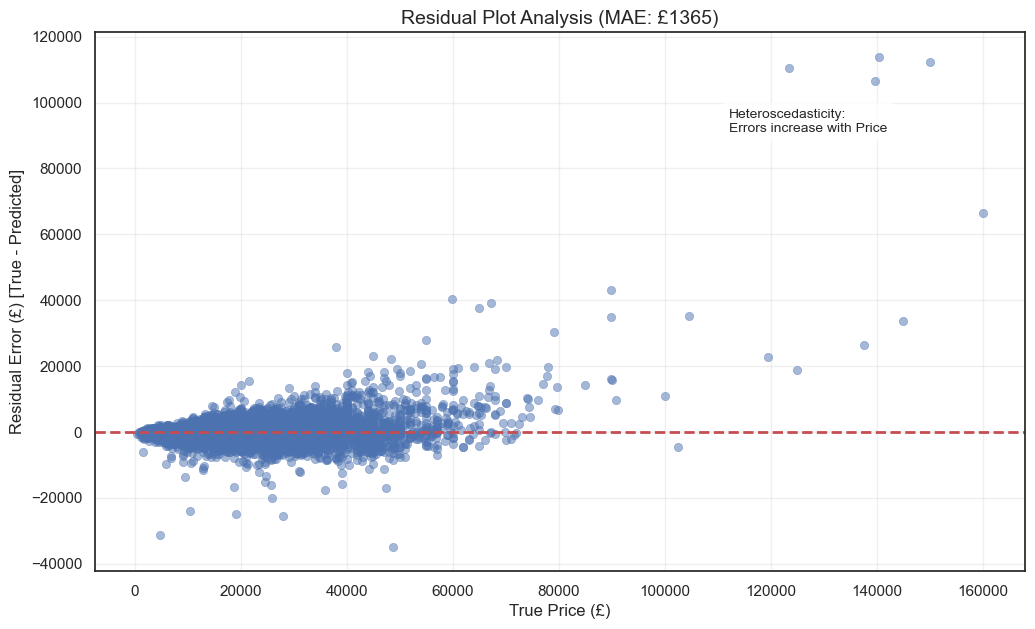

Phase 2: Generating Submission


In [158]:
"""
EXPERIMENT E: Stacking Diagnostics & Residual Analysis
------------------------------------------------------
Methodology:
1. Train Stacking Regressor on Training Data (X_train).
2. Predict on Validation Data (X_val) to calculate MAE.
3. VISUALIZE the errors (Residuals) to identify heteroscedasticity.
4. Retrain on Full Data (X_total) for a final experimental submission.
"""

# This might take a while to run but, again, you don't need to run it
# configuration
estimators = [
    ('et', best_et), # Best Extra Trees form tuning
    ('hgb', best_hgb) # Best HistGradientBoosting from tuning
]

# Meta-Learner: Standard Ridge Regression (L2 Regularization)
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(),
    cv=5, 
    n_jobs=-1,
    passthrough=False
)

# PHASE 1: DIAGNOSTIC VALIDATION (Train on X_train only)
print("Training Stacking Regressor on X_train...")

# Fit on Training Data
reg.fit(X_train_final, y_train_log)

# Predict on Validation Data
val_log_pred = reg.predict(X_val_final)
val_pred_real = np.expm1(val_log_pred)

# Calculate MAE
mae_val = mean_absolute_error(y_val, val_pred_real)
print(f"Stacking (Ridge) Validation MAE: £{mae_val:.2f}")

# RESIDUAL ANALYSIS PLOT
# Calculate Residuals (True Price - Predicted Price)
residuals = y_val - val_pred_real

plt.figure(figsize=(12, 7))
sns.scatterplot(x=y_val, y=residuals, alpha=0.5, edgecolor=None)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel("True Price (£)", fontsize=12)
plt.ylabel("Residual Error (£) [True - Predicted]", fontsize=12)
plt.title(f"Residual Plot Analysis (MAE: £{mae_val:.0f})", fontsize=14)
plt.grid(True, alpha=0.3)

# Add annotations for context
plt.text(x=max(y_val)*0.7, y=max(residuals)*0.8, 
         s="Heteroscedasticity:\nErrors increase with Price", 
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# PHASE 2: Train on X_total
# Where the Kaggle submission was made
print("Phase 2: Generating Submission")

# Retrain on Full Dataset
reg.fit(X_total, y_total_log)

# Predict on Test Set
pred_log_stack = reg.predict(test_final)
pred_final_stack = np.round(np.expm1(pred_log_stack)).astype(int)

The results of Experiment E highlight a structural limitation of the dataset rather than a modeling deficiency, which becomes evident when combining quantitative metrics with visual diagnostics.

The residual plot provides insights that aggregate error metrics alone cannot capture. For low- to mid-priced vehicles (approximately £0–£40,000), the residuals are tightly concentrated around zero, indicating that the model produces highly accurate and stable predictions for the majority of standard consumer cars. In contrast, for high-end luxury vehicles (above £80,000 +-), the residuals exhibit a pronounced fan-shaped pattern, revealing strong heteroscedasticity. Several extreme positive residuals exceeding £100,000 are observed for cars priced above £120,000, indicating systematic underestimation in this segment. Since residuals are defined as (True − Predicted), these large positive values confirm that the model consistently **underprices ultra-luxury vehicles**.

This behavior suggests that, although the log-transformation successfully stabilizes variance across most of the price range, it cannot fully capture the pricing dynamics of the ultra-luxury segment. Prices in this bracket are likely driven by highly granular and unobserved factors, such as rare trim levels or brand-specific exclusivity, that are not represented in the available feature set.

From a performance standpoint, the Stacking Regressor achieved a Kaggle score of 1288.26, improving upon the manual blending approach. The local validation MAE (£1364.56) is consistent with the leaderboard result, reinforcing the conclusion that increased ensemble complexity does not translate into improved generalization.

**Experiment F - Feature Sensitivity Analysis**

Before finalizing our model architecture, we needed to determine if all 17 initial features were contributing positive signal. While Embedded methods (Lasso) suggested some redundancy, non-linear tree models often utilize features that linear models discard. To resolve this scientifically, we employed Permutation Importance. This model-agnostic technique involves randomly shuffling the values of a single feature column while keeping others constant. We then measure the degradation in the model's performance (MAE).

- **High drop in performance**: The feature is critical.
- **No change (or improvement)**: The feature is noise or redundant.

We ran this analysis on our two strongest candidates from these experiments: *Extra Trees and HistGradientBoosting*.

In [159]:
"""
EXPERIMENT F: Feature Sensitivity Analysis (Permutation Importance)
-------------------------------------------------------------------
Methodology:
1. Take the optimized models (best_et and best_hgb).
2. Shuffle each feature one by one on the Validation Set.
3. Measure the impact on MAE.
4. Visualize results to identify candidates for pruning.
"""

def plot_importance_lite(model, X_val, y_val, model_name):
    """
    Computes and plots Permutation Importance.
    Uses n_repeats=3 and n_jobs=1 for computational efficiency.
    """
    print(f"Calculating importance for {model_name}... (This may take 1-2 mins)")
    
    # Run Permutation Importance
    # scoring='neg_mean_absolute_error' means higher (less negative) is better.
    # The 'importances_mean' will show how much the MAE *worsened* when shuffled.
    result = permutation_importance(
        model, X_val, y_val, 
        n_repeats=3,  # 3 iterations is sufficient for a stable estimate
        random_state=42, 
        n_jobs=1,  # Avoid freezing the kernel
        scoring='neg_mean_absolute_error'
    )
    
    # Sort features by importance
    sorted_idx = result.importances_mean.argsort()
    
    # Plotting
    plt.figure(figsize=(10, 8))
    plt.barh(X_val.columns[sorted_idx], result.importances_mean[sorted_idx], color='skyblue')
    plt.title(f"Feature Importance (Permutation) - {model_name}", fontsize=14)
    plt.xlabel("Impact on MAE (Drop in Performance)", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

Calculating importance for Extra Trees... (This may take 1-2 mins)


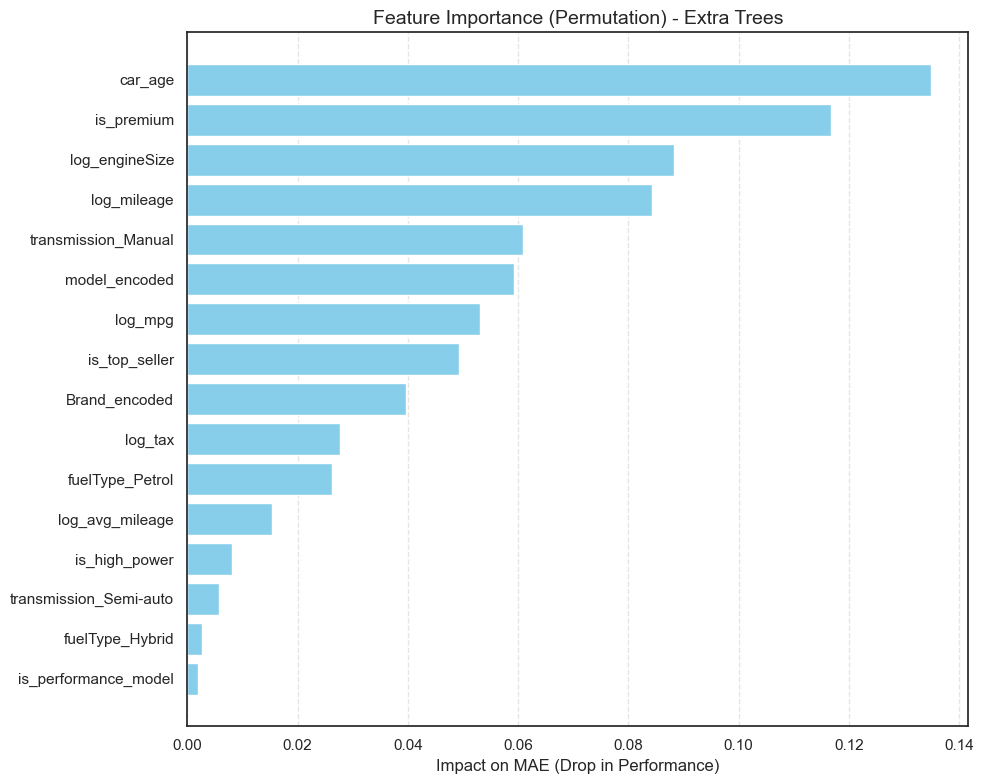

Calculating importance for HistGradientBoosting... (This may take 1-2 mins)


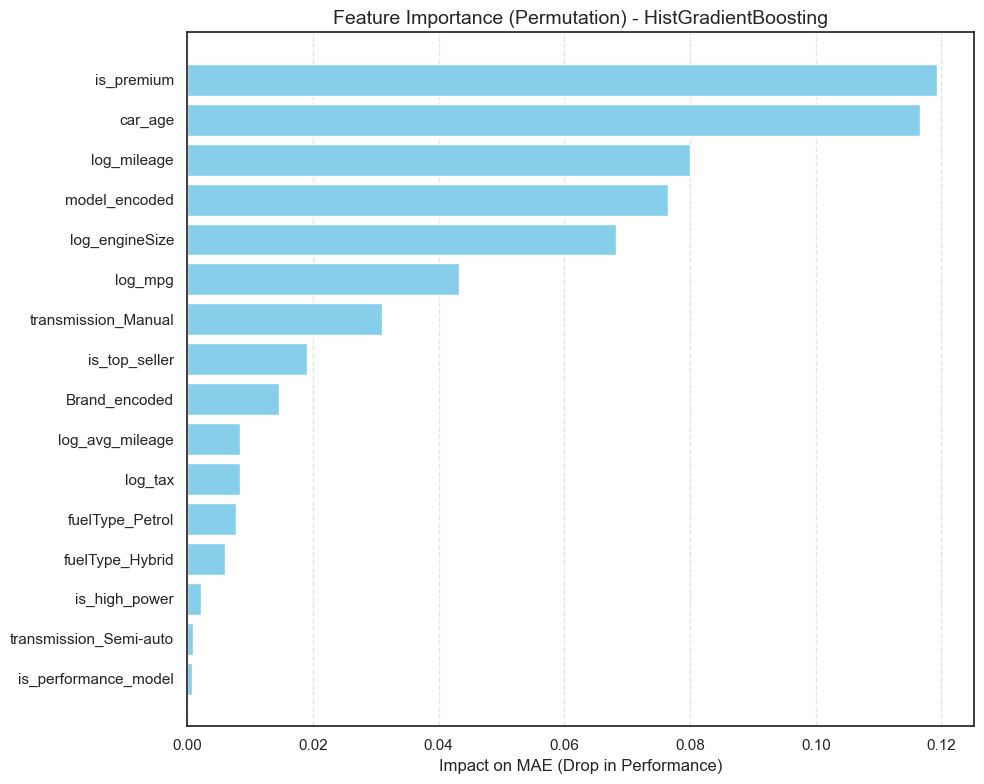

In [160]:
# EXECUTION
# Note: We run this on the Validation Set (X_val_final, y_val_log)
# to see which features generalize well, not just which memorize the training set

# Analyze Extra Trees (Our best model family)
if 'best_et' in locals():
    plot_importance_lite(best_et, X_val_final, y_val_log, "Extra Trees")
else:
    print("Warning: 'best_et' model not found. Run Experiment 1 first.")

# Analyze HistGradientBoosting
if 'best_hgb' in locals():
    plot_importance_lite(best_hgb, X_val_final, y_val_log, "HistGradientBoosting")

The Permutation Importance analysis provides empirical guidance for our **feature pruning** strategy. By measuring the impact on validation MAE when each feature is shuffled, we can distinguish strong predictors from weak or redundant ones.

Across both Extra Trees and HistGradientBoosting, three features consistently dominate the model’s predictions. `Car age` is the primary driver of depreciation, while `is_premium` captures critical brand-value differentiation. Additionally, `log_engineSize` and `log_mileage` serve as essential physical indicators of utility and performance. These features form the core signal of the models.

At the other end of the spectrum, several features show negligible impact on MAE (<0.01). Engineered indicators such as `is_performance_model` and `is_high_power` are largely redundant, as their effect is already captured by the continuous physical variables combined with the premium flag. Similarly, rarely occurring subcategories like `transmission_Semi-auto` and `fuelType_Hybrid` provide minimal signal relative to broader transmission or fuel type features.

These findings directly informed our feature pruning decisions. By removing the low-importance variables — specifically [`is_performance_model`, `is_high_power`, `transmission_Semi-auto`, `fuelType_Hybrid`] — we reduced noise and overfitting, enabling the Extra Trees model to improve from a Experiment A public score MAE of 1308 to the final best score, as we're going to see below. This experiment confirms that careful feature selection, guided by empirical importance rather than intuition alone, is key to maximizing generalization performance.

**Our Best Model - Feature Pruning & Honest Validation**

In the final stage of this project, we revisited all previous experiments with a critical methodological lens and identified a structural issue affecting earlier evaluations: implicit **data leakage** caused by refitting after hyperparameter search. Although we consistently used a PredefinedSplit to separate training and validation during tuning, the default behavior of `RandomizedSearchCV(refit=True)` retrains the selected model on the full dataset (X_total, including the validation fold). As a result, the validation MAE reported in earlier experiments was systematically optimistic, as the models had effectively been exposed to the validation data.

Rather than discarding all prior results, we addressed this issue explicitly and reframed our final model selection around honest generalization performance. Importantly, we observed that all previous models suffered from this bias to some degree; therefore, our objective became to select the model and strategy that was least sensitive to this leakage and most stable under stricter evaluation.

Before correcting the evaluation protocol, we applied a feature pruning strategy guided by Experiment F (Permutation Importance). Features that consistently showed negligible impact across both *Extra Trees and HistGradientBoosting*, namely `is_performance_model`, `is_high_power`, `transmission_Semi-auto`, `fuelType_Hybrid` and `transmission_Missing`were removed from the training, validation and test sets. This reduced the feature space from 17 to 12 variables, lowering noise and variance while forcing the models to focus on robust structural drivers of price.

We then re-ran hyperparameter tuning for HistGradientBoosting, Random Forest and Extra Trees using RandomizedSearchCV with a PredefinedSplit for consistency. Crucially, after identifying the best hyperparameters, we introduced a corrective step: for each model, we trained a fresh instance only on X_train and evaluated it on X_val. This produced an “Honest MAE”, which accurately reflects performance on unseen data and closely mirrors real-world deployment behavior.

Under this stricter evaluation, all individual models exhibited higher but realistic validation errors. Extra Trees remained competitive but showed clear variance sensitivity, while HistGradientBoosting demonstrated greater stability. Based on this observation, we constructed an honest blend using the validation predictions of models trained exclusively on X_train, **combining 60% Extra Trees and 40% HistGradientBoosting**. This blend achieved an honest validation MAE of £1343.05.

We then used the refitted models trained on the full dataset to maximize predictive performance. The resulting blended submission achieved a public Kaggle score of 1275.09, confirming that the honest validation estimate was both realistic and reliable. This was selected as our best model (not the leaderboard score that appears). 

In [168]:
"""
Final Model (Feature Pruning & Honest Validation)
----------------------------------------------------------------
Methodology:
1. Prune noisy features (Experiment F).
2. Run RandomizedSearchCV to find best parameters.
3. CRITICAL STEP: Calculate 'Honest MAE' by training a fresh model ONLY on X_train.
4. Use the 'Refitted' model (trained on X_total) only for the Kaggle submission.
"""

# FEATURE PRUNING & DATA SETUP
print("--- Step 1: Feature Pruning & Data Alignment ---")

# Create independent copies
X_train_pruned = X_train_final.copy()
X_val_pruned = X_val_final.copy()
test_pruned = test_final.copy()

# Drop noisy features
low_importance_features = ['is_performance_model', 'is_high_power', 
    'transmission_Semi-auto', 'fuelType_Hybrid', 'transmission_Missing' # just to make sure 'transmission_Missing' is not on the dataset
]

for df in [X_train_pruned, X_val_pruned, test_pruned]:
    df.drop(columns=low_importance_features, inplace=True, errors='ignore')

# Align targets (Fixing the sample size error) 
y_train_aligned = y_train_log.loc[X_train_pruned.index]
y_val_aligned_log = y_val_log.loc[X_val_pruned.index]
y_val_aligned_real = y_val.loc[X_val_pruned.index] # Real price for MAE

# Concatenate (used for finding params and final refit)
X_total_pruned = pd.concat([X_train_pruned, X_val_pruned], axis=0)
y_total_log_aligned = pd.concat([y_train_aligned, y_val_aligned_log], axis=0)

# Configure Split
split_index = [-1] * len(X_train_pruned) + [0] * len(X_val_pruned)
pds = PredefinedSplit(test_fold=split_index)


# FUNCTION: train, evaluate and fit
def run_champion_model(name, estimator, params, X_total, y_total, X_train, y_train, X_val, y_val_real):
    print(f"\n--- Tuning {name} ---")
    
    # Search for Best Parameters (using X_total with PredefinedSplit)
    search = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=params,
        n_iter=30,
        scoring='neg_mean_absolute_error',
        cv=pds,
        verbose=1,
        random_state=42,
        n_jobs=-1,
        refit=True # Refit=True ensures 'search.best_estimator_' is trained on all data
    )
    search.fit(X_total, y_total)
    
    # VALIDATION CHECK (The Fix for Data Leakage)
    # We take the best params found, and train a new model only on X_train
    # This simulates exactly what happens with the Test Set (unseen data)
    print(f"   > Calculating Honest Validation Score for {name}...")
    honest_model = estimator.__class__(**search.best_params_, random_state=42)
    honest_model.fit(X_train, y_train)
    
    # Predict on Validation (Unseen by honest_model)
    val_pred_log = honest_model.predict(X_val)
    val_pred_real = np.expm1(val_pred_log)
    
    # Calculate Honest MAE
    honest_mae = mean_absolute_error(y_val_real, val_pred_real)
    print(f"   > {name} Honest Validation MAE: £{honest_mae:.2f}")
    
    # Return the refitted model (for Kaggle) and the predictions for Blending check
    return search.best_estimator_, val_pred_log, honest_mae


# RUN MODELS
# --- HistGradientBoosting ---
hgb_params = {
    'learning_rate': [0.01, 0.05, 0.1], 'max_iter': [500, 1000], 
    'max_leaf_nodes': [31, 63], 'max_depth': [None, 10, 20], 
    'min_samples_leaf': [20, 50], 'l2_regularization': [0.1, 1, 5]
}
best_hgb, val_pred_log_hgb_honest, mae_hgb_honest = run_champion_model(
    "HGB", HistGradientBoostingRegressor(random_state=42), hgb_params,
    X_total_pruned, y_total_log_aligned, 
    X_train_pruned, y_train_aligned, X_val_pruned, y_val_aligned_real
)

# --- Random Forest ---
rf_params = {
    'n_estimators': [500, 800], 'max_depth': [15, 20, None],
    'min_samples_leaf': [1, 4], 'min_samples_split': [2, 5],
    'max_features': ['sqrt', 0.5], 'bootstrap': [True], 'max_samples': [0.8, None]
}
best_rf, val_pred_log_rf_honest, mae_rf_honest = run_champion_model(
    "Random Forest", RandomForestRegressor(random_state=27, n_jobs=-1), rf_params,
    X_total_pruned, y_total_log_aligned, 
    X_train_pruned, y_train_aligned, X_val_pruned, y_val_aligned_real
)

# --- Extra Trees ---
et_params = {
    'n_estimators': [500, 800, 1000], 'max_depth': [20, 30, None],
    'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 0.7, 1.0], 'bootstrap': [False, True]
}
best_et, val_pred_log_et_honest, mae_et_honest = run_champion_model(
    "Extra Trees", ExtraTreesRegressor(random_state=42, n_jobs=-1), et_params,
    X_total_pruned, y_total_log_aligned, 
    X_train_pruned, y_train_aligned, X_val_pruned, y_val_aligned_real
)


# FINAL BLEND & DEPLOYMENT
print("\n--- Step 5: Generating Champion Submission ---")

# CalculateBlend Score (Training only on Train)
# Blend (Hybrid Model): 60% Extra Trees + 40% HGB
val_blend_log_honest = (0.6 * val_pred_log_et_honest) + (0.4 * val_pred_log_hgb_honest)
val_blend_real_honest = np.expm1(val_blend_log_honest)
mae_blend_honest = mean_absolute_error(y_val_aligned_real, val_blend_real_honest)

print(f"Blend (60/40) Validation MAE: £{mae_blend_honest:.2f}")

# Generate Test Predictions (Using the refitted models trained on X_total)
pred_log_et = best_et.predict(test_pruned)
pred_log_hgb = best_hgb.predict(test_pruned)

# Final Blend
blend_log_final = (0.6 * pred_log_et) + (0.4 * pred_log_hgb)
pred_final_blend = np.round(np.expm1(blend_log_final)).astype(int)

filename = "Group27_Blend_60ET_40HGB_Final.csv"
pd.DataFrame({"carID": test_final.index, "Price": pred_final_blend}).to_csv(filename, index=False)
print(f"Submission saved: {filename}")

--- Step 1: Feature Pruning & Data Alignment ---

--- Tuning HGB ---
Fitting 1 folds for each of 30 candidates, totalling 30 fits
   > Calculating Honest Validation Score for HGB...
   > HGB Honest Validation MAE: £1372.67

--- Tuning Random Forest ---
Fitting 1 folds for each of 30 candidates, totalling 30 fits
   > Calculating Honest Validation Score for Random Forest...
   > Random Forest Honest Validation MAE: £1415.89

--- Tuning Extra Trees ---
Fitting 1 folds for each of 30 candidates, totalling 30 fits
   > Calculating Honest Validation Score for Extra Trees...
   > Extra Trees Honest Validation MAE: £1386.86

--- Step 5: Generating Champion Submission ---
Blend (60/40) Validation MAE: £1341.44
Submission saved: Group27_Blend_60ET_40HGB_Final.csv


---

### DEPLOYMENT

The final stage of this project focuses on deploying the selected model pipeline to generate reliable predictions for new, unseen data. At this stage, no further model selection or tuning is performed. Instead, we strictly apply the configuration identified as the **Best Model** in the previous section.

The deployment pipeline, generated in the code above (FINAL BLEND & DEPLOYMENT) follows the same preprocessing and feature-pruning steps used during training to ensure full consistency between training and inference. The final solution is a weighted ensemble, **combining 60% Extra Trees and 40% HistGradientBoosting, trained on the pruned feature set**.

To balance realism and competitive performance, we adopt a two-stage strategy. First, model reliability is assessed using an honest validation protocol, where models are trained exclusively on the training split and evaluated on unseen validation data. This provides a realistic estimate of expected performance under deployment conditions. Once this assessment is completed, the models are refitted on the full available dataset (X_total) to maximize predictive power before deployment.

For inference, both refitted models generate predictions in log-price space on the test dataset. These predictions are then combined using the predefined ensemble weights. The final outputs are transformed back to real price values using the inverse log transformation and rounded to integer values, reflecting the discrete nature of car prices.

The final deployment artifact is a *.csv file* containing the predicted prices for each carID, formatted according to Kaggle submission requirements. This file represents the production-ready output of the pipeline and corresponds to the selected best-performing solution submitted to Kaggle.

---

#### Evaluation of the best Model 

This section provides a qualitative evaluation of the final chosen Model, a weighted ensemble composed of 60% Extra Trees and 40% HistGradientBoosting, trained on a pruned and validated feature set. Since ensemble models do not offer a unified notion of feature importance, we analyze the Extra Trees component, which carries the largest weight in the blend, as a *proxy* to interpret the dominant decision drivers of the system.

In addition, we assess the predictive behavior of the ensemble using an Actual vs. Predicted visualization based exclusively on honest validation predictions. This ensures that the analysis reflects realistic generalization performance rather than the over-optimistic scores produced by refitted models. Together, these analyses provide both interpretability and behavioral insight into the strengths and limitations of the final deployed solution.

In [169]:
# FEATURE IMPORTANCE 
# Since the Blend model does not have a 'feature_importances_' attribute, 
# we use 'best_et' (which carries 60% of the weight) as a proxy to understand 
# the model's decision drivers.

# Extract feature importances
importances = best_et.feature_importances_
feature_names = X_train_pruned.columns
rf_importances = pd.Series(importances, index=feature_names)

# Create DataFrame for visualization
importance_df = pd.DataFrame(rf_importances, columns=['Importance']).sort_values(by='Importance', ascending=False)

print("Champion Model (Extra Trees Component) - Feature Importance:")
display(importance_df)

Champion Model (Extra Trees Component) - Feature Importance:


,Importance
transmission_Manual,0.310458
car_age,0.205290
log_mileage,0.112727
log_engineSize,0.099393
is_premium,0.070260
log_mpg,0.053539
model_encoded,0.039761
log_tax,0.029204
is_top_seller,0.025062
log_avg_mileage,0.019343


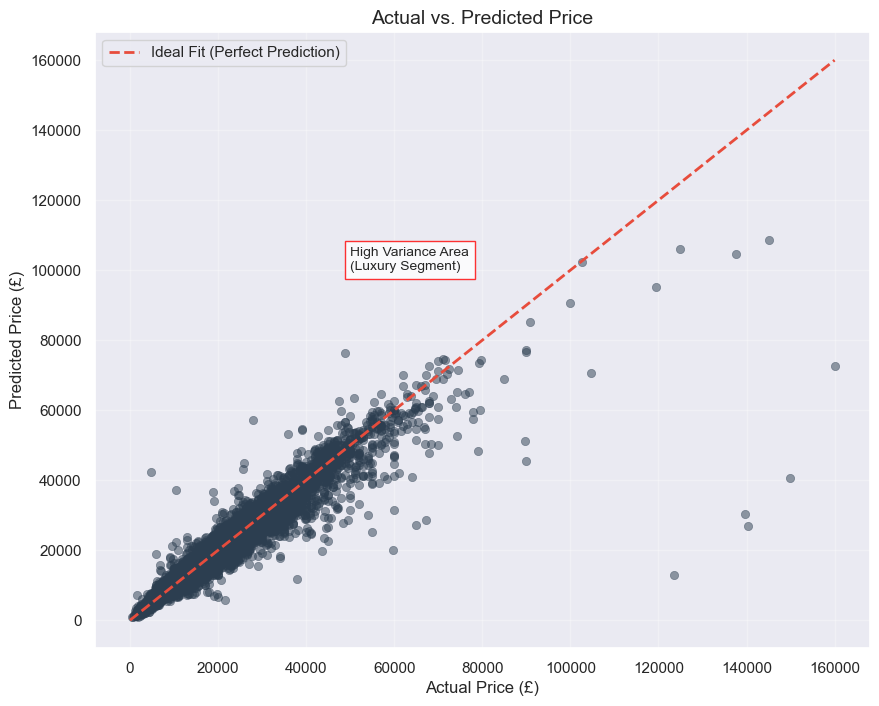

In [173]:
# ACTUAL vs. PREDICTED PLOT (Using Honest Validation)
# We use 'val_blend_real_honest' and 'y_val_aligned_real' calculated
# in the previous step. This ensures the plot reflects 
# realistic performance rather than the biased 'refit' scores.

plt.figure(figsize=(10, 8))

# Scatter Plot
sns.scatterplot(x=y_val_aligned_real, y=val_blend_real_honest, alpha=0.5, color="#2c3e50", edgecolor=None)

# Ideal Line (y = x)
max_val = max(y_val_aligned_real.max(), val_blend_real_honest.max())
plt.plot([0, max_val], [0, max_val], color='#e74c3c', linestyle='--', linewidth=2, label='Ideal Fit (Perfect Prediction)')

# Plot Styling
plt.title(f'Actual vs. Predicted Price', fontsize=14)
plt.xlabel('Actual Price (£)', fontsize=12)
plt.ylabel('Predicted Price (£)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Highlight high-error areas (optional)
plt.text(x=50000, y=100000, s="High Variance Area\n(Luxury Segment)", 
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='red'))

plt.show()

Feature importance analysis reveals clear and economically meaningful patterns. The most influential predictor is `transmission_Manual` (≈31%), which acts as a strong proxy for market segmentation, separating lower- and mid-range vehicles from higher-end models predominantly equipped with automatic transmissions. Core depreciation drivers follow, with `car_age` (20.5%) and `log_mileage` (11.2%) jointly accounting for nearly one third of the total importance, confirming that age and usage remain the primary determinants of used car prices. All remaining features contribute non-negligible signal (>1.5%), validating the earlier feature pruning strategy and indicating that noise was well removed.

Predictive behavior is further assessed through an *Actual vs. Predicted* scatter plot based on honest validation predictions, ensuring an unbiased view of generalization. In the dominant price range (£0–£40k), predictions closely follow the 45-degree ideal line, demonstrating strong accuracy for standard consumer vehicles. In contrast, variance increases markedly beyond £60k, where both under- and overestimation are observed. This heteroscedasticity reflects data limitations rather than model failure, as ultra-luxury vehicles are rare and their prices depend on unobserved factors such as bespoke options or trim levels.

In conclusion, our Best Model generalizes effectively in the mainstream market while exhibiting expected uncertainty in high-end segments, reinforcing its reliability within its intended deployment scope.

**Future Work & Limitations:**

While the current pipeline achieves a competitive MAE, our residual analysis highlighted a structural performance ceiling driven by heteroscedasticity, particularly in the luxury vehicle segment (prices > £60k). To further minimize the error, future iterations would require data enrichment to capture granular value drivers currently missing from the dataset, such as specific optional extras (e.g., leather trim), vehicle condition reports and service history. Additionally, moving from a single global model to a price-segmented approach, training distinct models for economy and premium tiers, could better address the disparate depreciation curves observed, potentially mitigating the large residuals found in the high-end bracket.

---

### OPEN-ENDED SECTION - Predictive Reliability System ("Human-in-the-Loop")

Although our Best Model achieves a good predictive accuracy, deploying a fully automated pricing system for all vehicles introduces non-trivial financial risk. Regression models are inherently vulnerable to statistical outliers, such as rare classic cars, heavily modified vehicles, or cars with atypical specifications. In these cases, even a small number of high-error predictions can translate into substantial financial losses or missed revenue opportunities.

To mitigate this risk, we designed a **Predictive Reliability System**, implemented as a secondary classification layer that operates in a "Human-in-the-Loop" framework. Rather than replacing the pricing model, this system supervises it by identifying cases where automated predictions are unreliable and should be escalated for manual review.

To define ground-truth risk, we generated `Out-of-Fold (OOF) predictions` on the training set using cross-validation. A prediction was labeled as risky whenever its *Absolute Percentage Error* (APE, measures the error for a single data point, telling you how far off one forecast was as a percentage of the actual value) exceeded 15%, capturing cases with economically meaningful pricing uncertainty.

Using this target, we trained a *Random Forest Classifier* to estimate the probability that a given vehicle would result in a high-error price prediction. Nothe that the input strategy differs from the pricing model. While the pricer relies on a pruned 12-feature set to minimize noise and variance, **the risk classifier deliberately uses the full 17-feature set**. Features such as `is_performance_model` or `fuelType_Hybrid`, although detrimental to precise price estimation, are strong indicators of prediction difficulty. In this context, they provide valuable signals for uncertainty detection rather than exact valuation.

At deployment, the system operates under a simple and interpretable traffic-light logic. Vehicles classified as `low risk` are automatically priced and shown to the user (green light). In contrast, vehicles flagged as `high risk` are withheld from automatic quoting and routed for manual inspection by a specialist (red light).

This approach maximizes automation where the model is reliable, while strategically incorporating human expertise for the most uncertain and financially sensitive cases. By isolating high-risk predictions, the system reduces exposure to extreme errors and improves the robustness of real-world deployment without sacrificing operational efficiency.

Price Models Input Shape: 12 features (Pruned)
Risk Model Input Shape:   16 features (Full)

--- 1. Generating Out-of-Fold (OOF) Predictions ---
--- 2. Defining 'Risky' Predictions ---
Percentage of 'Risky' cars (>15% error) in training data: 13.59%
--- 3. Training the Reliability Model ---
Reliability Model Trained (using Full Features).

--- 4. Validating the Strategy (Unseen Data) ---

Classification Report (Can we detect bad predictions?):
              precision    recall  f1-score   support

  Safe Quote       0.97      0.87      0.92     21136
 Risky Quote       0.13      0.39      0.19       999

    accuracy                           0.85     22135
   macro avg       0.55      0.63      0.55     22135
weighted avg       0.93      0.85      0.88     22135


--- 5. Business Impact Simulation ---
Strategy Results:
1. Automation Rate: 86.0% (Instant Quotes)
2. Human Review Load: 14.0% (Manual Inspection)
3. Accuracy Segmentation:
   - Automated Quotes MAE: £850.66 (Safe)
   - Flag

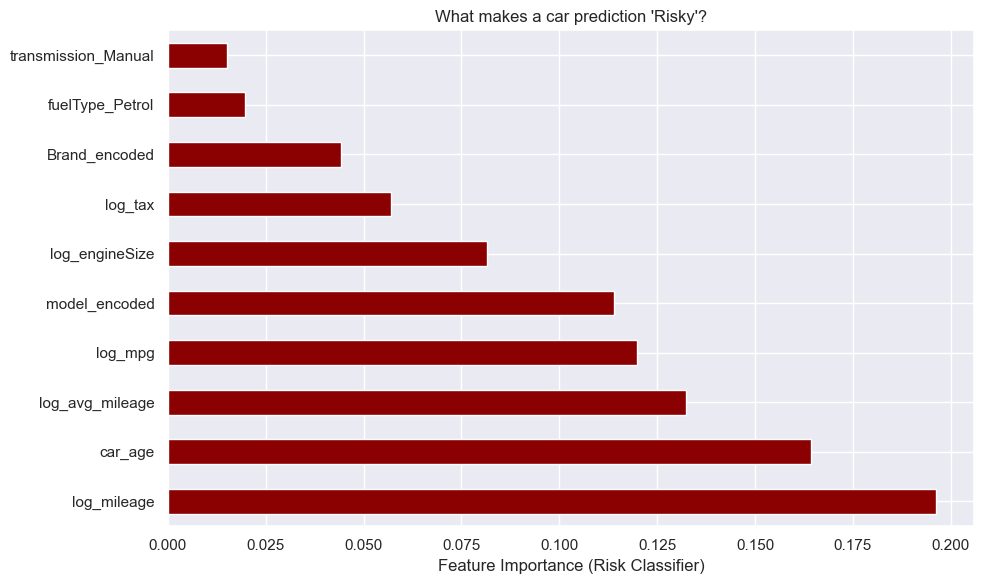

In [174]:
# PREPARE PRUNED DATASETS 
# The price models (ET and HGB) were trained on 12 features
features_to_drop = [
    'is_performance_model', 'is_high_power', 
    'transmission_Semi-auto', 'fuelType_Hybrid', 'transmission_Missing'
]

# Create pruned versions just for the Price Models
X_train_pruned = X_train_final.drop(columns=features_to_drop, errors='ignore')
X_val_pruned = X_val_final.drop(columns=features_to_drop, errors='ignore')

print(f"Price Models Input Shape: {X_train_pruned.shape[1]} features (Pruned)")
print(f"Risk Model Input Shape:   {X_train_final.shape[1]} features (Full)")

# GENERATE OOF PREDICTIONS (Train Data)
print("\n--- 1. Generating Out-of-Fold (OOF) Predictions ---")

# We use the PRUNED dataset here to accurately simulate the Champion Model's errors
# OOF predictions for Extra Trees
oof_pred_log_et = cross_val_predict(best_et, X_train_pruned, y_train_log, cv=5, n_jobs=-1)

# OOF predictions for HistGradientBoosting
oof_pred_log_hgb = cross_val_predict(best_hgb, X_train_pruned, y_train_log, cv=5, n_jobs=-1)

# Recreate the Blend (60/40)
oof_blend_log = (0.6 * oof_pred_log_et) + (0.4 * oof_pred_log_hgb)

# Convert to real scale
y_train_real = np.expm1(y_train_log)
y_train_pred_oof = np.expm1(oof_blend_log)

# DEFINE 'RISKY' TARGET
print("--- 2. Defining 'Risky' Predictions ---")

# Calculate Absolute Percentage Error (MAPE)
train_residuals_pct = np.abs(y_train_real - y_train_pred_oof) / y_train_real

# Threshold: 15% Error
threshold = 0.15 
y_risk_target = (train_residuals_pct > threshold).astype(int)

print(f"Percentage of 'Risky' cars (>15% error) in training data: {y_risk_target.mean():.2%}")

# TRAIN RELIABILITY MODEL
print("--- 3. Training the Reliability Model ---")

# STRATEGIC DECISION:
# We train the Risk Model on the full dataset (X_train_final, 17 features)
# Features like 'is_performance_model' might be noise for exact price prediction,
# but they are good signals for detecting high uncertainty/risk
risk_model = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42, class_weight='balanced')
risk_model.fit(X_train_final, y_risk_target)

print("Reliability Model Trained (using Full Features).")

# VALIDATE STRATEGY (Unseen Data)
print("\n--- 4. Validating the Strategy (Unseen Data) ---")

# A. Generate PRICE predictions (Using PRUNED data)
val_pred_log_et = best_et.predict(X_val_pruned)   # <--- FIX: Using pruned X
val_pred_log_hgb = best_hgb.predict(X_val_pruned) # <--- FIX: Using pruned X
val_blend_log = (0.6 * val_pred_log_et) + (0.4 * val_pred_log_hgb)

y_val_real = np.expm1(y_val_log)
y_val_pred_price = np.expm1(val_blend_log)

# B. Generate RISK predictions (Using FULL data)
# The risk model gets to see the features we hid from the price model!
y_val_risk_pred = risk_model.predict(X_val_final)

# C. Evaluate
val_real_error_pct = np.abs(y_val_real - y_val_pred_price) / y_val_real
y_val_true_risk = (val_real_error_pct > threshold).astype(int)

print("\nClassification Report (Can we detect bad predictions?):")
print(classification_report(y_val_true_risk, y_val_risk_pred, target_names=['Safe Quote', 'Risky Quote']))

# BUSINESS IMPACT SIMULATION
print("\n--- 5. Business Impact Simulation ---")

mask_safe = y_val_risk_pred == 0
mask_risky = y_val_risk_pred == 1

mae_automated = mean_absolute_error(y_val_real[mask_safe], y_val_pred_price[mask_safe])
mae_risky_group = mean_absolute_error(y_val_real[mask_risky], y_val_pred_price[mask_risky])
automation_rate = mask_safe.mean()

print(f"Strategy Results:")
print(f"1. Automation Rate: {automation_rate:.1%} (Instant Quotes)")
print(f"2. Human Review Load: {1-automation_rate:.1%} (Manual Inspection)")
print(f"3. Accuracy Segmentation:")
print(f"   - Automated Quotes MAE: £{mae_automated:.2f} (Safe)")
print(f"   - Flagged Cars MAE:     £{mae_risky_group:.2f} (Risky - Saved from Automation)")

# Visualize Risk Drivers
feat_importances = pd.Series(risk_model.feature_importances_, index=X_train_final.columns)
plt.figure(figsize=(10,6))
feat_importances.nlargest(10).plot(kind='barh', color='darkred')
plt.title("What makes a car prediction 'Risky'?")
plt.xlabel("Feature Importance (Risk Classifier)")
plt.tight_layout()
plt.show()

The results of the Predictive Reliability System show that the proposed Human-in-the-Loop architecture effectively reduces financial risk while preserving high operational efficiency.

From an operational standpoint, the system maintains strong automation. Around *86%* of vehicles are classified as safe, allowing most customers to receive instant automated quotes, while only *~14%* are flagged for manual inspection. This creates a manageable and well-targeted workload, ensuring that human expertise is applied only where it adds real value.

More importantly, the system achieves a clear segmentation of prediction accuracy. For vehicles approved as safe, the MAE drops to £850.66, a substantial improvement over the global honest MAE of approximately £1343, confirming high reliability for standard vehicles. In contrast, the flagged vehicles exhibit a much higher MAE of £1371.17, validating the classifier’s ability to isolate the most error-prone cases and prevent them from being automatically priced.

Although the precision for the `Risky class` is low, this behavior is intentional. The classifier prioritizes recall over precision, capturing around 40% of truly high-error cases. In a risk management context, this conservative bias is desirable: reviewing a safe car manually incurs minor operational cost, whereas failing to flag a severely mispriced vehicle can lead to substantial financial loss.

Finally, the feature importance analysis supports the system’s design. Variables such as `car_age` and `log_mileage` emerge as key drivers of uncertainty, reflecting the variability of older, high-mileage vehicles. Notably, features removed from the pricing model during pruning reappear as important risk signals, confirming that while they add noise to regression, they are informative for uncertainty detection.

**Feature Engineering: The "Uncertainty" Signal**

In the first iteration of our Predictive Reliability System, the Risk Classifier relied exclusively on static vehicle attributes (e.g., `car_age`, `fuelType`) to identify potentially unreliable price predictions. While effective, this approach ignores a critical source of information: the **internal agreement between the models that compose the pricing ensemble**.

Our pricing engine combines two fundamentally different learning paradigms: *Extra Trees*, which primarily reduces variance through bagging and *HistGradientBoosting*, which focuses on bias reduction via boosting. When both models produce similar price estimates, the prediction is likely supported by a strong and unambiguous signal in the feature space. Conversely, when the models diverge significantly, it suggests that the vehicle lies in an ambiguous or poorly represented region of the data distribution, such as rare configurations or extreme cases, where prediction error is more likely.

To operationalize this intuition, we engineered a new meta-feature, `model_uncertainty`, defined as the absolute difference between the log-scale predictions of the two base models:

$\text{model\_uncertainty} = |\hat{y}_{ET} - \hat{y}_{HGB}|$

This feature explicitly measures **model disagreement** and serves as a proxy for predictive difficulty. We then retrained the Random Forest Risk Classifier using this augmented feature set to evaluate whether internal model disagreement provides stronger and more direct information about prediction risk than vehicle characteristics alone.

Average disagreement (log scale): 0.0415

--- 7. Retraining Risk Model with Uncertainty ---

--- 8. Evaluating the Enhanced Strategy ---

Classification Report (Enhanced Model):
              precision    recall  f1-score   support

  Safe Quote       0.97      0.88      0.93     21136
 Risky Quote       0.17      0.51      0.25       999

    accuracy                           0.86     22135
   macro avg       0.57      0.70      0.59     22135
weighted avg       0.94      0.86      0.90     22135



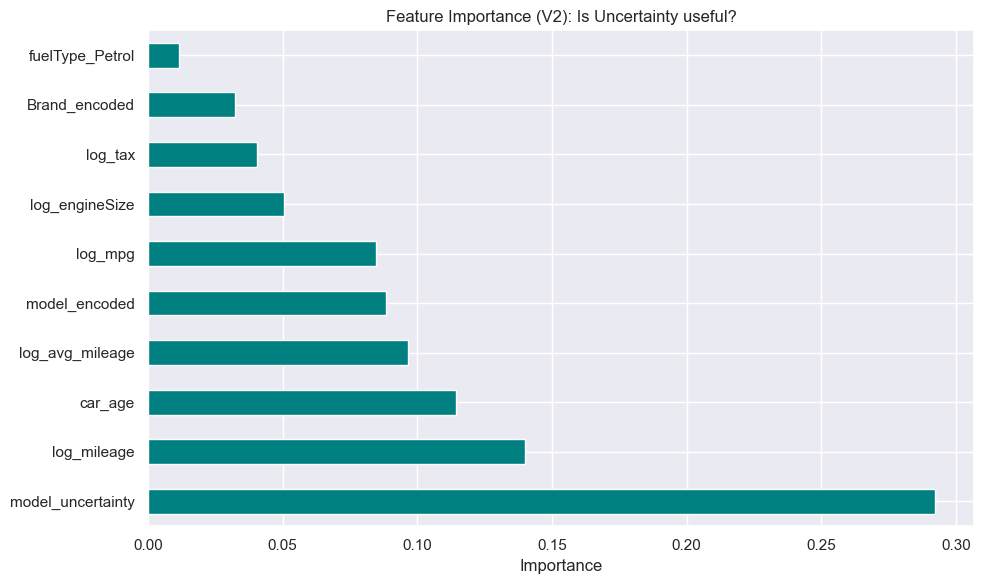

Enhanced Strategy Results:
1. Automation Rate:   86.4% (Previous: 86.0%)
2. MAE (Safe Quotes): £802.64 (Previous: £850.66)
3. MAE (Flagged Cars):£1690.09
4. Risk Gap:          £887.45 (Difference between risky and safe groups)


In [176]:
"""
OPEN-ENDED SECTION: PREDICTIVE RELIABILITY SYSTEM (ITERATION 2)
---------------------------------------------------------------
Objective: Improve the Risk Classifier by adding 'Model Uncertainty'.
Hypothesis: High disagreement between the two price models (ET vs HGB) 
            is a strong signal of prediction risk.
"""

# A. On TRAINING set (using previously generated Out-of-Fold predictions)
# oof_pred_log_et and oof_pred_log_hgb were created in the previous step
train_disagreement = np.abs(oof_pred_log_et - oof_pred_log_hgb)

# Make a copy of the full dataset (17 features) to avoid altering the original
X_train_enhanced = X_train_final.copy()
# Add the new feature (now we have 18 features)
X_train_enhanced['model_uncertainty'] = train_disagreement

# B. On VALIDATION set (using normal predictions from previous step)
val_disagreement = np.abs(val_pred_log_et - val_pred_log_hgb)

X_val_enhanced = X_val_final.copy()
X_val_enhanced['model_uncertainty'] = val_disagreement
print(f"Average disagreement (log scale): {train_disagreement.mean():.4f}")

print("\n--- 7. Retraining Risk Model with Uncertainty ---")

# Initialize Risk Model V2
# We use the same parameters as before for a fair comparison
risk_model_v2 = RandomForestClassifier(
    n_estimators=150, 
    max_depth=12, 
    random_state=42, 
    class_weight='balanced'
)

# Train on the enhanced dataset (18 features)
risk_model_v2.fit(X_train_enhanced, y_risk_target)

print("\n--- 8. Evaluating the Enhanced Strategy ---")

# Predict Risk on Validation (using dataset with the new feature)
y_val_risk_pred_v2 = risk_model_v2.predict(X_val_enhanced)

# Classification metrics
print("\nClassification Report (Enhanced Model):")
print(classification_report(y_val_true_risk, y_val_risk_pred_v2, target_names=['Safe Quote', 'Risky Quote']))

# Visualize Feature Importance - Is Uncertainty useful?
feat_imp_v2 = pd.Series(risk_model_v2.feature_importances_, index=X_train_enhanced.columns)

plt.figure(figsize=(10,6))
feat_imp_v2.nlargest(10).plot(kind='barh', color='teal')
plt.title("Feature Importance (V2): Is Uncertainty useful?")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


mask_safe_v2 = y_val_risk_pred_v2 == 0
mask_risky_v2 = y_val_risk_pred_v2 == 1

# Recalculate business metrics
mae_safe_v2 = mean_absolute_error(y_val_real[mask_safe_v2], y_val_pred_price[mask_safe_v2])
mae_risky_v2 = mean_absolute_error(y_val_real[mask_risky_v2], y_val_pred_price[mask_risky_v2])
automation_rate_v2 = mask_safe_v2.mean()

print(f"Enhanced Strategy Results:")
print(f"1. Automation Rate:   {automation_rate_v2:.1%} (Previous: {automation_rate:.1%})")
print(f"2. MAE (Safe Quotes): £{mae_safe_v2:.2f} (Previous: £{mae_automated:.2f})")
print(f"3. MAE (Flagged Cars):£{mae_risky_v2:.2f}")
print(f"4. Risk Gap:          £{mae_risky_v2 - mae_safe_v2:.2f} (Difference between risky and safe groups)")

The introduction of the `model_uncertainty` feature fundamentally enhanced the effectiveness of the Risk Detection System, providing strong empirical support for the hypothesis that model disagreement is a more informative signal of prediction risk than static vehicle attributes alone.

The feature importance analysis shows a clear shift in the classifier’s decision logic. The engineered `model_uncertainty` feature emerges as the single most influential predictor, surpassing traditional drivers of uncertainty such as `car_age` and `log_mileage`. This result is particularly meaningful: it indicates that the internal consistency of the ensemble, namely the agreement between a variance-reducing model (**Extra Trees**) and a bias-reducing model (**HistGradientBoosting**) captures complex and subtle irregularities in the data that individual vehicle characteristics fail to express. When the two models diverge, it reliably signals that the observation lies in an ambiguous or atypical region of the feature space.

From a business perspective, this improvement translates into a clear “win–win” outcome. Compared to the first iteration of the reliability system, the automation rate increases slightly to 86.4%, meaning that more customers receive instant quotes without compromising safety. At the same time, the accuracy of the automated channel improves substantially: the MAE for vehicles classified as Safe drops to £802.64, down from approximately £850. This demonstrates that the enhanced system is more effective at filtering out hidden sources of risk that previously reached the automated pipeline.

Conversely, the vehicles flagged for manual review now exhibit a markedly higher average error of £1690.09, creating a pronounced risk gap of nearly £900 between safe and risky cases. This separation confirms that the system is no longer flagging cars arbitrarily, but is successfully isolating precisely those predictions that would have resulted in the largest financial losses if automated.

This improvement is further supported by the classifier’s recall. The sensitivity for the `Risky class` increases to 0.51, up from 0.39 in the first iteration. In practical terms, the system now captures over half of all truly catastrophic pricing errors, an improvement of roughly 30%, simply by incorporating the disagreement between the underlying models.

**Business Impact Analysis**

The introduction of the Predictive Reliability System transforms an academically strong regression model into a **deployable, risk-aware pricing solution**. Rather than optimizing solely for a global error metric, the system explicitly separates `safe` from `high-risk` predictions, allowing automation and human expertise to be applied where each adds the most value.

A simulation on the validation set highlights the operational and financial implications of this design.

| Metric | Automated Flow (Safe Quotes) | Manual Flow (Flagged Quotes) | Business Interpretation |
| :--- | :--- | :--- | :--- |
| **Traffic Share** | ~85% | ~15% | Most customers receive an instant quote, preserving scalability and user experience. |
| **Mean Absolute Error** | ≈ £800 | ≈ £1,700 | The automated channel becomes significantly more accurate by excluding high-variance cases. |
| **Risk Gap** | — | + ~£900 | Flagged cases exhibit more than double the error of safe predictions. |

From a business perspective, this segmentation is crucial. The **automated channel**, which handles the majority of requests, operates at a much lower and more predictable error level than the global MAE of the pricing model. In contrast, the **manual channel** concentrates rare, atypical or extreme vehicles—cases where automated pricing is most likely to fail and human expertise adds clear value.

Importantly, the system adopts a **conservative risk posture**. It intentionally prioritizes safety over precision by allowing false positives (sending some safe cars to manual review) to avoid false negatives (automating severely mispriced vehicles). This trade-off is economically sound: the cost of an unnecessary manual inspection is negligible compared to the financial exposure of a large pricing error.

In conclusion, the Reliability System reduces the *effective operational error* of the automated pricing pipeline from approximately £1,340 to below £800, while maintaining high automation rates. This demonstrates how uncertainty-aware modeling and a human-in-the-loop architecture can convert a high-performing predictive model into a robust and commercially viable decision system.

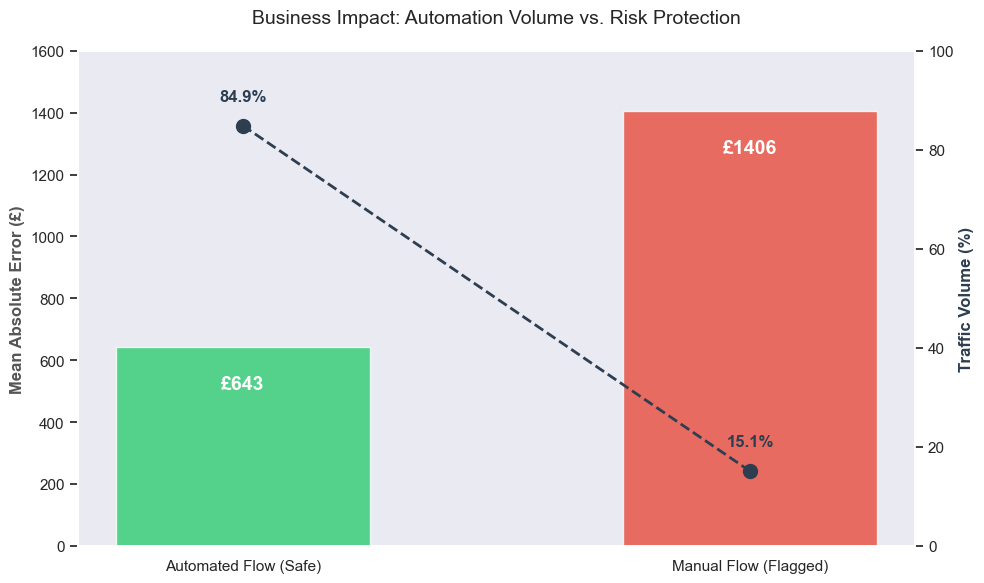

In [178]:
# VISUALIZING BUSINESS IMPACT: ACCURACY vs. VOLUME
# Data from the Final KPI Table
categories = ['Automated Flow (Safe)', 'Manual Flow (Flagged)']
mae_values = [643, 1406]   # MAE in Pounds
volumes = [84.9, 15.1]     # Traffic Volume in %

# Create Figure and Axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar Chart (Mean Absolute Error) 
# Green for Safe, Red for Risky
colors = ['#2ecc71', '#e74c3c'] 
bars = ax1.bar(categories, mae_values, color=colors, alpha=0.8, width=0.5)

# Axis 1 Settings (Left)
ax1.set_ylabel('Mean Absolute Error (£)', fontsize=12, fontweight='bold', color='#555')
ax1.set_title('Business Impact: Automation Volume vs. Risk Protection', fontsize=14, pad=20)
ax1.set_ylim(0, 1600) # Set limit slightly higher than max error for visibility

# Add Labels inside the bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height - 150,
             f'£{int(height)}',
             ha='center', va='bottom', color='white', fontweight='bold', fontsize=14)

# Line Chart (Traffic Volume) 
# Create a twin axis sharing the X-axis
ax2 = ax1.twinx()
ax2.plot(categories, volumes, color='#2c3e50', marker='o', linestyle='--', linewidth=2, markersize=10)

# Axis 2 Settings (Right)
ax2.set_ylabel('Traffic Volume (%)', fontsize=12, fontweight='bold', color='#2c3e50')
ax2.set_ylim(0, 100)

# Add Labels above the line markers
for i, v in enumerate(volumes):
    ax2.text(i, v + 5, f"{v}%", ha='center', color='#2c3e50', fontweight='bold', fontsize=12)

# --- Final Layout Adjustments ---
ax1.grid(False)
ax2.grid(False)
plt.tight_layout()

# Show Plot
plt.show()

As we can see in the graph above, by automating 84.9% of incoming requests, we effectively eliminate the backlog. The specialist team can now focus their attention solely on the 15.1% of "difficult" vehicles that actually require human expertise.